<a href="https://colab.research.google.com/github/Julian981012/Segundo-Proyecto/blob/main/Proyecto_1_corregido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" align="left" hspace="50px" vspace="0px" style="width:107px;height:152px;"></p>
<h1><font color='0B5345'> <center>
Bioseñales y Sistemas </center></font></h1>
<h2><font color='0B5345'> <center>
Primer Proyecto Semestral  </center></font></h2>
<h4><font color='0B5345'>
<center></center>
<center>Julian Olaya-Melissa Cadavid</center>
</font></h4>

<font  face="Courier New" size="3">
<p1><center> </center></p1>



<p3><center><b><font color='0B5345' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia</font></b> </center></p3>
</font>

Electromiografía: El EMG es un estudio sobre conducción nerviosa que busca medir la actividad eléctrica que hay en los músculos y los nervios, este estudio mide principalmente la rápidez y la eficacia con que las señales eléctricas se transmiten por el nervio, mostrando si hay un daño o problema muscular y/o nervioso.

Se caracteriza por:

Regustrar la actividad eléctrica de los músculos durante contracción y reposo. Se puede realizar de dos formas diferentes, la primera es colocar electrodos sobre el músculo de interes por encima de la piel, la segunda es con electrodos de aguja que se incertan directamente en el músculo, en este caso el procedimiento es invasivo. En algunos estudios de EMG se aplican estímulos eléctricos a los nervios para evaluar que este funcionando de forma correcta o si presenta algún daño.

OPERADOR TKEO El operador de transformadas de Energía de Káiser (TKEO), se utiliza generalmente en el procesamiento de señales para estimar las características de frecuencia de una señal, esta técnica suele utilizarse para señales no estacionarias como lo es la EMG(las señales estudiadas en este proyecto), suele utilizarse para leer este tipo de señales ya que es muy sensible a los cambios bruscos de energía como los que suelen darse por las contracciones musculares, también puede amplificar componentes de alta frecuencia de la señal, lo que suele servir para identificar la fatiga muscular.

El TKEO se calcula con la señal de entrada, a la cual se le hace una diferenciación y suavizado, con el fin de que se pueda resaltar los picos de la actividad muscular.

Para interpretar estos resultados es necesario caracterizar la actividad muscular en diferentes situaciones, para esto se observa los puntos donde la magnitud de la señal es máxima que representan los instantes en los que la actividad muscular es más pronunciada, unos niveles altos de TKEO significa alta actividad muscular, si son bajos, entonces hay menor actividad muscular, cuando hay un aumento repentino, puede significar que hay una contracción muscular, y cuando hay una disminución gradual, significa que hay fatiga muscular.

In [ ]:
import numpy as np
import pandas as pd
import zipfile
import re
import io
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import scipy.stats as stats
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
import warnings
from scipy.stats import mannwhitneyu
from scipy.stats import levene

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
main_folder_path = "/content/drive/MyDrive/EMG_data_for_gestures-master"

In [ ]:
def read_txt_files(main_folder_path):
    dfs_by_folder = {}

    for folder_num in range(1, 37):
        folder_name = str(folder_num).zfill(2)
        folder_path = os.path.join(main_folder_path, folder_name)

        for file_name in os.listdir(folder_path):
            if file_name.endswith('.txt'):
                file_path = os.path.join(folder_path, file_name)
                data_dict = {"Time": [], "Channel1": [], "Channel2": [], "Channel3": [], "Channel4": [],
                             "Channel5": [], "Channel6": [], "Channel7": [], "Channel8": [], "Canales": []}

                with open(file_path, 'r') as file:
                    next(file)
                    for line in file:
                        values = line.strip().split('\t')
                        if len(values) == 10:
                            for column, value in zip(data_dict.keys(), values):
                                data_dict[column].append(value)

                df = pd.DataFrame(data_dict)
                dfs_by_folder[folder_name] = df
                break

    return dfs_by_folder


dfs_by_folder = read_txt_files(main_folder_path)

for folder_name, df in dfs_by_folder.items():
    print("Carpeta:", folder_name)
    display(df)
    print("\n")

Carpeta: 01


Time Channel1 Channel2 Channel3 Channel4 Channel5 Channel6 Channel7  \
0          1    1e-05   -2e-05   -1e-05   -3e-05        0   -1e-05        0   
1          5    1e-05   -2e-05   -1e-05   -3e-05        0   -1e-05        0   
2          6   -1e-05    1e-05    2e-05        0    1e-05   -2e-05   -1e-05   
3          7   -1e-05    1e-05    2e-05        0    1e-05   -2e-05   -1e-05   
4          8   -1e-05    1e-05    2e-05        0    1e-05   -2e-05   -1e-05   
...      ...      ...      ...      ...      ...      ...      ...      ...   
63191  65657   -1e-05    1e-05   -5e-05   -1e-05   -3e-05   -1e-05   -1e-05   
63192  65658   -1e-05    1e-05   -5e-05   -1e-05   -3e-05   -1e-05   -1e-05   
63193  65659   -1e-05    1e-05   -5e-05   -1e-05   -3e-05   -1e-05   -1e-05   
63194  65660   -1e-05    1e-05   -5e-05   -1e-05   -3e-05   -1e-05   -1e-05   
63195  65661   -1e-05    1e-05   -5e-05   -1e-05   -3e-05   -1e-05   -1e-05   

      Channel8 Canales  
0       -1e-05       0  
1       -1e-05       0  
2        1e-05       0  
3        1e-05       0  
4        1e-05       0  
...        ...     ...  
63191   -4e-05       0  
63192   -4e-05       0  
63193   -4e-05       0  
63194   -4e-05       0  
63195   -4e-05       0  

[63196 rows x 10 columns]



Carpeta: 02


Time Channel1 Channel2 Channel3 Channel4 Channel5 Channel6 Channel7  \
0          1   -1e-05    1e-05   -3e-05   -4e-05   -1e-05        0        0   
1          5   -1e-05    1e-05   -3e-05   -4e-05   -1e-05        0        0   
2          6   -2e-05   -3e-05   -1e-05    7e-05    1e-05    1e-05   -2e-05   
3          7   -2e-05   -3e-05   -1e-05    7e-05    1e-05    1e-05   -2e-05   
4          8   -2e-05   -3e-05   -1e-05    7e-05    1e-05    1e-05   -2e-05   
...      ...      ...      ...      ...      ...      ...      ...      ...   
64099  66232    1e-05    3e-05    1e-05        0  -0.0001   -1e-05   -2e-05   
64100  66233    1e-05    3e-05    1e-05        0  -0.0001   -1e-05   -2e-05   
64101  66234    1e-05    3e-05    1e-05        0  -0.0001   -1e-05   -2e-05   
64102  66235    1e-05    3e-05    1e-05        0  -0.0001   -1e-05   -2e-05   
64103  66236    1e-05    3e-05    1e-05        0  -0.0001   -1e-05   -2e-05   

      Channel8 Canales  
0            0       0  
1            0       0  
2            0       0  
3            0       0  
4            0       0  
...        ...     ...  
64099   -3e-05       0  
64100   -3e-05       0  
64101   -3e-05       0  
64102   -3e-05       0  
64103   -3e-05       0  

[64104 rows x 10 columns]



Carpeta: 03


Time Channel1 Channel2 Channel3 Channel4 Channel5 Channel6 Channel7  \
0          1   -4e-05   -2e-05   -1e-05   -2e-05   -1e-05   -1e-05    2e-05   
1          4   -4e-05   -2e-05   -1e-05   -2e-05   -1e-05   -1e-05    2e-05   
2          5   -4e-05   -2e-05   -1e-05   -2e-05   -1e-05   -1e-05    2e-05   
3          6   -4e-05   -2e-05   -1e-05   -2e-05   -1e-05   -1e-05    2e-05   
4          7   -2e-05   -1e-05        0    1e-05        0   -1e-05   -2e-05   
...      ...      ...      ...      ...      ...      ...      ...      ...   
49212  50880        0    5e-05  0.00027  0.00013   -3e-05    1e-05        0   
49213  50882        0    5e-05  0.00027  0.00013   -3e-05    1e-05        0   
49214  50883        0    5e-05  0.00027  0.00013   -3e-05    1e-05        0   
49215  50884        0    5e-05  0.00027  0.00013   -3e-05    1e-05        0   
49216  50885        0    5e-05  0.00027  0.00013   -3e-05    1e-05        0   

      Channel8 Canales  
0       -1e-05       0  
1       -1e-05       0  
2       -1e-05       0  
3       -1e-05       0  
4        1e-05       0  
...        ...     ...  
49212        0       0  
49213        0       0  
49214        0       0  
49215        0       0  
49216        0       0  

[49217 rows x 10 columns]



Carpeta: 04


Time Channel1 Channel2 Channel3 Channel4 Channel5 Channel6 Channel7  \
0          1        0   -3e-05    3e-05   -2e-05   -3e-05        0   -1e-05   
1          3        0   -3e-05    3e-05   -2e-05   -3e-05        0   -1e-05   
2          4        0   -3e-05    3e-05   -2e-05   -3e-05        0   -1e-05   
3          5        0   -3e-05    3e-05   -2e-05   -3e-05        0   -1e-05   
4          6        0   -3e-05    3e-05   -2e-05   -3e-05        0   -1e-05   
...      ...      ...      ...      ...      ...      ...      ...      ...   
55086  57613   -7e-05    5e-05    6e-05   0.0001  0.00021  0.00025  0.00012   
55087  57614   -7e-05    5e-05    6e-05   0.0001  0.00021  0.00025  0.00012   
55088  57615   -7e-05    5e-05    6e-05   0.0001  0.00021  0.00025  0.00012   
55089  57616   -7e-05    5e-05    6e-05   0.0001  0.00021  0.00025  0.00012   
55090  57617   -7e-05    5e-05    6e-05   0.0001  0.00021  0.00025  0.00012   

      Channel8 Canales  
0        1e-05       0  
1        1e-05       0  
2        1e-05       0  
3        1e-05       0  
4        1e-05       0  
...        ...     ...  
55086    3e-05       0  
55087    3e-05       0  
55088    3e-05       0  
55089    3e-05       0  
55090    3e-05       0  

[55091 rows x 10 columns]



Carpeta: 05


Time Channel1 Channel2 Channel3 Channel4 Channel5 Channel6 Channel7  \
0          1        0        0    1e-05   -4e-05   -1e-05   -2e-05   -1e-05   
1          3        0        0    1e-05   -4e-05   -1e-05   -2e-05   -1e-05   
2          4        0        0    1e-05   -4e-05   -1e-05   -2e-05   -1e-05   
3          5        0        0    1e-05   -4e-05   -1e-05   -2e-05   -1e-05   
4          6        0        0    1e-05   -4e-05   -1e-05   -2e-05   -1e-05   
...      ...      ...      ...      ...      ...      ...      ...      ...   
50125  51954   -2e-05   -4e-05    1e-05        0        0   -3e-05    1e-05   
50126  51955   -2e-05   -4e-05    1e-05        0        0   -3e-05    1e-05   
50127  51956   -2e-05   -4e-05    1e-05        0        0   -3e-05    1e-05   
50128  51957   -2e-05   -4e-05    1e-05        0        0   -3e-05    1e-05   
50129  51958   -2e-05   -4e-05    1e-05        0        0   -3e-05    1e-05   

      Channel8 Canales  
0            0       0  
1            0       0  
2            0       0  
3            0       0  
4            0       0  
...        ...     ...  
50125        0       0  
50126        0       0  
50127        0       0  
50128        0       0  
50129        0       0  

[50130 rows x 10 columns]



Carpeta: 06


Time Channel1 Channel2 Channel3 Channel4 Channel5 Channel6 Channel7  \
0          1   -1e-05   -4e-05   -2e-05    1e-05        0   -1e-05        0   
1          5   -1e-05   -4e-05   -2e-05    1e-05        0   -1e-05        0   
2          6   -1e-05   -4e-05   -2e-05    1e-05        0   -1e-05        0   
3          7   -1e-05   -4e-05   -2e-05    1e-05        0   -1e-05        0   
4          8   -1e-05   -4e-05   -2e-05    1e-05        0   -1e-05        0   
...      ...      ...      ...      ...      ...      ...      ...      ...   
51073  53624        0    1e-05   -3e-05   -3e-05   -2e-05   -1e-05   -3e-05   
51074  53625        0    1e-05   -3e-05   -3e-05   -2e-05   -1e-05   -3e-05   
51075  53626        0    1e-05   -3e-05   -3e-05   -2e-05   -1e-05   -3e-05   
51076  53627        0    1e-05   -3e-05   -3e-05   -2e-05   -1e-05   -3e-05   
51077  53628        0    1e-05   -3e-05   -3e-05   -2e-05   -1e-05   -3e-05   

      Channel8 Canales  
0       -3e-05       0  
1       -3e-05       0  
2       -3e-05       0  
3       -3e-05       0  
4       -3e-05       0  
...        ...     ...  
51073   -3e-05       0  
51074   -3e-05       0  
51075   -3e-05       0  
51076   -3e-05       0  
51077   -3e-05       0  

[51078 rows x 10 columns]



Carpeta: 07


Time Channel1 Channel2 Channel3  Channel4  Channel5 Channel6 Channel7  \
0          1    5e-05        0   -6e-05    -2e-05         0        0        0   
1         16   -3e-05   -5e-05   -1e-05    -7e-05  -0.00031   -3e-05        0   
2         17   -3e-05   -5e-05   -1e-05    -7e-05  -0.00031   -3e-05        0   
3         18   -3e-05   -5e-05   -1e-05    -7e-05  -0.00031   -3e-05        0   
4         19    3e-05        0   -2e-05     2e-05  -0.00033   -4e-05   -2e-05   
...      ...      ...      ...      ...       ...       ...      ...      ...   
68692  70632    5e-05   -1e-05   -3e-05  -0.00019  -0.00013   -2e-05   -1e-05   
68693  70633    5e-05   -1e-05   -3e-05  -0.00019  -0.00013   -2e-05   -1e-05   
68694  70634    5e-05   -1e-05   -3e-05  -0.00019  -0.00013   -2e-05   -1e-05   
68695  70635    5e-05   -1e-05   -3e-05  -0.00019  -0.00013   -2e-05   -1e-05   
68696  70636    5e-05   -1e-05   -3e-05  -0.00019  -0.00013   -2e-05   -1e-05   

      Channel8 Canales  
0        1e-05       0  
1       -1e-05       0  
2       -1e-05       0  
3       -1e-05       0  
4       -2e-05       0  
...        ...     ...  
68692   -1e-05       0  
68693   -1e-05       0  
68694   -1e-05       0  
68695   -1e-05       0  
68696   -1e-05       0  

[68697 rows x 10 columns]



Carpeta: 08


Time Channel1 Channel2 Channel3  Channel4 Channel5 Channel6 Channel7  \
0          1    1e-05        0    1e-05     1e-05        0   -2e-05   -1e-05   
1          4    1e-05        0    1e-05     1e-05        0   -2e-05   -1e-05   
2          5    1e-05        0    1e-05     1e-05        0   -2e-05   -1e-05   
3          6    1e-05        0    1e-05     1e-05        0   -2e-05   -1e-05   
4          7        0   -2e-05    1e-05     1e-05        0        0        0   
...      ...      ...      ...      ...       ...      ...      ...      ...   
57663  59505        0    1e-05   -3e-05    -4e-05   -2e-05   -3e-05        0   
57664  59506        0    1e-05   -3e-05    -4e-05   -2e-05   -3e-05        0   
57665  59507   -1e-05   -4e-05   -5e-05  -0.00032   -4e-05   -2e-05        0   
57666  59508   -1e-05   -4e-05   -5e-05  -0.00032   -4e-05   -2e-05        0   
57667  59509   -1e-05   -4e-05   -5e-05  -0.00032   -4e-05   -2e-05        0   

      Channel8 Canales  
0       -1e-05       0  
1       -1e-05       0  
2       -1e-05       0  
3       -1e-05       0  
4            0       0  
...        ...     ...  
57663   -1e-05       0  
57664   -1e-05       0  
57665   -2e-05       0  
57666   -2e-05       0  
57667   -2e-05       0  

[57668 rows x 10 columns]



Carpeta: 09


Time Channel1 Channel2 Channel3 Channel4 Channel5 Channel6 Channel7  \
0          1   -1e-05   -1e-05    1e-05   -1e-05    1e-05   -1e-05        0   
1          4   -1e-05   -1e-05    1e-05   -1e-05    1e-05   -1e-05        0   
2          6   -1e-05   -1e-05    1e-05   -1e-05    1e-05   -1e-05        0   
3          7   -1e-05   -1e-05    1e-05   -1e-05    1e-05   -1e-05        0   
4          8   -1e-05   -1e-05    1e-05   -1e-05    1e-05   -1e-05        0   
...      ...      ...      ...      ...      ...      ...      ...      ...   
64872  67777        0   -1e-05   -3e-05   -2e-05   -1e-05   -2e-05   -3e-05   
64873  67778        0   -1e-05   -3e-05   -2e-05   -1e-05   -2e-05   -3e-05   
64874  67779        0   -1e-05   -3e-05   -2e-05   -1e-05   -2e-05   -3e-05   
64875  67780        0   -1e-05   -3e-05   -2e-05   -1e-05   -2e-05   -3e-05   
64876  67781        0   -1e-05   -3e-05   -2e-05   -1e-05   -2e-05   -3e-05   

      Channel8 Canales  
0       -1e-05       0  
1       -1e-05       0  
2       -1e-05       0  
3       -1e-05       0  
4       -1e-05       0  
...        ...     ...  
64872        0       0  
64873        0       0  
64874        0       0  
64875        0       0  
64876        0       0  

[64877 rows x 10 columns]



Carpeta: 10


Time Channel1 Channel2 Channel3 Channel4 Channel5 Channel6 Channel7  \
0          1   -2e-05   -5e-05   -4e-05    1e-05   -1e-05   -2e-05    1e-05   
1          5   -2e-05   -5e-05   -4e-05    1e-05   -1e-05   -2e-05    1e-05   
2          6   -2e-05   -5e-05   -4e-05    1e-05   -1e-05   -2e-05    1e-05   
3          7   -2e-05   -5e-05   -4e-05    1e-05   -1e-05   -2e-05    1e-05   
4          8   -2e-05   -5e-05   -4e-05    1e-05   -1e-05   -2e-05    1e-05   
...      ...      ...      ...      ...      ...      ...      ...      ...   
61443  63952    1e-05    1e-05        0   -1e-05        0   -1e-05   -1e-05   
61444  63953    1e-05    1e-05        0   -1e-05        0   -1e-05   -1e-05   
61445  63954    1e-05    1e-05        0   -1e-05        0   -1e-05   -1e-05   
61446  63955    1e-05    2e-05    5e-05   -3e-05   -2e-05   -2e-05   -1e-05   
61447  63956    1e-05    2e-05    5e-05   -3e-05   -2e-05   -2e-05   -1e-05   

      Channel8 Canales  
0            0       0  
1            0       0  
2            0       0  
3            0       0  
4            0       0  
...        ...     ...  
61443   -1e-05       0  
61444   -1e-05       0  
61445   -1e-05       0  
61446   -1e-05       0  
61447   -1e-05       0  

[61448 rows x 10 columns]



Carpeta: 11


Time Channel1 Channel2 Channel3 Channel4  Channel5 Channel6 Channel7  \
0          1   -1e-05   -2e-05        0    3e-05    -4e-05   -2e-05   -2e-05   
1          4    1e-05   -2e-05   -2e-05   -9e-05  -0.00012   -1e-05        0   
2          5   -1e-05    2e-05    1e-05    3e-05  -0.00017   -2e-05   -1e-05   
3          6   -1e-05    2e-05    1e-05    3e-05  -0.00017   -2e-05   -1e-05   
4          7   -1e-05    2e-05    1e-05    3e-05  -0.00017   -2e-05   -1e-05   
...      ...      ...      ...      ...      ...       ...      ...      ...   
72640  75265   -2e-05   -2e-05        0        0    -3e-05        0   -1e-05   
72641  75266   -2e-05   -2e-05        0        0    -3e-05        0   -1e-05   
72642  75267   -2e-05   -2e-05        0        0    -3e-05        0   -1e-05   
72643  75268   -2e-05   -2e-05        0        0    -3e-05        0   -1e-05   
72644  75269   -2e-05   -2e-05        0        0    -3e-05        0   -1e-05   

      Channel8 Canales  
0       -1e-05       0  
1            0       0  
2       -2e-05       0  
3       -2e-05       0  
4       -2e-05       0  
...        ...     ...  
72640   -1e-05       0  
72641   -1e-05       0  
72642   -1e-05       0  
72643   -1e-05       0  
72644   -1e-05       0  

[72645 rows x 10 columns]



Carpeta: 12


Time Channel1 Channel2 Channel3 Channel4 Channel5 Channel6 Channel7  \
0          2   -1e-05        0    5e-05    8e-05   -2e-05        0        0   
1          5   -1e-05   -3e-05  -0.0001  -0.0002   -1e-05   -4e-05   -1e-05   
2          7   -1e-05   -3e-05  -0.0001  -0.0002   -1e-05   -4e-05   -1e-05   
3          8   -1e-05   -3e-05  -0.0001  -0.0002   -1e-05   -4e-05   -1e-05   
4          9   -1e-05   -3e-05  -0.0001  -0.0002   -1e-05   -4e-05   -1e-05   
...      ...      ...      ...      ...      ...      ...      ...      ...   
62626  64375        0   -2e-05   -2e-05   -6e-05   -5e-05   -6e-05   -2e-05   
62627  64376        0   -2e-05   -2e-05   -6e-05   -5e-05   -6e-05   -2e-05   
62628  64377        0   -2e-05   -2e-05   -6e-05   -5e-05   -6e-05   -2e-05   
62629  64378        0   -2e-05   -2e-05   -6e-05   -5e-05   -6e-05   -2e-05   
62630  64379        0   -2e-05   -2e-05   -6e-05   -5e-05   -6e-05   -2e-05   

      Channel8 Canales  
0       -1e-05       0  
1            0       0  
2            0       0  
3            0       0  
4            0       0  
...        ...     ...  
62626   -1e-05       0  
62627   -1e-05       0  
62628   -1e-05       0  
62629   -1e-05       0  
62630   -1e-05       0  

[62631 rows x 10 columns]



Carpeta: 13


Time Channel1 Channel2 Channel3  Channel4  Channel5 Channel6 Channel7  \
0          1   -2e-05   -2e-05   -9e-05    -9e-05    -6e-05   -1e-05   -1e-05   
1          6   -2e-05   -2e-05   -9e-05    -9e-05    -6e-05   -1e-05   -1e-05   
2          7   -2e-05   -2e-05   -9e-05    -9e-05    -6e-05   -1e-05   -1e-05   
3          8        0   -2e-05   -2e-05     4e-05     8e-05        0        0   
4          9        0   -2e-05   -2e-05     4e-05     8e-05        0        0   
...      ...      ...      ...      ...       ...       ...      ...      ...   
75671  79119   -1e-05        0   -4e-05    -2e-05   -0.0001   -6e-05   -2e-05   
75672  79120   -2e-05   -2e-05   -4e-05  -0.00016  -0.00028   -3e-05   -1e-05   
75673  79121   -2e-05   -2e-05   -4e-05  -0.00016  -0.00028   -3e-05   -1e-05   
75674  79122   -2e-05   -2e-05   -4e-05  -0.00016  -0.00028   -3e-05   -1e-05   
75675  79123   -2e-05   -2e-05   -4e-05  -0.00016  -0.00028   -3e-05   -1e-05   

      Channel8 Canales  
0       -3e-05       1  
1       -3e-05       1  
2       -3e-05       1  
3       -2e-05       1  
4       -2e-05       1  
...        ...     ...  
75671   -1e-05       0  
75672    1e-05       0  
75673    1e-05       0  
75674    1e-05       0  
75675    1e-05       0  

[75676 rows x 10 columns]



Carpeta: 14


Time Channel1 Channel2  Channel3  Channel4 Channel5 Channel6 Channel7  \
0          1   -3e-05   -1e-05     4e-05    -3e-05        0   -1e-05   -3e-05   
1          5   -3e-05   -1e-05     4e-05    -3e-05        0   -1e-05   -3e-05   
2          6   -2e-05   -3e-05  -0.00021    -5e-05   -1e-05        0   -2e-05   
3          7   -2e-05   -3e-05  -0.00021    -5e-05   -1e-05        0   -2e-05   
4          8   -2e-05   -3e-05  -0.00021    -5e-05   -1e-05        0   -2e-05   
...      ...      ...      ...       ...       ...      ...      ...      ...   
52816  54664   -3e-05   -2e-05     3e-05  -0.00012   -4e-05   -5e-05   -2e-05   
52817  54665   -3e-05   -2e-05     3e-05  -0.00012   -4e-05   -5e-05   -2e-05   
52818  54666   -3e-05   -2e-05     3e-05  -0.00012   -4e-05   -5e-05   -2e-05   
52819  54667   -3e-05   -2e-05     3e-05  -0.00012   -4e-05   -5e-05   -2e-05   
52820  54668   -3e-05   -2e-05     3e-05  -0.00012   -4e-05   -5e-05   -2e-05   

      Channel8 Canales  
0       -2e-05       0  
1       -2e-05       0  
2        1e-05       0  
3        1e-05       0  
4        1e-05       0  
...        ...     ...  
52816    1e-05       0  
52817    1e-05       0  
52818    1e-05       0  
52819    1e-05       0  
52820    1e-05       0  

[52821 rows x 10 columns]



Carpeta: 15


Time Channel1 Channel2 Channel3 Channel4  Channel5 Channel6 Channel7  \
0          1   -2e-05    1e-05    1e-05        0    -1e-05    2e-05        0   
1          4   -3e-05   -1e-05   -4e-05   -2e-05    -1e-05   -2e-05   -1e-05   
2          5   -3e-05   -1e-05   -4e-05   -2e-05    -1e-05   -2e-05   -1e-05   
3          6   -3e-05   -1e-05   -4e-05   -2e-05    -1e-05   -2e-05   -1e-05   
4          7   -3e-05   -1e-05   -4e-05   -2e-05    -1e-05   -2e-05   -1e-05   
...      ...      ...      ...      ...      ...       ...      ...      ...   
51838  53480        0    1e-05    1e-05    2e-05     9e-05   -7e-05    1e-05   
51839  53481        0    1e-05    1e-05    2e-05     9e-05   -7e-05    1e-05   
51840  53482        0   -1e-05   -2e-05        0  -0.00016    1e-05   -1e-05   
51841  53483        0   -1e-05   -2e-05        0  -0.00016    1e-05   -1e-05   
51842  53485        0   -1e-05   -2e-05        0  -0.00016    1e-05   -1e-05   

      Channel8 Canales  
0       -1e-05       0  
1            0       0  
2            0       0  
3            0       0  
4            0       0  
...        ...     ...  
51838        0       0  
51839        0       0  
51840   -1e-05       0  
51841   -1e-05       0  
51842   -1e-05       0  

[51843 rows x 10 columns]



Carpeta: 16


Time Channel1 Channel2 Channel3 Channel4 Channel5 Channel6 Channel7  \
0          1   -5e-05        0   -1e-05   -3e-05   -2e-05        0        0   
1          5   -5e-05        0   -1e-05   -3e-05   -2e-05        0        0   
2          6        0   -3e-05   -4e-05   -1e-05   -2e-05   -2e-05   -2e-05   
3          7        0   -3e-05   -4e-05   -1e-05   -2e-05   -2e-05   -2e-05   
4          8        0   -3e-05   -4e-05   -1e-05   -2e-05   -2e-05   -2e-05   
...      ...      ...      ...      ...      ...      ...      ...      ...   
50007  51583        0        0   -2e-05   -1e-05        0        0   -1e-05   
50008  51584        0        0   -2e-05   -1e-05        0        0   -1e-05   
50009  51585        0        0   -2e-05   -1e-05        0        0   -1e-05   
50010  51586        0        0   -2e-05   -1e-05        0        0   -1e-05   
50011  51588        0        0   -2e-05   -1e-05        0        0   -1e-05   

      Channel8 Canales  
0       -2e-05       0  
1       -2e-05       0  
2            0       0  
3            0       0  
4            0       0  
...        ...     ...  
50007   -2e-05       0  
50008   -2e-05       0  
50009   -2e-05       0  
50010   -2e-05       0  
50011   -2e-05       0  

[50012 rows x 10 columns]



Carpeta: 17


Time Channel1 Channel2 Channel3 Channel4 Channel5 Channel6 Channel7  \
0          2        0   -1e-05    1e-05   -1e-05   -2e-05        0   -1e-05   
1          5        0   -1e-05    1e-05   -1e-05   -2e-05        0   -1e-05   
2          6   -2e-05   -6e-05   -7e-05   -3e-05   -3e-05        0   -1e-05   
3          7   -2e-05   -6e-05   -7e-05   -3e-05   -3e-05        0   -1e-05   
4          8   -2e-05   -6e-05   -7e-05   -3e-05   -3e-05        0   -1e-05   
...      ...      ...      ...      ...      ...      ...      ...      ...   
65222  67703   -2e-05   -5e-05        0   -2e-05   -2e-05   -2e-05   -2e-05   
65223  67704   -2e-05   -5e-05        0   -2e-05   -2e-05   -2e-05   -2e-05   
65224  67705   -2e-05   -5e-05        0   -2e-05   -2e-05   -2e-05   -2e-05   
65225  67706   -2e-05   -5e-05        0   -2e-05   -2e-05   -2e-05   -2e-05   
65226  67707   -2e-05   -5e-05        0   -2e-05   -2e-05   -2e-05   -2e-05   

      Channel8 Canales  
0       -4e-05       0  
1       -4e-05       0  
2            0       0  
3            0       0  
4            0       0  
...        ...     ...  
65222   -2e-05       0  
65223   -2e-05       0  
65224   -2e-05       0  
65225   -2e-05       0  
65226   -2e-05       0  

[65227 rows x 10 columns]



Carpeta: 18


Time Channel1 Channel2 Channel3 Channel4 Channel5  Channel6 Channel7  \
0          1   -1e-05    1e-05    1e-05    1e-05        0    -2e-05   -1e-05   
1          4   -1e-05    1e-05    1e-05    1e-05        0    -2e-05   -1e-05   
2          5   -1e-05    1e-05    1e-05    1e-05        0    -2e-05   -1e-05   
3          6   -1e-05    1e-05    1e-05    1e-05        0    -2e-05   -1e-05   
4          7   -1e-05    1e-05    1e-05    1e-05        0    -2e-05   -1e-05   
...      ...      ...      ...      ...      ...      ...       ...      ...   
62349  64528        0        0   -1e-05        0  -0.0001  -0.00021   -7e-05   
62350  64529        0        0   -1e-05        0  -0.0001  -0.00021   -7e-05   
62351  64530        0        0   -1e-05        0  -0.0001  -0.00021   -7e-05   
62352  64531        0        0   -1e-05        0  -0.0001  -0.00021   -7e-05   
62353  64532        0        0   -1e-05        0  -0.0001  -0.00021   -7e-05   

      Channel8 Canales  
0            0       0  
1            0       0  
2            0       0  
3            0       0  
4            0       0  
...        ...     ...  
62349        0       0  
62350        0       0  
62351        0       0  
62352        0       0  
62353        0       0  

[62354 rows x 10 columns]



Carpeta: 19


Time Channel1 Channel2 Channel3 Channel4 Channel5 Channel6 Channel7  \
0          1        0    7e-05   -2e-05    3e-05    1e-05   -1e-05   -3e-05   
1          5        0    7e-05   -2e-05    3e-05    1e-05   -1e-05   -3e-05   
2          6   -1e-05   -3e-05    1e-05   -2e-05   -6e-05   -1e-05        0   
3          7   -1e-05   -3e-05    1e-05   -2e-05   -6e-05   -1e-05        0   
4          8   -1e-05   -3e-05    1e-05   -2e-05   -6e-05   -1e-05        0   
...      ...      ...      ...      ...      ...      ...      ...      ...   
51083  52769        0   -1e-05        0   -1e-05   -2e-05   -2e-05   -1e-05   
51084  52770        0   -1e-05        0   -1e-05   -2e-05   -2e-05   -1e-05   
51085  52771        0   -1e-05        0   -1e-05   -2e-05   -2e-05   -1e-05   
51086  52772        0   -1e-05        0   -1e-05   -2e-05   -2e-05   -1e-05   
51087  52773        0   -1e-05        0   -1e-05   -2e-05   -2e-05   -1e-05   

      Channel8 Canales  
0       -1e-05       0  
1       -1e-05       0  
2       -1e-05       0  
3       -1e-05       0  
4       -1e-05       0  
...        ...     ...  
51083   -1e-05       0  
51084   -1e-05       0  
51085   -1e-05       0  
51086   -1e-05       0  
51087   -1e-05       0  

[51088 rows x 10 columns]



Carpeta: 20


Time Channel1 Channel2 Channel3 Channel4 Channel5 Channel6 Channel7  \
0          1   -1e-05    1e-05   -1e-05   -2e-05   -1e-05   -2e-05   -1e-05   
1          4   -1e-05   -2e-05        0    1e-05    1e-05    1e-05        0   
2          5   -1e-05   -2e-05        0    1e-05    1e-05    1e-05        0   
3          6   -1e-05   -2e-05        0    1e-05    1e-05    1e-05        0   
4          7   -1e-05   -2e-05        0    1e-05    1e-05    1e-05        0   
...      ...      ...      ...      ...      ...      ...      ...      ...   
62499  64608    1e-05   -3e-05   -1e-05    3e-05    3e-05   -2e-05   -1e-05   
62500  64609    1e-05   -3e-05   -1e-05    3e-05    3e-05   -2e-05   -1e-05   
62501  64610    1e-05   -3e-05   -1e-05    3e-05    3e-05   -2e-05   -1e-05   
62502  64611    1e-05   -3e-05   -1e-05    3e-05    3e-05   -2e-05   -1e-05   
62503  64612    1e-05   -3e-05   -1e-05    3e-05    3e-05   -2e-05   -1e-05   

      Channel8 Canales  
0            0       0  
1       -2e-05       0  
2       -2e-05       0  
3       -2e-05       0  
4       -2e-05       0  
...        ...     ...  
62499        0       0  
62500        0       0  
62501        0       0  
62502        0       0  
62503        0       0  

[62504 rows x 10 columns]



Carpeta: 21


Time Channel1 Channel2 Channel3 Channel4 Channel5 Channel6 Channel7  \
0          1   -2e-05    1e-05   -5e-05    6e-05   -2e-05   -1e-05   -1e-05   
1          5   -2e-05    1e-05   -5e-05    6e-05   -2e-05   -1e-05   -1e-05   
2          6   -2e-05    1e-05   -5e-05    6e-05   -2e-05   -1e-05   -1e-05   
3          7   -2e-05    1e-05   -5e-05    6e-05   -2e-05   -1e-05   -1e-05   
4          8   -2e-05    1e-05   -5e-05    6e-05   -2e-05   -1e-05   -1e-05   
...      ...      ...      ...      ...      ...      ...      ...      ...   
56877  59673   -2e-05   -4e-05   -5e-05   -4e-05   -4e-05   -1e-05        0   
56878  59674   -2e-05   -4e-05   -5e-05   -4e-05   -4e-05   -1e-05        0   
56879  59675   -2e-05   -4e-05   -5e-05   -4e-05   -4e-05   -1e-05        0   
56880  59676   -2e-05   -4e-05   -5e-05   -4e-05   -4e-05   -1e-05        0   
56881  59677   -2e-05   -4e-05   -5e-05   -4e-05   -4e-05   -1e-05        0   

      Channel8 Canales  
0       -2e-05       0  
1       -2e-05       0  
2       -2e-05       0  
3       -2e-05       0  
4       -2e-05       0  
...        ...     ...  
56877   -3e-05       0  
56878   -3e-05       0  
56879   -3e-05       0  
56880   -3e-05       0  
56881   -3e-05       0  

[56882 rows x 10 columns]



Carpeta: 22


Time Channel1 Channel2 Channel3 Channel4 Channel5 Channel6 Channel7  \
0          1   -2e-05   -1e-05   -2e-05        0        0   -3e-05        0   
1          4   -2e-05   -1e-05   -2e-05        0        0   -3e-05        0   
2          5   -2e-05   -1e-05   -2e-05        0        0   -3e-05        0   
3          6   -2e-05   -1e-05   -2e-05        0        0   -3e-05        0   
4          7    1e-05   -1e-05   -1e-05   -1e-05    1e-05   -3e-05    1e-05   
...      ...      ...      ...      ...      ...      ...      ...      ...   
61783  63777   -1e-05        0    4e-05    5e-05    1e-05    3e-05   -1e-05   
61784  63778   -1e-05        0    4e-05    5e-05    1e-05    3e-05   -1e-05   
61785  63779   -1e-05        0    4e-05    5e-05    1e-05    3e-05   -1e-05   
61786  63780        0   -1e-05        0        0   -1e-05   -3e-05   -2e-05   
61787  63781        0   -3e-05  -0.0001   -6e-05   -3e-05   -3e-05        0   

      Channel8 Canales  
0       -2e-05       0  
1       -2e-05       0  
2       -2e-05       0  
3       -2e-05       0  
4            0       0  
...        ...     ...  
61783   -2e-05       0  
61784   -2e-05       0  
61785   -2e-05       0  
61786   -2e-05       0  
61787        0       0  

[61788 rows x 10 columns]



Carpeta: 23


Time Channel1 Channel2 Channel3 Channel4 Channel5 Channel6 Channel7  \
0          1        0   -1e-05   -1e-05    1e-05   -1e-05    1e-05   -1e-05   
1          4        0   -1e-05   -1e-05    1e-05   -1e-05    1e-05   -1e-05   
2          5   -2e-05   -2e-05   -2e-05   -3e-05        0   -1e-05    1e-05   
3          6   -1e-05    1e-05        0   -1e-05   -1e-05   -1e-05   -2e-05   
4          7   -1e-05    1e-05        0   -1e-05   -1e-05   -1e-05   -2e-05   
...      ...      ...      ...      ...      ...      ...      ...      ...   
60130  62080        0        0        0   -2e-05   -3e-05   -1e-05   -1e-05   
60131  62081        0        0        0   -2e-05   -3e-05   -1e-05   -1e-05   
60132  62082        0        0        0   -2e-05   -3e-05   -1e-05   -1e-05   
60133  62083        0        0        0   -2e-05   -3e-05   -1e-05   -1e-05   
60134  62084        0        0        0   -2e-05   -3e-05   -1e-05   -1e-05   

      Channel8 Canales  
0       -1e-05       0  
1       -1e-05       0  
2       -2e-05       0  
3            0       0  
4            0       0  
...        ...     ...  
60130   -1e-05       0  
60131   -1e-05       0  
60132   -1e-05       0  
60133   -1e-05       0  
60134   -1e-05       0  

[60135 rows x 10 columns]



Carpeta: 24


Time Channel1 Channel2 Channel3 Channel4 Channel5 Channel6 Channel7  \
0          1   -1e-05   -1e-05   -4e-05    1e-05    1e-05        0   -3e-05   
1          4   -1e-05   -1e-05   -4e-05    1e-05    1e-05        0   -3e-05   
2          5        0        0   -1e-05   -1e-05   -3e-05   -1e-05   -1e-05   
3          6        0        0   -1e-05   -1e-05   -3e-05   -1e-05   -1e-05   
4          7        0        0   -1e-05   -1e-05   -3e-05   -1e-05   -1e-05   
...      ...      ...      ...      ...      ...      ...      ...      ...   
54967  56689    2e-05    1e-05    2e-05        0   -3e-05    4e-05        0   
54968  56690    2e-05    1e-05    2e-05        0   -3e-05    4e-05        0   
54969  56691    2e-05    1e-05    2e-05        0   -3e-05    4e-05        0   
54970  56692    2e-05    1e-05    2e-05        0   -3e-05    4e-05        0   
54971  56693    2e-05    1e-05    2e-05        0   -3e-05    4e-05        0   

      Channel8 Canales  
0        1e-05       0  
1        1e-05       0  
2       -1e-05       0  
3       -1e-05       0  
4       -1e-05       0  
...        ...     ...  
54967    1e-05       0  
54968    1e-05       0  
54969    1e-05       0  
54970    1e-05       0  
54971    1e-05       0  

[54972 rows x 10 columns]



Carpeta: 25


Time Channel1 Channel2 Channel3 Channel4 Channel5 Channel6 Channel7  \
0          1    1e-05   -1e-05    3e-05        0        0   -1e-05   -2e-05   
1          3    1e-05   -1e-05    3e-05        0        0   -1e-05   -2e-05   
2          4    1e-05   -1e-05    3e-05        0        0   -1e-05   -2e-05   
3          5   -2e-05   -1e-05   -4e-05   -1e-05        0   -1e-05    1e-05   
4          6   -2e-05   -1e-05   -4e-05   -1e-05        0   -1e-05    1e-05   
...      ...      ...      ...      ...      ...      ...      ...      ...   
62676  64721        0   -1e-05   -6e-05   -3e-05   -2e-05   -2e-05    3e-05   
62677  64722        0   -1e-05   -6e-05   -3e-05   -2e-05   -2e-05    3e-05   
62678  64723        0   -1e-05   -6e-05   -3e-05   -2e-05   -2e-05    3e-05   
62679  64724        0   -1e-05   -6e-05   -3e-05   -2e-05   -2e-05    3e-05   
62680  64725        0   -1e-05   -6e-05   -3e-05   -2e-05   -2e-05    3e-05   

      Channel8 Canales  
0            0       0  
1            0       0  
2            0       0  
3       -1e-05       0  
4       -1e-05       0  
...        ...     ...  
62676    1e-05       0  
62677    1e-05       0  
62678    1e-05       0  
62679    1e-05       0  
62680    1e-05       0  

[62681 rows x 10 columns]



Carpeta: 26


Time Channel1 Channel2  Channel3  Channel4  Channel5 Channel6  \
0          1   -1e-05   -3e-05    -6e-05    -3e-05    -2e-05   -2e-05   
1          4   -1e-05   -3e-05    -6e-05    -3e-05    -2e-05   -2e-05   
2          5   -1e-05   -3e-05    -6e-05    -3e-05    -2e-05   -2e-05   
3          6   -1e-05   -3e-05    -6e-05    -3e-05    -2e-05   -2e-05   
4          7   -1e-05   -3e-05    -6e-05    -3e-05    -2e-05   -2e-05   
...      ...      ...      ...       ...       ...       ...      ...   
56146  59208   -2e-05   -5e-05  -0.00013  -0.00021  -0.00014   -4e-05   
56147  59209   -2e-05   -5e-05  -0.00013  -0.00021  -0.00014   -4e-05   
56148  59211   -2e-05   -5e-05  -0.00013  -0.00021  -0.00014   -4e-05   
56149  59212   -2e-05   -5e-05  -0.00013  -0.00021  -0.00014   -4e-05   
56150  59213   -2e-05   -5e-05  -0.00013  -0.00021  -0.00014   -4e-05   

      Channel7 Channel8 Canales  
0            0   -2e-05       1  
1            0   -2e-05       1  
2            0   -2e-05       1  
3            0   -2e-05       1  
4            0   -2e-05       1  
...        ...      ...     ...  
56146   -1e-05   -2e-05       0  
56147   -1e-05   -2e-05       0  
56148   -1e-05   -2e-05       0  
56149   -1e-05   -2e-05       0  
56150   -1e-05   -2e-05       0  

[56151 rows x 10 columns]



Carpeta: 27


Time Channel1 Channel2 Channel3 Channel4  Channel5  Channel6 Channel7  \
0          1   -3e-05        0   -1e-05    1e-05         0  -0.00013   -3e-05   
1          4   -3e-05        0   -1e-05    1e-05         0  -0.00013   -3e-05   
2          5   -3e-05        0   -1e-05    1e-05         0  -0.00013   -3e-05   
3          6   -3e-05        0   -1e-05    1e-05         0  -0.00013   -3e-05   
4          7   -3e-05        0   -1e-05    1e-05         0  -0.00013   -3e-05   
...      ...      ...      ...      ...      ...       ...       ...      ...   
50106  51825   -3e-05   -8e-05   -9e-05  -0.0001  -0.00012  -0.00031   -6e-05   
50107  51826   -3e-05   -8e-05   -9e-05  -0.0001  -0.00012  -0.00031   -6e-05   
50108  51827   -3e-05   -8e-05   -9e-05  -0.0001  -0.00012  -0.00031   -6e-05   
50109  51828   -3e-05   -8e-05   -9e-05  -0.0001  -0.00012  -0.00031   -6e-05   
50110  51829   -3e-05   -8e-05   -9e-05  -0.0001  -0.00012  -0.00031   -6e-05   

      Channel8 Canales  
0       -1e-05       0  
1       -1e-05       0  
2       -1e-05       0  
3       -1e-05       0  
4       -1e-05       0  
...        ...     ...  
50106    1e-05       0  
50107    1e-05       0  
50108    1e-05       0  
50109    1e-05       0  
50110    1e-05       0  

[50111 rows x 10 columns]



Carpeta: 28


Time Channel1 Channel2 Channel3 Channel4 Channel5 Channel6 Channel7  \
0          2   -1e-05        0    1e-05   -4e-05   -1e-05   -2e-05   -1e-05   
1          6   -2e-05    1e-05   -1e-05   -1e-05   -2e-05   -1e-05    2e-05   
2          7   -2e-05    1e-05   -1e-05   -1e-05   -2e-05   -1e-05    2e-05   
3          8   -2e-05    1e-05   -1e-05   -1e-05   -2e-05   -1e-05    2e-05   
4          9   -2e-05    1e-05   -1e-05   -1e-05   -2e-05   -1e-05    2e-05   
...      ...      ...      ...      ...      ...      ...      ...      ...   
50508  52486   -3e-05   -3e-05   -1e-05    3e-05   -3e-05   -6e-05   -1e-05   
50509  52489   -3e-05    6e-05  0.00035    6e-05   -1e-05   -7e-05   -1e-05   
50510  52491   -3e-05    6e-05  0.00035    6e-05   -1e-05   -7e-05   -1e-05   
50511  52492   -3e-05    6e-05  0.00035    6e-05   -1e-05   -7e-05   -1e-05   
50512  52493   -3e-05    6e-05  0.00035    6e-05   -1e-05   -7e-05   -1e-05   

      Channel8 Canales  
0       -4e-05       0  
1       -3e-05       0  
2       -3e-05       0  
3       -3e-05       0  
4       -3e-05       0  
...        ...     ...  
50508   -1e-05       0  
50509    1e-05       0  
50510    1e-05       0  
50511    1e-05       0  
50512    1e-05       0  

[50513 rows x 10 columns]



Carpeta: 29


Time Channel1 Channel2 Channel3  Channel4 Channel5 Channel6 Channel7  \
0          2   -1e-05    1e-05        0     1e-05   -2e-05   -1e-05   -2e-05   
1          6   -1e-05    1e-05        0     1e-05   -2e-05   -1e-05   -2e-05   
2          8   -1e-05    1e-05        0     1e-05   -2e-05   -1e-05   -2e-05   
3          9   -1e-05    1e-05        0     1e-05   -2e-05   -1e-05   -2e-05   
4         10   -1e-05    1e-05        0     1e-05   -2e-05   -1e-05   -2e-05   
...      ...      ...      ...      ...       ...      ...      ...      ...   
53899  55880    3e-05    3e-05  0.00011    -5e-05   -5e-05   -1e-05    1e-05   
53900  55881   -1e-05   -4e-05  -0.0001  -0.00032   -3e-05   -2e-05   -3e-05   
53901  55882   -1e-05   -4e-05  -0.0001  -0.00032   -3e-05   -2e-05   -3e-05   
53902  55884   -1e-05   -4e-05  -0.0001  -0.00032   -3e-05   -2e-05   -3e-05   
53903  55885   -1e-05   -4e-05  -0.0001  -0.00032   -3e-05   -2e-05   -3e-05   

      Channel8 Canales  
0       -1e-05       0  
1       -1e-05       0  
2       -1e-05       0  
3       -1e-05       0  
4       -1e-05       0  
...        ...     ...  
53899        0       0  
53900   -4e-05       0  
53901   -4e-05       0  
53902   -4e-05       0  
53903   -4e-05       0  

[53904 rows x 10 columns]



Carpeta: 30


Time Channel1 Channel2 Channel3 Channel4  Channel5 Channel6 Channel7  \
0          0   -1e-05   -2e-05   -1e-05   -5e-05    -6e-05   -4e-05   -1e-05   
1          3   -2e-05        0  0.00011    6e-05  -0.00013   -4e-05        0   
2          4   -2e-05        0  0.00011    6e-05  -0.00013   -4e-05        0   
3          5   -2e-05        0  0.00011    6e-05  -0.00013   -4e-05        0   
4          6   -2e-05        0  0.00011    6e-05  -0.00013   -4e-05        0   
...      ...      ...      ...      ...      ...       ...      ...      ...   
77873  80474   -2e-05   -3e-05   -4e-05   -3e-05    -2e-05        0   -2e-05   
77874  80475   -2e-05   -3e-05   -4e-05   -3e-05    -2e-05        0   -2e-05   
77875  80476   -2e-05   -3e-05   -4e-05   -3e-05    -2e-05        0   -2e-05   
77876  80477   -2e-05   -3e-05   -4e-05   -3e-05    -2e-05        0   -2e-05   
77877  80478    4e-05   -3e-05        0  0.00016    -1e-05   -3e-05   -2e-05   

      Channel8 Canales  
0       -2e-05       0  
1        1e-05       0  
2        1e-05       0  
3        1e-05       0  
4        1e-05       0  
...        ...     ...  
77873   -2e-05       0  
77874   -2e-05       0  
77875   -2e-05       0  
77876   -2e-05       0  
77877   -2e-05       0  

[77878 rows x 10 columns]



Carpeta: 31


Time Channel1 Channel2 Channel3 Channel4 Channel5 Channel6 Channel7  \
0          1   -2e-05   -2e-05   -1e-05    1e-05    2e-05        0        0   
1          4   -2e-05   -2e-05   -1e-05    1e-05    2e-05        0        0   
2          5   -2e-05   -2e-05   -1e-05    1e-05    2e-05        0        0   
3          6        0   -2e-05   -2e-05   -1e-05    5e-05    1e-05        0   
4          7        0   -2e-05   -2e-05   -1e-05    5e-05    1e-05        0   
...      ...      ...      ...      ...      ...      ...      ...      ...   
46091  48432    1e-05    1e-05    3e-05  0.00028  0.00067  0.00016    5e-05   
46092  48433    1e-05    1e-05    3e-05  0.00028  0.00067  0.00016    5e-05   
46093  48434    1e-05    1e-05    3e-05  0.00028  0.00067  0.00016    5e-05   
46094  48435    1e-05    1e-05    3e-05  0.00028  0.00067  0.00016    5e-05   
46095  48436    1e-05    1e-05    3e-05  0.00028  0.00067  0.00016    5e-05   

      Channel8 Canales  
0            0       0  
1            0       0  
2            0       0  
3        1e-05       0  
4        1e-05       0  
...        ...     ...  
46091    1e-05       0  
46092    1e-05       0  
46093    1e-05       0  
46094    1e-05       0  
46095    1e-05       0  

[46096 rows x 10 columns]



Carpeta: 32


Time Channel1 Channel2  Channel3 Channel4  Channel5 Channel6 Channel7  \
0          1        0    1e-05  -0.00014   -4e-05    -4e-05   -4e-05        0   
1          4        0    1e-05  -0.00014   -4e-05    -4e-05   -4e-05        0   
2          5    1e-05   -2e-05         0    3e-05         0        0   -2e-05   
3          6        0    2e-05     1e-05   -5e-05    -4e-05        0        0   
4          7    1e-05   -5e-05    -5e-05   -1e-05    -1e-05        0   -1e-05   
...      ...      ...      ...       ...      ...       ...      ...      ...   
60206  62520   -2e-05   -2e-05    -2e-05   -3e-05  -0.00022   -1e-05        0   
60207  62521   -2e-05   -2e-05    -2e-05   -3e-05  -0.00022   -1e-05        0   
60208  62522   -2e-05   -2e-05    -2e-05   -3e-05  -0.00022   -1e-05        0   
60209  62523   -2e-05   -2e-05    -2e-05   -3e-05  -0.00022   -1e-05        0   
60210  62525   -2e-05   -2e-05    -2e-05   -3e-05  -0.00022   -1e-05        0   

      Channel8 Canales  
0            0       0  
1            0       0  
2       -2e-05       0  
3       -1e-05       0  
4            0       0  
...        ...     ...  
60206   -1e-05       0  
60207   -1e-05       0  
60208   -1e-05       0  
60209   -1e-05       0  
60210   -1e-05       0  

[60211 rows x 10 columns]



Carpeta: 33


Time Channel1 Channel2 Channel3 Channel4 Channel5 Channel6 Channel7  \
0          1        0        0    7e-05  0.00014   -3e-05        0   -2e-05   
1          5        0        0    7e-05  0.00014   -3e-05        0   -2e-05   
2          6        0        0    7e-05  0.00014   -3e-05        0   -2e-05   
3          7        0        0    7e-05  0.00014   -3e-05        0   -2e-05   
4          8   -1e-05   -5e-05        0  0.00021   -1e-05    5e-05    5e-05   
...      ...      ...      ...      ...      ...      ...      ...      ...   
53083  55583   -1e-05   -6e-05    2e-05        0        0  -0.0001   -2e-05   
53084  55584        0    2e-05        0    2e-05   -4e-05    9e-05    2e-05   
53085  55585        0    2e-05        0    2e-05   -4e-05    9e-05    2e-05   
53086  55586        0    2e-05        0    2e-05   -4e-05    9e-05    2e-05   
53087  55588        0    2e-05        0    2e-05   -4e-05    9e-05    2e-05   

      Channel8 Canales  
0       -3e-05       0  
1       -3e-05       0  
2       -3e-05       0  
3       -3e-05       0  
4        2e-05       0  
...        ...     ...  
53083   -1e-05       0  
53084   -2e-05       0  
53085   -2e-05       0  
53086   -2e-05       0  
53087   -2e-05       0  

[53088 rows x 10 columns]



Carpeta: 34


Time Channel1 Channel2 Channel3 Channel4 Channel5 Channel6 Channel7  \
0          1   -1e-05   -2e-05   -3e-05   -1e-05        0        0   -2e-05   
1          3   -1e-05   -2e-05   -3e-05   -1e-05        0        0   -2e-05   
2          4    3e-05    4e-05    5e-05    2e-05   -1e-05   -1e-05   -2e-05   
3          5   -1e-05        0    1e-05   -1e-05   -4e-05   -1e-05   -2e-05   
4          6   -1e-05        0    1e-05   -1e-05   -4e-05   -1e-05   -2e-05   
...      ...      ...      ...      ...      ...      ...      ...      ...   
51433  53081   -2e-05   -4e-05   -2e-05   -1e-05   -1e-05   -3e-05   -1e-05   
51434  53082   -2e-05   -4e-05   -2e-05   -1e-05   -1e-05   -3e-05   -1e-05   
51435  53083   -1e-05        0        0   -3e-05   -1e-05   -1e-05   -1e-05   
51436  53084   -1e-05        0        0   -3e-05   -1e-05   -1e-05   -1e-05   
51437  53085   -1e-05        0        0   -3e-05   -1e-05   -1e-05   -1e-05   

      Channel8 Canales  
0            0       0  
1            0       0  
2       -2e-05       0  
3       -2e-05       0  
4       -2e-05       0  
...        ...     ...  
51433   -1e-05       0  
51434   -1e-05       0  
51435    3e-05       0  
51436    3e-05       0  
51437    3e-05       0  

[51438 rows x 10 columns]



Carpeta: 35


Time Channel1 Channel2 Channel3 Channel4 Channel5 Channel6 Channel7  \
0          1   -2e-05   -1e-05   -2e-05        0   -1e-05   -2e-05   -1e-05   
1          4   -2e-05   -1e-05   -2e-05        0   -1e-05   -2e-05   -1e-05   
2          5   -2e-05   -1e-05   -2e-05        0   -1e-05   -2e-05   -1e-05   
3          6   -2e-05   -1e-05   -2e-05        0   -1e-05   -2e-05   -1e-05   
4          7   -2e-05   -1e-05   -2e-05        0   -1e-05   -2e-05   -1e-05   
...      ...      ...      ...      ...      ...      ...      ...      ...   
50412  51983    1e-05        0   -1e-05    5e-05   -1e-05        0   -1e-05   
50413  51984    1e-05        0   -1e-05    5e-05   -1e-05        0   -1e-05   
50414  51985    1e-05        0   -1e-05    5e-05   -1e-05        0   -1e-05   
50415  51986    1e-05        0   -1e-05    5e-05   -1e-05        0   -1e-05   
50416  51988    1e-05        0   -1e-05    5e-05   -1e-05        0   -1e-05   

      Channel8 Canales  
0       -2e-05       0  
1       -2e-05       0  
2       -2e-05       0  
3       -2e-05       0  
4       -2e-05       0  
...        ...     ...  
50412   -2e-05       0  
50413   -2e-05       0  
50414   -2e-05       0  
50415   -2e-05       0  
50416   -2e-05       0  

[50417 rows x 10 columns]



Carpeta: 36


Time Channel1 Channel2 Channel3  Channel4 Channel5 Channel6 Channel7  \
0          1        0        0    2e-05    -9e-05   -7e-05    6e-05    1e-05   
1          5        0        0    2e-05    -9e-05   -7e-05    6e-05    1e-05   
2          6        0        0    2e-05    -9e-05   -7e-05    6e-05    1e-05   
3          7        0        0    2e-05    -9e-05   -7e-05    6e-05    1e-05   
4          8        0        0    2e-05    -9e-05   -7e-05    6e-05    1e-05   
...      ...      ...      ...      ...       ...      ...      ...      ...   
52385  54832   -4e-05   -6e-05   -8e-05  -0.00014   -2e-05        0   -2e-05   
52386  54833   -4e-05   -6e-05   -8e-05  -0.00014   -2e-05        0   -2e-05   
52387  54834   -4e-05   -6e-05   -8e-05  -0.00014   -2e-05        0   -2e-05   
52388  54835   -4e-05   -6e-05   -8e-05  -0.00014   -2e-05        0   -2e-05   
52389  54836   -4e-05   -5e-05   -8e-05    -6e-05   -3e-05   -1e-05   -1e-05   

      Channel8 Canales  
0        1e-05       0  
1        1e-05       0  
2        1e-05       0  
3        1e-05       0  
4        1e-05       0  
...        ...     ...  
52385   -1e-05       0  
52386   -1e-05       0  
52387   -1e-05       0  
52388   -1e-05       0  
52389   -1e-05       0  

[52390 rows x 10 columns]

In [ ]:
# Función para aplicar TKEO a los datos de una columna
def apply_tkeo_to_column(data):
    tkeo_data = [0] * len(data)
    for i in range(1, len(data) - 1):
        tkeo_data[i] = data[i] ** 2 - data[i - 1] * data[i + 1]
    return tkeo_data

def process_txt_files(main_folder_path):
    dfs_by_folder = {}
    for folder_num in range(1, 37):
        folder_name = str(folder_num).zfill(2)
        folder_path = os.path.join(main_folder_path, folder_name)
        for file_name in os.listdir(folder_path):
            if file_name.endswith('.txt'):
                file_path = os.path.join(folder_path, file_name)
                with open(file_path, 'r') as file:
                    next(file)

                    data = [[float(value) for value in line.strip().split('\t')[1:]] for line in file]
                    tkeo_data = [apply_tkeo_to_column(column) for column in zip(*data)]
                    tkeo_data_dict = {"Time": [], "Channel1_TKEO": [], "Channel2_TKEO": [], "Channel3_TKEO": [],
                                      "Channel4_TKEO": [], "Channel5_TKEO": [], "Channel6_TKEO": [],
                                      "Channel7_TKEO": [], "Channel8_TKEO": [], "Canales": []}
                    for i, tkeo_values in enumerate(tkeo_data):
                        for channel_num, value in enumerate(tkeo_values, start=1):
                            tkeo_data_dict[f'Channel{channel_num}_TKEO'].append(value)
                        tkeo_data_dict["Time"].append(i + 1)
                        tkeo_data_dict["Canales"].append(folder_name)
                    df = pd.DataFrame(tkeo_data_dict)
                    dfs_by_folder[folder_name] = df
                    break
    return dfs_by_folder

dfs_by_folder = read_txt_files(main_folder_path)

for folder_name, df in dfs_by_folder.items():
    print("Carpeta:", folder_name)
    display(df)
    print("\n")

Carpeta: 01


Time Channel1 Channel2 Channel3 Channel4 Channel5 Channel6 Channel7  \
0          1    1e-05   -2e-05   -1e-05   -3e-05        0   -1e-05        0   
1          5    1e-05   -2e-05   -1e-05   -3e-05        0   -1e-05        0   
2          6   -1e-05    1e-05    2e-05        0    1e-05   -2e-05   -1e-05   
3          7   -1e-05    1e-05    2e-05        0    1e-05   -2e-05   -1e-05   
4          8   -1e-05    1e-05    2e-05        0    1e-05   -2e-05   -1e-05   
...      ...      ...      ...      ...      ...      ...      ...      ...   
63191  65657   -1e-05    1e-05   -5e-05   -1e-05   -3e-05   -1e-05   -1e-05   
63192  65658   -1e-05    1e-05   -5e-05   -1e-05   -3e-05   -1e-05   -1e-05   
63193  65659   -1e-05    1e-05   -5e-05   -1e-05   -3e-05   -1e-05   -1e-05   
63194  65660   -1e-05    1e-05   -5e-05   -1e-05   -3e-05   -1e-05   -1e-05   
63195  65661   -1e-05    1e-05   -5e-05   -1e-05   -3e-05   -1e-05   -1e-05   

      Channel8 Canales  
0       -1e-05       0  
1       -1e-05       0  
2        1e-05       0  
3        1e-05       0  
4        1e-05       0  
...        ...     ...  
63191   -4e-05       0  
63192   -4e-05       0  
63193   -4e-05       0  
63194   -4e-05       0  
63195   -4e-05       0  

[63196 rows x 10 columns]



Carpeta: 02


Time Channel1 Channel2 Channel3 Channel4 Channel5 Channel6 Channel7  \
0          1   -1e-05    1e-05   -3e-05   -4e-05   -1e-05        0        0   
1          5   -1e-05    1e-05   -3e-05   -4e-05   -1e-05        0        0   
2          6   -2e-05   -3e-05   -1e-05    7e-05    1e-05    1e-05   -2e-05   
3          7   -2e-05   -3e-05   -1e-05    7e-05    1e-05    1e-05   -2e-05   
4          8   -2e-05   -3e-05   -1e-05    7e-05    1e-05    1e-05   -2e-05   
...      ...      ...      ...      ...      ...      ...      ...      ...   
64099  66232    1e-05    3e-05    1e-05        0  -0.0001   -1e-05   -2e-05   
64100  66233    1e-05    3e-05    1e-05        0  -0.0001   -1e-05   -2e-05   
64101  66234    1e-05    3e-05    1e-05        0  -0.0001   -1e-05   -2e-05   
64102  66235    1e-05    3e-05    1e-05        0  -0.0001   -1e-05   -2e-05   
64103  66236    1e-05    3e-05    1e-05        0  -0.0001   -1e-05   -2e-05   

      Channel8 Canales  
0            0       0  
1            0       0  
2            0       0  
3            0       0  
4            0       0  
...        ...     ...  
64099   -3e-05       0  
64100   -3e-05       0  
64101   -3e-05       0  
64102   -3e-05       0  
64103   -3e-05       0  

[64104 rows x 10 columns]



Carpeta: 03


Time Channel1 Channel2 Channel3 Channel4 Channel5 Channel6 Channel7  \
0          1   -4e-05   -2e-05   -1e-05   -2e-05   -1e-05   -1e-05    2e-05   
1          4   -4e-05   -2e-05   -1e-05   -2e-05   -1e-05   -1e-05    2e-05   
2          5   -4e-05   -2e-05   -1e-05   -2e-05   -1e-05   -1e-05    2e-05   
3          6   -4e-05   -2e-05   -1e-05   -2e-05   -1e-05   -1e-05    2e-05   
4          7   -2e-05   -1e-05        0    1e-05        0   -1e-05   -2e-05   
...      ...      ...      ...      ...      ...      ...      ...      ...   
49212  50880        0    5e-05  0.00027  0.00013   -3e-05    1e-05        0   
49213  50882        0    5e-05  0.00027  0.00013   -3e-05    1e-05        0   
49214  50883        0    5e-05  0.00027  0.00013   -3e-05    1e-05        0   
49215  50884        0    5e-05  0.00027  0.00013   -3e-05    1e-05        0   
49216  50885        0    5e-05  0.00027  0.00013   -3e-05    1e-05        0   

      Channel8 Canales  
0       -1e-05       0  
1       -1e-05       0  
2       -1e-05       0  
3       -1e-05       0  
4        1e-05       0  
...        ...     ...  
49212        0       0  
49213        0       0  
49214        0       0  
49215        0       0  
49216        0       0  

[49217 rows x 10 columns]



Carpeta: 04


Time Channel1 Channel2 Channel3 Channel4 Channel5 Channel6 Channel7  \
0          1        0   -3e-05    3e-05   -2e-05   -3e-05        0   -1e-05   
1          3        0   -3e-05    3e-05   -2e-05   -3e-05        0   -1e-05   
2          4        0   -3e-05    3e-05   -2e-05   -3e-05        0   -1e-05   
3          5        0   -3e-05    3e-05   -2e-05   -3e-05        0   -1e-05   
4          6        0   -3e-05    3e-05   -2e-05   -3e-05        0   -1e-05   
...      ...      ...      ...      ...      ...      ...      ...      ...   
55086  57613   -7e-05    5e-05    6e-05   0.0001  0.00021  0.00025  0.00012   
55087  57614   -7e-05    5e-05    6e-05   0.0001  0.00021  0.00025  0.00012   
55088  57615   -7e-05    5e-05    6e-05   0.0001  0.00021  0.00025  0.00012   
55089  57616   -7e-05    5e-05    6e-05   0.0001  0.00021  0.00025  0.00012   
55090  57617   -7e-05    5e-05    6e-05   0.0001  0.00021  0.00025  0.00012   

      Channel8 Canales  
0        1e-05       0  
1        1e-05       0  
2        1e-05       0  
3        1e-05       0  
4        1e-05       0  
...        ...     ...  
55086    3e-05       0  
55087    3e-05       0  
55088    3e-05       0  
55089    3e-05       0  
55090    3e-05       0  

[55091 rows x 10 columns]



Carpeta: 05


Time Channel1 Channel2 Channel3 Channel4 Channel5 Channel6 Channel7  \
0          1        0        0    1e-05   -4e-05   -1e-05   -2e-05   -1e-05   
1          3        0        0    1e-05   -4e-05   -1e-05   -2e-05   -1e-05   
2          4        0        0    1e-05   -4e-05   -1e-05   -2e-05   -1e-05   
3          5        0        0    1e-05   -4e-05   -1e-05   -2e-05   -1e-05   
4          6        0        0    1e-05   -4e-05   -1e-05   -2e-05   -1e-05   
...      ...      ...      ...      ...      ...      ...      ...      ...   
50125  51954   -2e-05   -4e-05    1e-05        0        0   -3e-05    1e-05   
50126  51955   -2e-05   -4e-05    1e-05        0        0   -3e-05    1e-05   
50127  51956   -2e-05   -4e-05    1e-05        0        0   -3e-05    1e-05   
50128  51957   -2e-05   -4e-05    1e-05        0        0   -3e-05    1e-05   
50129  51958   -2e-05   -4e-05    1e-05        0        0   -3e-05    1e-05   

      Channel8 Canales  
0            0       0  
1            0       0  
2            0       0  
3            0       0  
4            0       0  
...        ...     ...  
50125        0       0  
50126        0       0  
50127        0       0  
50128        0       0  
50129        0       0  

[50130 rows x 10 columns]



Carpeta: 06


Time Channel1 Channel2 Channel3 Channel4 Channel5 Channel6 Channel7  \
0          1   -1e-05   -4e-05   -2e-05    1e-05        0   -1e-05        0   
1          5   -1e-05   -4e-05   -2e-05    1e-05        0   -1e-05        0   
2          6   -1e-05   -4e-05   -2e-05    1e-05        0   -1e-05        0   
3          7   -1e-05   -4e-05   -2e-05    1e-05        0   -1e-05        0   
4          8   -1e-05   -4e-05   -2e-05    1e-05        0   -1e-05        0   
...      ...      ...      ...      ...      ...      ...      ...      ...   
51073  53624        0    1e-05   -3e-05   -3e-05   -2e-05   -1e-05   -3e-05   
51074  53625        0    1e-05   -3e-05   -3e-05   -2e-05   -1e-05   -3e-05   
51075  53626        0    1e-05   -3e-05   -3e-05   -2e-05   -1e-05   -3e-05   
51076  53627        0    1e-05   -3e-05   -3e-05   -2e-05   -1e-05   -3e-05   
51077  53628        0    1e-05   -3e-05   -3e-05   -2e-05   -1e-05   -3e-05   

      Channel8 Canales  
0       -3e-05       0  
1       -3e-05       0  
2       -3e-05       0  
3       -3e-05       0  
4       -3e-05       0  
...        ...     ...  
51073   -3e-05       0  
51074   -3e-05       0  
51075   -3e-05       0  
51076   -3e-05       0  
51077   -3e-05       0  

[51078 rows x 10 columns]



Carpeta: 07


Time Channel1 Channel2 Channel3  Channel4  Channel5 Channel6 Channel7  \
0          1    5e-05        0   -6e-05    -2e-05         0        0        0   
1         16   -3e-05   -5e-05   -1e-05    -7e-05  -0.00031   -3e-05        0   
2         17   -3e-05   -5e-05   -1e-05    -7e-05  -0.00031   -3e-05        0   
3         18   -3e-05   -5e-05   -1e-05    -7e-05  -0.00031   -3e-05        0   
4         19    3e-05        0   -2e-05     2e-05  -0.00033   -4e-05   -2e-05   
...      ...      ...      ...      ...       ...       ...      ...      ...   
68692  70632    5e-05   -1e-05   -3e-05  -0.00019  -0.00013   -2e-05   -1e-05   
68693  70633    5e-05   -1e-05   -3e-05  -0.00019  -0.00013   -2e-05   -1e-05   
68694  70634    5e-05   -1e-05   -3e-05  -0.00019  -0.00013   -2e-05   -1e-05   
68695  70635    5e-05   -1e-05   -3e-05  -0.00019  -0.00013   -2e-05   -1e-05   
68696  70636    5e-05   -1e-05   -3e-05  -0.00019  -0.00013   -2e-05   -1e-05   

      Channel8 Canales  
0        1e-05       0  
1       -1e-05       0  
2       -1e-05       0  
3       -1e-05       0  
4       -2e-05       0  
...        ...     ...  
68692   -1e-05       0  
68693   -1e-05       0  
68694   -1e-05       0  
68695   -1e-05       0  
68696   -1e-05       0  

[68697 rows x 10 columns]



Carpeta: 08


Time Channel1 Channel2 Channel3  Channel4 Channel5 Channel6 Channel7  \
0          1    1e-05        0    1e-05     1e-05        0   -2e-05   -1e-05   
1          4    1e-05        0    1e-05     1e-05        0   -2e-05   -1e-05   
2          5    1e-05        0    1e-05     1e-05        0   -2e-05   -1e-05   
3          6    1e-05        0    1e-05     1e-05        0   -2e-05   -1e-05   
4          7        0   -2e-05    1e-05     1e-05        0        0        0   
...      ...      ...      ...      ...       ...      ...      ...      ...   
57663  59505        0    1e-05   -3e-05    -4e-05   -2e-05   -3e-05        0   
57664  59506        0    1e-05   -3e-05    -4e-05   -2e-05   -3e-05        0   
57665  59507   -1e-05   -4e-05   -5e-05  -0.00032   -4e-05   -2e-05        0   
57666  59508   -1e-05   -4e-05   -5e-05  -0.00032   -4e-05   -2e-05        0   
57667  59509   -1e-05   -4e-05   -5e-05  -0.00032   -4e-05   -2e-05        0   

      Channel8 Canales  
0       -1e-05       0  
1       -1e-05       0  
2       -1e-05       0  
3       -1e-05       0  
4            0       0  
...        ...     ...  
57663   -1e-05       0  
57664   -1e-05       0  
57665   -2e-05       0  
57666   -2e-05       0  
57667   -2e-05       0  

[57668 rows x 10 columns]



Carpeta: 09


Time Channel1 Channel2 Channel3 Channel4 Channel5 Channel6 Channel7  \
0          1   -1e-05   -1e-05    1e-05   -1e-05    1e-05   -1e-05        0   
1          4   -1e-05   -1e-05    1e-05   -1e-05    1e-05   -1e-05        0   
2          6   -1e-05   -1e-05    1e-05   -1e-05    1e-05   -1e-05        0   
3          7   -1e-05   -1e-05    1e-05   -1e-05    1e-05   -1e-05        0   
4          8   -1e-05   -1e-05    1e-05   -1e-05    1e-05   -1e-05        0   
...      ...      ...      ...      ...      ...      ...      ...      ...   
64872  67777        0   -1e-05   -3e-05   -2e-05   -1e-05   -2e-05   -3e-05   
64873  67778        0   -1e-05   -3e-05   -2e-05   -1e-05   -2e-05   -3e-05   
64874  67779        0   -1e-05   -3e-05   -2e-05   -1e-05   -2e-05   -3e-05   
64875  67780        0   -1e-05   -3e-05   -2e-05   -1e-05   -2e-05   -3e-05   
64876  67781        0   -1e-05   -3e-05   -2e-05   -1e-05   -2e-05   -3e-05   

      Channel8 Canales  
0       -1e-05       0  
1       -1e-05       0  
2       -1e-05       0  
3       -1e-05       0  
4       -1e-05       0  
...        ...     ...  
64872        0       0  
64873        0       0  
64874        0       0  
64875        0       0  
64876        0       0  

[64877 rows x 10 columns]



Carpeta: 10


Time Channel1 Channel2 Channel3 Channel4 Channel5 Channel6 Channel7  \
0          1   -2e-05   -5e-05   -4e-05    1e-05   -1e-05   -2e-05    1e-05   
1          5   -2e-05   -5e-05   -4e-05    1e-05   -1e-05   -2e-05    1e-05   
2          6   -2e-05   -5e-05   -4e-05    1e-05   -1e-05   -2e-05    1e-05   
3          7   -2e-05   -5e-05   -4e-05    1e-05   -1e-05   -2e-05    1e-05   
4          8   -2e-05   -5e-05   -4e-05    1e-05   -1e-05   -2e-05    1e-05   
...      ...      ...      ...      ...      ...      ...      ...      ...   
61443  63952    1e-05    1e-05        0   -1e-05        0   -1e-05   -1e-05   
61444  63953    1e-05    1e-05        0   -1e-05        0   -1e-05   -1e-05   
61445  63954    1e-05    1e-05        0   -1e-05        0   -1e-05   -1e-05   
61446  63955    1e-05    2e-05    5e-05   -3e-05   -2e-05   -2e-05   -1e-05   
61447  63956    1e-05    2e-05    5e-05   -3e-05   -2e-05   -2e-05   -1e-05   

      Channel8 Canales  
0            0       0  
1            0       0  
2            0       0  
3            0       0  
4            0       0  
...        ...     ...  
61443   -1e-05       0  
61444   -1e-05       0  
61445   -1e-05       0  
61446   -1e-05       0  
61447   -1e-05       0  

[61448 rows x 10 columns]



Carpeta: 11


Time Channel1 Channel2 Channel3 Channel4  Channel5 Channel6 Channel7  \
0          1   -1e-05   -2e-05        0    3e-05    -4e-05   -2e-05   -2e-05   
1          4    1e-05   -2e-05   -2e-05   -9e-05  -0.00012   -1e-05        0   
2          5   -1e-05    2e-05    1e-05    3e-05  -0.00017   -2e-05   -1e-05   
3          6   -1e-05    2e-05    1e-05    3e-05  -0.00017   -2e-05   -1e-05   
4          7   -1e-05    2e-05    1e-05    3e-05  -0.00017   -2e-05   -1e-05   
...      ...      ...      ...      ...      ...       ...      ...      ...   
72640  75265   -2e-05   -2e-05        0        0    -3e-05        0   -1e-05   
72641  75266   -2e-05   -2e-05        0        0    -3e-05        0   -1e-05   
72642  75267   -2e-05   -2e-05        0        0    -3e-05        0   -1e-05   
72643  75268   -2e-05   -2e-05        0        0    -3e-05        0   -1e-05   
72644  75269   -2e-05   -2e-05        0        0    -3e-05        0   -1e-05   

      Channel8 Canales  
0       -1e-05       0  
1            0       0  
2       -2e-05       0  
3       -2e-05       0  
4       -2e-05       0  
...        ...     ...  
72640   -1e-05       0  
72641   -1e-05       0  
72642   -1e-05       0  
72643   -1e-05       0  
72644   -1e-05       0  

[72645 rows x 10 columns]



Carpeta: 12


Time Channel1 Channel2 Channel3 Channel4 Channel5 Channel6 Channel7  \
0          2   -1e-05        0    5e-05    8e-05   -2e-05        0        0   
1          5   -1e-05   -3e-05  -0.0001  -0.0002   -1e-05   -4e-05   -1e-05   
2          7   -1e-05   -3e-05  -0.0001  -0.0002   -1e-05   -4e-05   -1e-05   
3          8   -1e-05   -3e-05  -0.0001  -0.0002   -1e-05   -4e-05   -1e-05   
4          9   -1e-05   -3e-05  -0.0001  -0.0002   -1e-05   -4e-05   -1e-05   
...      ...      ...      ...      ...      ...      ...      ...      ...   
62626  64375        0   -2e-05   -2e-05   -6e-05   -5e-05   -6e-05   -2e-05   
62627  64376        0   -2e-05   -2e-05   -6e-05   -5e-05   -6e-05   -2e-05   
62628  64377        0   -2e-05   -2e-05   -6e-05   -5e-05   -6e-05   -2e-05   
62629  64378        0   -2e-05   -2e-05   -6e-05   -5e-05   -6e-05   -2e-05   
62630  64379        0   -2e-05   -2e-05   -6e-05   -5e-05   -6e-05   -2e-05   

      Channel8 Canales  
0       -1e-05       0  
1            0       0  
2            0       0  
3            0       0  
4            0       0  
...        ...     ...  
62626   -1e-05       0  
62627   -1e-05       0  
62628   -1e-05       0  
62629   -1e-05       0  
62630   -1e-05       0  

[62631 rows x 10 columns]



Carpeta: 13


Time Channel1 Channel2 Channel3  Channel4  Channel5 Channel6 Channel7  \
0          1   -2e-05   -2e-05   -9e-05    -9e-05    -6e-05   -1e-05   -1e-05   
1          6   -2e-05   -2e-05   -9e-05    -9e-05    -6e-05   -1e-05   -1e-05   
2          7   -2e-05   -2e-05   -9e-05    -9e-05    -6e-05   -1e-05   -1e-05   
3          8        0   -2e-05   -2e-05     4e-05     8e-05        0        0   
4          9        0   -2e-05   -2e-05     4e-05     8e-05        0        0   
...      ...      ...      ...      ...       ...       ...      ...      ...   
75671  79119   -1e-05        0   -4e-05    -2e-05   -0.0001   -6e-05   -2e-05   
75672  79120   -2e-05   -2e-05   -4e-05  -0.00016  -0.00028   -3e-05   -1e-05   
75673  79121   -2e-05   -2e-05   -4e-05  -0.00016  -0.00028   -3e-05   -1e-05   
75674  79122   -2e-05   -2e-05   -4e-05  -0.00016  -0.00028   -3e-05   -1e-05   
75675  79123   -2e-05   -2e-05   -4e-05  -0.00016  -0.00028   -3e-05   -1e-05   

      Channel8 Canales  
0       -3e-05       1  
1       -3e-05       1  
2       -3e-05       1  
3       -2e-05       1  
4       -2e-05       1  
...        ...     ...  
75671   -1e-05       0  
75672    1e-05       0  
75673    1e-05       0  
75674    1e-05       0  
75675    1e-05       0  

[75676 rows x 10 columns]



Carpeta: 14


Time Channel1 Channel2  Channel3  Channel4 Channel5 Channel6 Channel7  \
0          1   -3e-05   -1e-05     4e-05    -3e-05        0   -1e-05   -3e-05   
1          5   -3e-05   -1e-05     4e-05    -3e-05        0   -1e-05   -3e-05   
2          6   -2e-05   -3e-05  -0.00021    -5e-05   -1e-05        0   -2e-05   
3          7   -2e-05   -3e-05  -0.00021    -5e-05   -1e-05        0   -2e-05   
4          8   -2e-05   -3e-05  -0.00021    -5e-05   -1e-05        0   -2e-05   
...      ...      ...      ...       ...       ...      ...      ...      ...   
52816  54664   -3e-05   -2e-05     3e-05  -0.00012   -4e-05   -5e-05   -2e-05   
52817  54665   -3e-05   -2e-05     3e-05  -0.00012   -4e-05   -5e-05   -2e-05   
52818  54666   -3e-05   -2e-05     3e-05  -0.00012   -4e-05   -5e-05   -2e-05   
52819  54667   -3e-05   -2e-05     3e-05  -0.00012   -4e-05   -5e-05   -2e-05   
52820  54668   -3e-05   -2e-05     3e-05  -0.00012   -4e-05   -5e-05   -2e-05   

      Channel8 Canales  
0       -2e-05       0  
1       -2e-05       0  
2        1e-05       0  
3        1e-05       0  
4        1e-05       0  
...        ...     ...  
52816    1e-05       0  
52817    1e-05       0  
52818    1e-05       0  
52819    1e-05       0  
52820    1e-05       0  

[52821 rows x 10 columns]



Carpeta: 15


Time Channel1 Channel2 Channel3 Channel4  Channel5 Channel6 Channel7  \
0          1   -2e-05    1e-05    1e-05        0    -1e-05    2e-05        0   
1          4   -3e-05   -1e-05   -4e-05   -2e-05    -1e-05   -2e-05   -1e-05   
2          5   -3e-05   -1e-05   -4e-05   -2e-05    -1e-05   -2e-05   -1e-05   
3          6   -3e-05   -1e-05   -4e-05   -2e-05    -1e-05   -2e-05   -1e-05   
4          7   -3e-05   -1e-05   -4e-05   -2e-05    -1e-05   -2e-05   -1e-05   
...      ...      ...      ...      ...      ...       ...      ...      ...   
51838  53480        0    1e-05    1e-05    2e-05     9e-05   -7e-05    1e-05   
51839  53481        0    1e-05    1e-05    2e-05     9e-05   -7e-05    1e-05   
51840  53482        0   -1e-05   -2e-05        0  -0.00016    1e-05   -1e-05   
51841  53483        0   -1e-05   -2e-05        0  -0.00016    1e-05   -1e-05   
51842  53485        0   -1e-05   -2e-05        0  -0.00016    1e-05   -1e-05   

      Channel8 Canales  
0       -1e-05       0  
1            0       0  
2            0       0  
3            0       0  
4            0       0  
...        ...     ...  
51838        0       0  
51839        0       0  
51840   -1e-05       0  
51841   -1e-05       0  
51842   -1e-05       0  

[51843 rows x 10 columns]



Carpeta: 16


Time Channel1 Channel2 Channel3 Channel4 Channel5 Channel6 Channel7  \
0          1   -5e-05        0   -1e-05   -3e-05   -2e-05        0        0   
1          5   -5e-05        0   -1e-05   -3e-05   -2e-05        0        0   
2          6        0   -3e-05   -4e-05   -1e-05   -2e-05   -2e-05   -2e-05   
3          7        0   -3e-05   -4e-05   -1e-05   -2e-05   -2e-05   -2e-05   
4          8        0   -3e-05   -4e-05   -1e-05   -2e-05   -2e-05   -2e-05   
...      ...      ...      ...      ...      ...      ...      ...      ...   
50007  51583        0        0   -2e-05   -1e-05        0        0   -1e-05   
50008  51584        0        0   -2e-05   -1e-05        0        0   -1e-05   
50009  51585        0        0   -2e-05   -1e-05        0        0   -1e-05   
50010  51586        0        0   -2e-05   -1e-05        0        0   -1e-05   
50011  51588        0        0   -2e-05   -1e-05        0        0   -1e-05   

      Channel8 Canales  
0       -2e-05       0  
1       -2e-05       0  
2            0       0  
3            0       0  
4            0       0  
...        ...     ...  
50007   -2e-05       0  
50008   -2e-05       0  
50009   -2e-05       0  
50010   -2e-05       0  
50011   -2e-05       0  

[50012 rows x 10 columns]



Carpeta: 17


Time Channel1 Channel2 Channel3 Channel4 Channel5 Channel6 Channel7  \
0          2        0   -1e-05    1e-05   -1e-05   -2e-05        0   -1e-05   
1          5        0   -1e-05    1e-05   -1e-05   -2e-05        0   -1e-05   
2          6   -2e-05   -6e-05   -7e-05   -3e-05   -3e-05        0   -1e-05   
3          7   -2e-05   -6e-05   -7e-05   -3e-05   -3e-05        0   -1e-05   
4          8   -2e-05   -6e-05   -7e-05   -3e-05   -3e-05        0   -1e-05   
...      ...      ...      ...      ...      ...      ...      ...      ...   
65222  67703   -2e-05   -5e-05        0   -2e-05   -2e-05   -2e-05   -2e-05   
65223  67704   -2e-05   -5e-05        0   -2e-05   -2e-05   -2e-05   -2e-05   
65224  67705   -2e-05   -5e-05        0   -2e-05   -2e-05   -2e-05   -2e-05   
65225  67706   -2e-05   -5e-05        0   -2e-05   -2e-05   -2e-05   -2e-05   
65226  67707   -2e-05   -5e-05        0   -2e-05   -2e-05   -2e-05   -2e-05   

      Channel8 Canales  
0       -4e-05       0  
1       -4e-05       0  
2            0       0  
3            0       0  
4            0       0  
...        ...     ...  
65222   -2e-05       0  
65223   -2e-05       0  
65224   -2e-05       0  
65225   -2e-05       0  
65226   -2e-05       0  

[65227 rows x 10 columns]



Carpeta: 18


Time Channel1 Channel2 Channel3 Channel4 Channel5  Channel6 Channel7  \
0          1   -1e-05    1e-05    1e-05    1e-05        0    -2e-05   -1e-05   
1          4   -1e-05    1e-05    1e-05    1e-05        0    -2e-05   -1e-05   
2          5   -1e-05    1e-05    1e-05    1e-05        0    -2e-05   -1e-05   
3          6   -1e-05    1e-05    1e-05    1e-05        0    -2e-05   -1e-05   
4          7   -1e-05    1e-05    1e-05    1e-05        0    -2e-05   -1e-05   
...      ...      ...      ...      ...      ...      ...       ...      ...   
62349  64528        0        0   -1e-05        0  -0.0001  -0.00021   -7e-05   
62350  64529        0        0   -1e-05        0  -0.0001  -0.00021   -7e-05   
62351  64530        0        0   -1e-05        0  -0.0001  -0.00021   -7e-05   
62352  64531        0        0   -1e-05        0  -0.0001  -0.00021   -7e-05   
62353  64532        0        0   -1e-05        0  -0.0001  -0.00021   -7e-05   

      Channel8 Canales  
0            0       0  
1            0       0  
2            0       0  
3            0       0  
4            0       0  
...        ...     ...  
62349        0       0  
62350        0       0  
62351        0       0  
62352        0       0  
62353        0       0  

[62354 rows x 10 columns]



Carpeta: 19


Time Channel1 Channel2 Channel3 Channel4 Channel5 Channel6 Channel7  \
0          1        0    7e-05   -2e-05    3e-05    1e-05   -1e-05   -3e-05   
1          5        0    7e-05   -2e-05    3e-05    1e-05   -1e-05   -3e-05   
2          6   -1e-05   -3e-05    1e-05   -2e-05   -6e-05   -1e-05        0   
3          7   -1e-05   -3e-05    1e-05   -2e-05   -6e-05   -1e-05        0   
4          8   -1e-05   -3e-05    1e-05   -2e-05   -6e-05   -1e-05        0   
...      ...      ...      ...      ...      ...      ...      ...      ...   
51083  52769        0   -1e-05        0   -1e-05   -2e-05   -2e-05   -1e-05   
51084  52770        0   -1e-05        0   -1e-05   -2e-05   -2e-05   -1e-05   
51085  52771        0   -1e-05        0   -1e-05   -2e-05   -2e-05   -1e-05   
51086  52772        0   -1e-05        0   -1e-05   -2e-05   -2e-05   -1e-05   
51087  52773        0   -1e-05        0   -1e-05   -2e-05   -2e-05   -1e-05   

      Channel8 Canales  
0       -1e-05       0  
1       -1e-05       0  
2       -1e-05       0  
3       -1e-05       0  
4       -1e-05       0  
...        ...     ...  
51083   -1e-05       0  
51084   -1e-05       0  
51085   -1e-05       0  
51086   -1e-05       0  
51087   -1e-05       0  

[51088 rows x 10 columns]



Carpeta: 20


Time Channel1 Channel2 Channel3 Channel4 Channel5 Channel6 Channel7  \
0          1   -1e-05    1e-05   -1e-05   -2e-05   -1e-05   -2e-05   -1e-05   
1          4   -1e-05   -2e-05        0    1e-05    1e-05    1e-05        0   
2          5   -1e-05   -2e-05        0    1e-05    1e-05    1e-05        0   
3          6   -1e-05   -2e-05        0    1e-05    1e-05    1e-05        0   
4          7   -1e-05   -2e-05        0    1e-05    1e-05    1e-05        0   
...      ...      ...      ...      ...      ...      ...      ...      ...   
62499  64608    1e-05   -3e-05   -1e-05    3e-05    3e-05   -2e-05   -1e-05   
62500  64609    1e-05   -3e-05   -1e-05    3e-05    3e-05   -2e-05   -1e-05   
62501  64610    1e-05   -3e-05   -1e-05    3e-05    3e-05   -2e-05   -1e-05   
62502  64611    1e-05   -3e-05   -1e-05    3e-05    3e-05   -2e-05   -1e-05   
62503  64612    1e-05   -3e-05   -1e-05    3e-05    3e-05   -2e-05   -1e-05   

      Channel8 Canales  
0            0       0  
1       -2e-05       0  
2       -2e-05       0  
3       -2e-05       0  
4       -2e-05       0  
...        ...     ...  
62499        0       0  
62500        0       0  
62501        0       0  
62502        0       0  
62503        0       0  

[62504 rows x 10 columns]



Carpeta: 21


Time Channel1 Channel2 Channel3 Channel4 Channel5 Channel6 Channel7  \
0          1   -2e-05    1e-05   -5e-05    6e-05   -2e-05   -1e-05   -1e-05   
1          5   -2e-05    1e-05   -5e-05    6e-05   -2e-05   -1e-05   -1e-05   
2          6   -2e-05    1e-05   -5e-05    6e-05   -2e-05   -1e-05   -1e-05   
3          7   -2e-05    1e-05   -5e-05    6e-05   -2e-05   -1e-05   -1e-05   
4          8   -2e-05    1e-05   -5e-05    6e-05   -2e-05   -1e-05   -1e-05   
...      ...      ...      ...      ...      ...      ...      ...      ...   
56877  59673   -2e-05   -4e-05   -5e-05   -4e-05   -4e-05   -1e-05        0   
56878  59674   -2e-05   -4e-05   -5e-05   -4e-05   -4e-05   -1e-05        0   
56879  59675   -2e-05   -4e-05   -5e-05   -4e-05   -4e-05   -1e-05        0   
56880  59676   -2e-05   -4e-05   -5e-05   -4e-05   -4e-05   -1e-05        0   
56881  59677   -2e-05   -4e-05   -5e-05   -4e-05   -4e-05   -1e-05        0   

      Channel8 Canales  
0       -2e-05       0  
1       -2e-05       0  
2       -2e-05       0  
3       -2e-05       0  
4       -2e-05       0  
...        ...     ...  
56877   -3e-05       0  
56878   -3e-05       0  
56879   -3e-05       0  
56880   -3e-05       0  
56881   -3e-05       0  

[56882 rows x 10 columns]



Carpeta: 22


Time Channel1 Channel2 Channel3 Channel4 Channel5 Channel6 Channel7  \
0          1   -2e-05   -1e-05   -2e-05        0        0   -3e-05        0   
1          4   -2e-05   -1e-05   -2e-05        0        0   -3e-05        0   
2          5   -2e-05   -1e-05   -2e-05        0        0   -3e-05        0   
3          6   -2e-05   -1e-05   -2e-05        0        0   -3e-05        0   
4          7    1e-05   -1e-05   -1e-05   -1e-05    1e-05   -3e-05    1e-05   
...      ...      ...      ...      ...      ...      ...      ...      ...   
61783  63777   -1e-05        0    4e-05    5e-05    1e-05    3e-05   -1e-05   
61784  63778   -1e-05        0    4e-05    5e-05    1e-05    3e-05   -1e-05   
61785  63779   -1e-05        0    4e-05    5e-05    1e-05    3e-05   -1e-05   
61786  63780        0   -1e-05        0        0   -1e-05   -3e-05   -2e-05   
61787  63781        0   -3e-05  -0.0001   -6e-05   -3e-05   -3e-05        0   

      Channel8 Canales  
0       -2e-05       0  
1       -2e-05       0  
2       -2e-05       0  
3       -2e-05       0  
4            0       0  
...        ...     ...  
61783   -2e-05       0  
61784   -2e-05       0  
61785   -2e-05       0  
61786   -2e-05       0  
61787        0       0  

[61788 rows x 10 columns]



Carpeta: 23


Time Channel1 Channel2 Channel3 Channel4 Channel5 Channel6 Channel7  \
0          1        0   -1e-05   -1e-05    1e-05   -1e-05    1e-05   -1e-05   
1          4        0   -1e-05   -1e-05    1e-05   -1e-05    1e-05   -1e-05   
2          5   -2e-05   -2e-05   -2e-05   -3e-05        0   -1e-05    1e-05   
3          6   -1e-05    1e-05        0   -1e-05   -1e-05   -1e-05   -2e-05   
4          7   -1e-05    1e-05        0   -1e-05   -1e-05   -1e-05   -2e-05   
...      ...      ...      ...      ...      ...      ...      ...      ...   
60130  62080        0        0        0   -2e-05   -3e-05   -1e-05   -1e-05   
60131  62081        0        0        0   -2e-05   -3e-05   -1e-05   -1e-05   
60132  62082        0        0        0   -2e-05   -3e-05   -1e-05   -1e-05   
60133  62083        0        0        0   -2e-05   -3e-05   -1e-05   -1e-05   
60134  62084        0        0        0   -2e-05   -3e-05   -1e-05   -1e-05   

      Channel8 Canales  
0       -1e-05       0  
1       -1e-05       0  
2       -2e-05       0  
3            0       0  
4            0       0  
...        ...     ...  
60130   -1e-05       0  
60131   -1e-05       0  
60132   -1e-05       0  
60133   -1e-05       0  
60134   -1e-05       0  

[60135 rows x 10 columns]



Carpeta: 24


Time Channel1 Channel2 Channel3 Channel4 Channel5 Channel6 Channel7  \
0          1   -1e-05   -1e-05   -4e-05    1e-05    1e-05        0   -3e-05   
1          4   -1e-05   -1e-05   -4e-05    1e-05    1e-05        0   -3e-05   
2          5        0        0   -1e-05   -1e-05   -3e-05   -1e-05   -1e-05   
3          6        0        0   -1e-05   -1e-05   -3e-05   -1e-05   -1e-05   
4          7        0        0   -1e-05   -1e-05   -3e-05   -1e-05   -1e-05   
...      ...      ...      ...      ...      ...      ...      ...      ...   
54967  56689    2e-05    1e-05    2e-05        0   -3e-05    4e-05        0   
54968  56690    2e-05    1e-05    2e-05        0   -3e-05    4e-05        0   
54969  56691    2e-05    1e-05    2e-05        0   -3e-05    4e-05        0   
54970  56692    2e-05    1e-05    2e-05        0   -3e-05    4e-05        0   
54971  56693    2e-05    1e-05    2e-05        0   -3e-05    4e-05        0   

      Channel8 Canales  
0        1e-05       0  
1        1e-05       0  
2       -1e-05       0  
3       -1e-05       0  
4       -1e-05       0  
...        ...     ...  
54967    1e-05       0  
54968    1e-05       0  
54969    1e-05       0  
54970    1e-05       0  
54971    1e-05       0  

[54972 rows x 10 columns]



Carpeta: 25


Time Channel1 Channel2 Channel3 Channel4 Channel5 Channel6 Channel7  \
0          1    1e-05   -1e-05    3e-05        0        0   -1e-05   -2e-05   
1          3    1e-05   -1e-05    3e-05        0        0   -1e-05   -2e-05   
2          4    1e-05   -1e-05    3e-05        0        0   -1e-05   -2e-05   
3          5   -2e-05   -1e-05   -4e-05   -1e-05        0   -1e-05    1e-05   
4          6   -2e-05   -1e-05   -4e-05   -1e-05        0   -1e-05    1e-05   
...      ...      ...      ...      ...      ...      ...      ...      ...   
62676  64721        0   -1e-05   -6e-05   -3e-05   -2e-05   -2e-05    3e-05   
62677  64722        0   -1e-05   -6e-05   -3e-05   -2e-05   -2e-05    3e-05   
62678  64723        0   -1e-05   -6e-05   -3e-05   -2e-05   -2e-05    3e-05   
62679  64724        0   -1e-05   -6e-05   -3e-05   -2e-05   -2e-05    3e-05   
62680  64725        0   -1e-05   -6e-05   -3e-05   -2e-05   -2e-05    3e-05   

      Channel8 Canales  
0            0       0  
1            0       0  
2            0       0  
3       -1e-05       0  
4       -1e-05       0  
...        ...     ...  
62676    1e-05       0  
62677    1e-05       0  
62678    1e-05       0  
62679    1e-05       0  
62680    1e-05       0  

[62681 rows x 10 columns]



Carpeta: 26


Time Channel1 Channel2  Channel3  Channel4  Channel5 Channel6  \
0          1   -1e-05   -3e-05    -6e-05    -3e-05    -2e-05   -2e-05   
1          4   -1e-05   -3e-05    -6e-05    -3e-05    -2e-05   -2e-05   
2          5   -1e-05   -3e-05    -6e-05    -3e-05    -2e-05   -2e-05   
3          6   -1e-05   -3e-05    -6e-05    -3e-05    -2e-05   -2e-05   
4          7   -1e-05   -3e-05    -6e-05    -3e-05    -2e-05   -2e-05   
...      ...      ...      ...       ...       ...       ...      ...   
56146  59208   -2e-05   -5e-05  -0.00013  -0.00021  -0.00014   -4e-05   
56147  59209   -2e-05   -5e-05  -0.00013  -0.00021  -0.00014   -4e-05   
56148  59211   -2e-05   -5e-05  -0.00013  -0.00021  -0.00014   -4e-05   
56149  59212   -2e-05   -5e-05  -0.00013  -0.00021  -0.00014   -4e-05   
56150  59213   -2e-05   -5e-05  -0.00013  -0.00021  -0.00014   -4e-05   

      Channel7 Channel8 Canales  
0            0   -2e-05       1  
1            0   -2e-05       1  
2            0   -2e-05       1  
3            0   -2e-05       1  
4            0   -2e-05       1  
...        ...      ...     ...  
56146   -1e-05   -2e-05       0  
56147   -1e-05   -2e-05       0  
56148   -1e-05   -2e-05       0  
56149   -1e-05   -2e-05       0  
56150   -1e-05   -2e-05       0  

[56151 rows x 10 columns]



Carpeta: 27


Time Channel1 Channel2 Channel3 Channel4  Channel5  Channel6 Channel7  \
0          1   -3e-05        0   -1e-05    1e-05         0  -0.00013   -3e-05   
1          4   -3e-05        0   -1e-05    1e-05         0  -0.00013   -3e-05   
2          5   -3e-05        0   -1e-05    1e-05         0  -0.00013   -3e-05   
3          6   -3e-05        0   -1e-05    1e-05         0  -0.00013   -3e-05   
4          7   -3e-05        0   -1e-05    1e-05         0  -0.00013   -3e-05   
...      ...      ...      ...      ...      ...       ...       ...      ...   
50106  51825   -3e-05   -8e-05   -9e-05  -0.0001  -0.00012  -0.00031   -6e-05   
50107  51826   -3e-05   -8e-05   -9e-05  -0.0001  -0.00012  -0.00031   -6e-05   
50108  51827   -3e-05   -8e-05   -9e-05  -0.0001  -0.00012  -0.00031   -6e-05   
50109  51828   -3e-05   -8e-05   -9e-05  -0.0001  -0.00012  -0.00031   -6e-05   
50110  51829   -3e-05   -8e-05   -9e-05  -0.0001  -0.00012  -0.00031   -6e-05   

      Channel8 Canales  
0       -1e-05       0  
1       -1e-05       0  
2       -1e-05       0  
3       -1e-05       0  
4       -1e-05       0  
...        ...     ...  
50106    1e-05       0  
50107    1e-05       0  
50108    1e-05       0  
50109    1e-05       0  
50110    1e-05       0  

[50111 rows x 10 columns]



Carpeta: 28


Time Channel1 Channel2 Channel3 Channel4 Channel5 Channel6 Channel7  \
0          2   -1e-05        0    1e-05   -4e-05   -1e-05   -2e-05   -1e-05   
1          6   -2e-05    1e-05   -1e-05   -1e-05   -2e-05   -1e-05    2e-05   
2          7   -2e-05    1e-05   -1e-05   -1e-05   -2e-05   -1e-05    2e-05   
3          8   -2e-05    1e-05   -1e-05   -1e-05   -2e-05   -1e-05    2e-05   
4          9   -2e-05    1e-05   -1e-05   -1e-05   -2e-05   -1e-05    2e-05   
...      ...      ...      ...      ...      ...      ...      ...      ...   
50508  52486   -3e-05   -3e-05   -1e-05    3e-05   -3e-05   -6e-05   -1e-05   
50509  52489   -3e-05    6e-05  0.00035    6e-05   -1e-05   -7e-05   -1e-05   
50510  52491   -3e-05    6e-05  0.00035    6e-05   -1e-05   -7e-05   -1e-05   
50511  52492   -3e-05    6e-05  0.00035    6e-05   -1e-05   -7e-05   -1e-05   
50512  52493   -3e-05    6e-05  0.00035    6e-05   -1e-05   -7e-05   -1e-05   

      Channel8 Canales  
0       -4e-05       0  
1       -3e-05       0  
2       -3e-05       0  
3       -3e-05       0  
4       -3e-05       0  
...        ...     ...  
50508   -1e-05       0  
50509    1e-05       0  
50510    1e-05       0  
50511    1e-05       0  
50512    1e-05       0  

[50513 rows x 10 columns]



Carpeta: 29


Time Channel1 Channel2 Channel3  Channel4 Channel5 Channel6 Channel7  \
0          2   -1e-05    1e-05        0     1e-05   -2e-05   -1e-05   -2e-05   
1          6   -1e-05    1e-05        0     1e-05   -2e-05   -1e-05   -2e-05   
2          8   -1e-05    1e-05        0     1e-05   -2e-05   -1e-05   -2e-05   
3          9   -1e-05    1e-05        0     1e-05   -2e-05   -1e-05   -2e-05   
4         10   -1e-05    1e-05        0     1e-05   -2e-05   -1e-05   -2e-05   
...      ...      ...      ...      ...       ...      ...      ...      ...   
53899  55880    3e-05    3e-05  0.00011    -5e-05   -5e-05   -1e-05    1e-05   
53900  55881   -1e-05   -4e-05  -0.0001  -0.00032   -3e-05   -2e-05   -3e-05   
53901  55882   -1e-05   -4e-05  -0.0001  -0.00032   -3e-05   -2e-05   -3e-05   
53902  55884   -1e-05   -4e-05  -0.0001  -0.00032   -3e-05   -2e-05   -3e-05   
53903  55885   -1e-05   -4e-05  -0.0001  -0.00032   -3e-05   -2e-05   -3e-05   

      Channel8 Canales  
0       -1e-05       0  
1       -1e-05       0  
2       -1e-05       0  
3       -1e-05       0  
4       -1e-05       0  
...        ...     ...  
53899        0       0  
53900   -4e-05       0  
53901   -4e-05       0  
53902   -4e-05       0  
53903   -4e-05       0  

[53904 rows x 10 columns]



Carpeta: 30


Time Channel1 Channel2 Channel3 Channel4  Channel5 Channel6 Channel7  \
0          0   -1e-05   -2e-05   -1e-05   -5e-05    -6e-05   -4e-05   -1e-05   
1          3   -2e-05        0  0.00011    6e-05  -0.00013   -4e-05        0   
2          4   -2e-05        0  0.00011    6e-05  -0.00013   -4e-05        0   
3          5   -2e-05        0  0.00011    6e-05  -0.00013   -4e-05        0   
4          6   -2e-05        0  0.00011    6e-05  -0.00013   -4e-05        0   
...      ...      ...      ...      ...      ...       ...      ...      ...   
77873  80474   -2e-05   -3e-05   -4e-05   -3e-05    -2e-05        0   -2e-05   
77874  80475   -2e-05   -3e-05   -4e-05   -3e-05    -2e-05        0   -2e-05   
77875  80476   -2e-05   -3e-05   -4e-05   -3e-05    -2e-05        0   -2e-05   
77876  80477   -2e-05   -3e-05   -4e-05   -3e-05    -2e-05        0   -2e-05   
77877  80478    4e-05   -3e-05        0  0.00016    -1e-05   -3e-05   -2e-05   

      Channel8 Canales  
0       -2e-05       0  
1        1e-05       0  
2        1e-05       0  
3        1e-05       0  
4        1e-05       0  
...        ...     ...  
77873   -2e-05       0  
77874   -2e-05       0  
77875   -2e-05       0  
77876   -2e-05       0  
77877   -2e-05       0  

[77878 rows x 10 columns]



Carpeta: 31


Time Channel1 Channel2 Channel3 Channel4 Channel5 Channel6 Channel7  \
0          1   -2e-05   -2e-05   -1e-05    1e-05    2e-05        0        0   
1          4   -2e-05   -2e-05   -1e-05    1e-05    2e-05        0        0   
2          5   -2e-05   -2e-05   -1e-05    1e-05    2e-05        0        0   
3          6        0   -2e-05   -2e-05   -1e-05    5e-05    1e-05        0   
4          7        0   -2e-05   -2e-05   -1e-05    5e-05    1e-05        0   
...      ...      ...      ...      ...      ...      ...      ...      ...   
46091  48432    1e-05    1e-05    3e-05  0.00028  0.00067  0.00016    5e-05   
46092  48433    1e-05    1e-05    3e-05  0.00028  0.00067  0.00016    5e-05   
46093  48434    1e-05    1e-05    3e-05  0.00028  0.00067  0.00016    5e-05   
46094  48435    1e-05    1e-05    3e-05  0.00028  0.00067  0.00016    5e-05   
46095  48436    1e-05    1e-05    3e-05  0.00028  0.00067  0.00016    5e-05   

      Channel8 Canales  
0            0       0  
1            0       0  
2            0       0  
3        1e-05       0  
4        1e-05       0  
...        ...     ...  
46091    1e-05       0  
46092    1e-05       0  
46093    1e-05       0  
46094    1e-05       0  
46095    1e-05       0  

[46096 rows x 10 columns]



Carpeta: 32


Time Channel1 Channel2  Channel3 Channel4  Channel5 Channel6 Channel7  \
0          1        0    1e-05  -0.00014   -4e-05    -4e-05   -4e-05        0   
1          4        0    1e-05  -0.00014   -4e-05    -4e-05   -4e-05        0   
2          5    1e-05   -2e-05         0    3e-05         0        0   -2e-05   
3          6        0    2e-05     1e-05   -5e-05    -4e-05        0        0   
4          7    1e-05   -5e-05    -5e-05   -1e-05    -1e-05        0   -1e-05   
...      ...      ...      ...       ...      ...       ...      ...      ...   
60206  62520   -2e-05   -2e-05    -2e-05   -3e-05  -0.00022   -1e-05        0   
60207  62521   -2e-05   -2e-05    -2e-05   -3e-05  -0.00022   -1e-05        0   
60208  62522   -2e-05   -2e-05    -2e-05   -3e-05  -0.00022   -1e-05        0   
60209  62523   -2e-05   -2e-05    -2e-05   -3e-05  -0.00022   -1e-05        0   
60210  62525   -2e-05   -2e-05    -2e-05   -3e-05  -0.00022   -1e-05        0   

      Channel8 Canales  
0            0       0  
1            0       0  
2       -2e-05       0  
3       -1e-05       0  
4            0       0  
...        ...     ...  
60206   -1e-05       0  
60207   -1e-05       0  
60208   -1e-05       0  
60209   -1e-05       0  
60210   -1e-05       0  

[60211 rows x 10 columns]



Carpeta: 33


Time Channel1 Channel2 Channel3 Channel4 Channel5 Channel6 Channel7  \
0          1        0        0    7e-05  0.00014   -3e-05        0   -2e-05   
1          5        0        0    7e-05  0.00014   -3e-05        0   -2e-05   
2          6        0        0    7e-05  0.00014   -3e-05        0   -2e-05   
3          7        0        0    7e-05  0.00014   -3e-05        0   -2e-05   
4          8   -1e-05   -5e-05        0  0.00021   -1e-05    5e-05    5e-05   
...      ...      ...      ...      ...      ...      ...      ...      ...   
53083  55583   -1e-05   -6e-05    2e-05        0        0  -0.0001   -2e-05   
53084  55584        0    2e-05        0    2e-05   -4e-05    9e-05    2e-05   
53085  55585        0    2e-05        0    2e-05   -4e-05    9e-05    2e-05   
53086  55586        0    2e-05        0    2e-05   -4e-05    9e-05    2e-05   
53087  55588        0    2e-05        0    2e-05   -4e-05    9e-05    2e-05   

      Channel8 Canales  
0       -3e-05       0  
1       -3e-05       0  
2       -3e-05       0  
3       -3e-05       0  
4        2e-05       0  
...        ...     ...  
53083   -1e-05       0  
53084   -2e-05       0  
53085   -2e-05       0  
53086   -2e-05       0  
53087   -2e-05       0  

[53088 rows x 10 columns]



Carpeta: 34


Time Channel1 Channel2 Channel3 Channel4 Channel5 Channel6 Channel7  \
0          1   -1e-05   -2e-05   -3e-05   -1e-05        0        0   -2e-05   
1          3   -1e-05   -2e-05   -3e-05   -1e-05        0        0   -2e-05   
2          4    3e-05    4e-05    5e-05    2e-05   -1e-05   -1e-05   -2e-05   
3          5   -1e-05        0    1e-05   -1e-05   -4e-05   -1e-05   -2e-05   
4          6   -1e-05        0    1e-05   -1e-05   -4e-05   -1e-05   -2e-05   
...      ...      ...      ...      ...      ...      ...      ...      ...   
51433  53081   -2e-05   -4e-05   -2e-05   -1e-05   -1e-05   -3e-05   -1e-05   
51434  53082   -2e-05   -4e-05   -2e-05   -1e-05   -1e-05   -3e-05   -1e-05   
51435  53083   -1e-05        0        0   -3e-05   -1e-05   -1e-05   -1e-05   
51436  53084   -1e-05        0        0   -3e-05   -1e-05   -1e-05   -1e-05   
51437  53085   -1e-05        0        0   -3e-05   -1e-05   -1e-05   -1e-05   

      Channel8 Canales  
0            0       0  
1            0       0  
2       -2e-05       0  
3       -2e-05       0  
4       -2e-05       0  
...        ...     ...  
51433   -1e-05       0  
51434   -1e-05       0  
51435    3e-05       0  
51436    3e-05       0  
51437    3e-05       0  

[51438 rows x 10 columns]



Carpeta: 35


Time Channel1 Channel2 Channel3 Channel4 Channel5 Channel6 Channel7  \
0          1   -2e-05   -1e-05   -2e-05        0   -1e-05   -2e-05   -1e-05   
1          4   -2e-05   -1e-05   -2e-05        0   -1e-05   -2e-05   -1e-05   
2          5   -2e-05   -1e-05   -2e-05        0   -1e-05   -2e-05   -1e-05   
3          6   -2e-05   -1e-05   -2e-05        0   -1e-05   -2e-05   -1e-05   
4          7   -2e-05   -1e-05   -2e-05        0   -1e-05   -2e-05   -1e-05   
...      ...      ...      ...      ...      ...      ...      ...      ...   
50412  51983    1e-05        0   -1e-05    5e-05   -1e-05        0   -1e-05   
50413  51984    1e-05        0   -1e-05    5e-05   -1e-05        0   -1e-05   
50414  51985    1e-05        0   -1e-05    5e-05   -1e-05        0   -1e-05   
50415  51986    1e-05        0   -1e-05    5e-05   -1e-05        0   -1e-05   
50416  51988    1e-05        0   -1e-05    5e-05   -1e-05        0   -1e-05   

      Channel8 Canales  
0       -2e-05       0  
1       -2e-05       0  
2       -2e-05       0  
3       -2e-05       0  
4       -2e-05       0  
...        ...     ...  
50412   -2e-05       0  
50413   -2e-05       0  
50414   -2e-05       0  
50415   -2e-05       0  
50416   -2e-05       0  

[50417 rows x 10 columns]



Carpeta: 36


Time Channel1 Channel2 Channel3  Channel4 Channel5 Channel6 Channel7  \
0          1        0        0    2e-05    -9e-05   -7e-05    6e-05    1e-05   
1          5        0        0    2e-05    -9e-05   -7e-05    6e-05    1e-05   
2          6        0        0    2e-05    -9e-05   -7e-05    6e-05    1e-05   
3          7        0        0    2e-05    -9e-05   -7e-05    6e-05    1e-05   
4          8        0        0    2e-05    -9e-05   -7e-05    6e-05    1e-05   
...      ...      ...      ...      ...       ...      ...      ...      ...   
52385  54832   -4e-05   -6e-05   -8e-05  -0.00014   -2e-05        0   -2e-05   
52386  54833   -4e-05   -6e-05   -8e-05  -0.00014   -2e-05        0   -2e-05   
52387  54834   -4e-05   -6e-05   -8e-05  -0.00014   -2e-05        0   -2e-05   
52388  54835   -4e-05   -6e-05   -8e-05  -0.00014   -2e-05        0   -2e-05   
52389  54836   -4e-05   -5e-05   -8e-05    -6e-05   -3e-05   -1e-05   -1e-05   

      Channel8 Canales  
0        1e-05       0  
1        1e-05       0  
2        1e-05       0  
3        1e-05       0  
4        1e-05       0  
...        ...     ...  
52385   -1e-05       0  
52386   -1e-05       0  
52387   -1e-05       0  
52388   -1e-05       0  
52389   -1e-05       0  

[52390 rows x 10 columns]

Se utiliza para normalizar la señal el método mininimo y máximo que busca ajustar los datos a un rango especifico para facilitar la comparación y la interpretación, se calcula ambos datos de la señal y luego utiliza la formula: (x - min_val) / (max_val - min_val), o en algunos casos se utiliza la función de python MinMaxScaler().

Es importante normalizar los datos ya que limpia la información de cierta forma haciendola más clara, entendible y delimitada.

In [ ]:
# Función para normalizar los datos utilizando la normalización Min-Max
def min_max_normalize(data):
    min_val = min(data)
    max_val = max(data)
    normalized_data = [(x - min_val) / (max_val - min_val) for x in data]
    return normalized_data

def process_txt_files(main_folder_path):
    dfs_by_folder = {}
    for folder_num in range(1, 37):
        folder_name = str(folder_num).zfill(2)
        folder_path = os.path.join(main_folder_path, folder_name)
        for file_name in os.listdir(folder_path):
            if file_name.endswith('.txt'):
                file_path = os.path.join(folder_path, file_name)
                with open(file_path, 'r') as file:
                    next(file)

                    data = [[float(value) for value in line.strip().split('\t')[1:]] for line in file]
                    tkeo_data = [apply_tkeo_to_column(column) for column in zip(*data)]
                    normalized_data = [min_max_normalize(column) for column in tkeo_data]
                    df = pd.DataFrame({
                        'Time': range(1, len(normalized_data[0]) + 1),
                        **{f'Channel{i+1}_Normalized': normalized_data[i] for i in range(len(normalized_data))}
                    })
                    dfs_by_folder[folder_name] = df
                    break

    return dfs_by_folder


dfs_by_folder = process_txt_files(main_folder_path)

for folder_name, df in dfs_by_folder.items():
    print("Carpeta:", folder_name)
    display(df)
    print("\n")

Carpeta: 01


Time  Channel1_Normalized  Channel2_Normalized  Channel3_Normalized  \
0          1             0.413760             0.429004             0.428412   
1          2             0.413815             0.429167             0.428493   
2          3             0.413815             0.429085             0.428575   
3          4             0.413760             0.429004             0.428412   
4          5             0.413760             0.429004             0.428412   
...      ...                  ...                  ...                  ...   
63191  63192             0.413760             0.429004             0.428412   
63192  63193             0.413760             0.429004             0.428412   
63193  63194             0.413760             0.429004             0.428412   
63194  63195             0.413760             0.429004             0.428412   
63195  63196             0.413760             0.429004             0.428412   

       Channel4_Normalized  Channel5_Normalized  Channel6_Normalized  \
0                 0.420814             0.363004             0.445494   
1                 0.421053             0.363004             0.445466   
2                 0.420814             0.363027             0.445551   
3                 0.420814             0.363004             0.445494   
4                 0.420814             0.363004             0.445494   
...                    ...                  ...                  ...   
63191             0.420814             0.363004             0.445494   
63192             0.420814             0.363004             0.445494   
63193             0.420814             0.363004             0.445494   
63194             0.420814             0.363004             0.445494   
63195             0.420814             0.363004             0.445494   

       Channel7_Normalized  Channel8_Normalized  Channel9_Normalized  
0                 0.392169             0.282947                  0.0  
1                 0.392169             0.283003                  0.0  
2                 0.392195             0.283003                  0.0  
3                 0.392169             0.282947                  0.0  
4                 0.392169             0.282947                  0.0  
...                    ...                  ...                  ...  
63191             0.392169             0.282947                  0.0  
63192             0.392169             0.282947                  0.0  
63193             0.392169             0.282947                  0.0  
63194             0.392169             0.282947                  0.0  
63195             0.392169             0.282947                  0.0  

[63196 rows x 10 columns]



Carpeta: 02


Time  Channel1_Normalized  Channel2_Normalized  Channel3_Normalized  \
0          1             0.097519             0.127229             0.130600   
1          2             0.097489             0.127829             0.131023   
2          3             0.097577             0.129027             0.130459   
3          4             0.097519             0.127229             0.130600   
4          5             0.097519             0.127229             0.130600   
...      ...                  ...                  ...                  ...   
64099  64100             0.097519             0.127229             0.130600   
64100  64101             0.097519             0.127229             0.130600   
64101  64102             0.097519             0.127229             0.130600   
64102  64103             0.097519             0.127229             0.130600   
64103  64104             0.097519             0.127229             0.130600   

       Channel4_Normalized  Channel5_Normalized  Channel6_Normalized  \
0                 0.201546             0.204524             0.139505   
1                 0.202680             0.204589             0.139505   
2                 0.203530             0.204589             0.139555   
3                 0.201546             0.204524             0.139505   
4                 0.201546             0.204524             0.139505   
...                    ...                  ...                  ...   
64099             0.201546             0.204524             0.139505   
64100             0.201546             0.204524             0.139505   
64101             0.201546             0.204524             0.139505   
64102             0.201546             0.204524             0.139505   
64103             0.201546             0.204524             0.139505   

       Channel7_Normalized  Channel8_Normalized  Channel9_Normalized  
0                 0.193579             0.094027                  0.0  
1                 0.193579             0.094027                  0.0  
2                 0.193778             0.094027                  0.0  
3                 0.193579             0.094027                  0.0  
4                 0.193579             0.094027                  0.0  
...                    ...                  ...                  ...  
64099             0.193579             0.094027                  0.0  
64100             0.193579             0.094027                  0.0  
64101             0.193579             0.094027                  0.0  
64102             0.193579             0.094027                  0.0  
64103             0.193579             0.094027                  0.0  

[64104 rows x 10 columns]



Carpeta: 03


Time  Channel1_Normalized  Channel2_Normalized  Channel3_Normalized  \
0          1             0.211696             0.226485             0.212306   
1          2             0.211696             0.226485             0.212306   
2          3             0.211696             0.226485             0.212306   
3          4             0.211910             0.226533             0.212373   
4          5             0.211803             0.226509             0.212172   
...      ...                  ...                  ...                  ...   
49212  49213             0.211696             0.226722             0.270281   
49213  49214             0.211696             0.226485             0.212306   
49214  49215             0.211696             0.226485             0.212306   
49215  49216             0.211696             0.226485             0.212306   
49216  49217             0.211696             0.226485             0.212306   

       Channel4_Normalized  Channel5_Normalized  Channel6_Normalized  \
0                 0.171982             0.293460             0.214172   
1                 0.171982             0.293460             0.214172   
2                 0.171982             0.293460             0.214172   
3                 0.172152             0.293484             0.214172   
4                 0.171897             0.293412             0.214172   
...                    ...                  ...                  ...   
49212             0.178615             0.293675             0.214200   
49213             0.171982             0.293460             0.214172   
49214             0.171982             0.293460             0.214172   
49215             0.171982             0.293460             0.214172   
49216             0.171982             0.293460             0.214172   

       Channel7_Normalized  Channel8_Normalized  Channel9_Normalized  
0                 0.289681             0.330624                  0.0  
1                 0.289681             0.330624                  0.0  
2                 0.289681             0.330624                  0.0  
3                 0.289867             0.330710                  0.0  
4                 0.289821             0.330624                  0.0  
...                    ...                  ...                  ...  
49212             0.289681             0.330624                  0.0  
49213             0.289681             0.330624                  0.0  
49214             0.289681             0.330624                  0.0  
49215             0.289681             0.330624                  0.0  
49216             0.289681             0.330624                  0.0  

[49217 rows x 10 columns]



Carpeta: 04


Time  Channel1_Normalized  Channel2_Normalized  Channel3_Normalized  \
0          1             0.137483             0.091739             0.118239   
1          2             0.137483             0.091739             0.118239   
2          3             0.137483             0.091739             0.118239   
3          4             0.137483             0.091739             0.118239   
4          5             0.137483             0.091739             0.118239   
...      ...                  ...                  ...                  ...   
55086  55087             0.137483             0.091739             0.118239   
55087  55088             0.137483             0.091739             0.118239   
55088  55089             0.137483             0.091739             0.118239   
55089  55090             0.137483             0.091739             0.118239   
55090  55091             0.137483             0.091739             0.118239   

       Channel4_Normalized  Channel5_Normalized  Channel6_Normalized  \
0                 0.214904             0.219061             0.174547   
1                 0.214904             0.219061             0.174547   
2                 0.214904             0.219061             0.174547   
3                 0.214904             0.219061             0.174547   
4                 0.214904             0.219061             0.174547   
...                    ...                  ...                  ...   
55086             0.214904             0.219061             0.174547   
55087             0.214904             0.219061             0.174547   
55088             0.214904             0.219061             0.174547   
55089             0.214904             0.219061             0.174547   
55090             0.214904             0.219061             0.174547   

       Channel7_Normalized  Channel8_Normalized  Channel9_Normalized  
0                 0.178717             0.137612                  0.0  
1                 0.178717             0.137612                  0.0  
2                 0.178717             0.137612                  0.0  
3                 0.178717             0.137612                  0.0  
4                 0.178717             0.137612                  0.0  
...                    ...                  ...                  ...  
55086             0.178717             0.137612                  0.0  
55087             0.178717             0.137612                  0.0  
55088             0.178717             0.137612                  0.0  
55089             0.178717             0.137612                  0.0  
55090             0.178717             0.137612                  0.0  

[55091 rows x 10 columns]



Carpeta: 05


Time  Channel1_Normalized  Channel2_Normalized  Channel3_Normalized  \
0          1             0.212399             0.058932             0.139964   
1          2             0.212399             0.058932             0.139964   
2          3             0.212399             0.058932             0.139964   
3          4             0.212399             0.058932             0.139964   
4          5             0.212399             0.058932             0.139964   
...      ...                  ...                  ...                  ...   
50125  50126             0.212399             0.058932             0.139964   
50126  50127             0.212399             0.058932             0.139964   
50127  50128             0.212399             0.058932             0.139964   
50128  50129             0.212399             0.058932             0.139964   
50129  50130             0.212399             0.058932             0.139964   

       Channel4_Normalized  Channel5_Normalized  Channel6_Normalized  \
0                 0.114967             0.252348             0.198321   
1                 0.114967             0.252348             0.198321   
2                 0.114967             0.252348             0.198321   
3                 0.114967             0.252348             0.198321   
4                 0.114967             0.252348             0.198321   
...                    ...                  ...                  ...   
50125             0.114967             0.252348             0.198321   
50126             0.114967             0.252348             0.198321   
50127             0.114967             0.252348             0.198321   
50128             0.114967             0.252348             0.198321   
50129             0.114967             0.252348             0.198321   

       Channel7_Normalized  Channel8_Normalized  Channel9_Normalized  
0                 0.130293             0.052103                  0.0  
1                 0.130293             0.052103                  0.0  
2                 0.130293             0.052103                  0.0  
3                 0.130293             0.052103                  0.0  
4                 0.130293             0.052103                  0.0  
...                    ...                  ...                  ...  
50125             0.130293             0.052103                  0.0  
50126             0.130293             0.052103                  0.0  
50127             0.130293             0.052103                  0.0  
50128             0.130293             0.052103                  0.0  
50129             0.130293             0.052103                  0.0  

[50130 rows x 10 columns]



Carpeta: 06


Time  Channel1_Normalized  Channel2_Normalized  Channel3_Normalized  \
0          1             0.150108             0.135085              0.22015   
1          2             0.150108             0.135085              0.22015   
2          3             0.150108             0.135085              0.22015   
3          4             0.150108             0.135085              0.22015   
4          5             0.150108             0.135085              0.22015   
...      ...                  ...                  ...                  ...   
51073  51074             0.150108             0.135085              0.22015   
51074  51075             0.150108             0.135085              0.22015   
51075  51076             0.150108             0.135085              0.22015   
51076  51077             0.150108             0.135085              0.22015   
51077  51078             0.150108             0.135085              0.22015   

       Channel4_Normalized  Channel5_Normalized  Channel6_Normalized  \
0                 0.149323             0.319047             0.192263   
1                 0.149323             0.319047             0.192263   
2                 0.149323             0.319047             0.192263   
3                 0.149323             0.319047             0.192263   
4                 0.149323             0.319047             0.192263   
...                    ...                  ...                  ...   
51073             0.149323             0.319047             0.192263   
51074             0.149323             0.319047             0.192263   
51075             0.149323             0.319047             0.192263   
51076             0.149323             0.319047             0.192263   
51077             0.149323             0.319047             0.192263   

       Channel7_Normalized  Channel8_Normalized  Channel9_Normalized  
0                 0.192138             0.203694                  0.0  
1                 0.192138             0.203694                  0.0  
2                 0.192138             0.203694                  0.0  
3                 0.192138             0.203694                  0.0  
4                 0.192138             0.203694                  0.0  
...                    ...                  ...                  ...  
51073             0.192138             0.203694                  0.0  
51074             0.192138             0.203694                  0.0  
51075             0.192138             0.203694                  0.0  
51076             0.192138             0.203694                  0.0  
51077             0.192138             0.203694                  0.0  

[51078 rows x 10 columns]



Carpeta: 07


Time  Channel1_Normalized  Channel2_Normalized  Channel3_Normalized  \
0          1             0.213646             0.122699             0.161862   
1          2             0.215041             0.129090             0.161521   
2          3             0.213646             0.122699             0.161862   
3          4             0.214693             0.129090             0.161794   
4          5             0.214693             0.122699             0.161998   
...      ...                  ...                  ...                  ...   
68692  68693             0.213646             0.122699             0.161862   
68693  68694             0.213646             0.122699             0.161862   
68694  68695             0.213646             0.122699             0.161862   
68695  68696             0.213646             0.122699             0.161862   
68696  68697             0.213646             0.122699             0.161862   

       Channel4_Normalized  Channel5_Normalized  Channel6_Normalized  \
0                 0.158236             0.300467             0.336103   
1                 0.159250             0.323382             0.336866   
2                 0.158236             0.300467             0.336103   
3                 0.160061             0.298989             0.335849   
4                 0.158758             0.302041             0.336442   
...                    ...                  ...                  ...   
68692             0.158236             0.300467             0.336103   
68693             0.158236             0.300467             0.336103   
68694             0.158236             0.300467             0.336103   
68695             0.158236             0.300467             0.336103   
68696             0.158236             0.300467             0.336103   

       Channel7_Normalized  Channel8_Normalized  Channel9_Normalized  
0                 0.240835             0.285537                  0.0  
1                 0.240835             0.285581                  0.0  
2                 0.240835             0.285537                  0.0  
3                 0.240835             0.285515                  0.0  
4                 0.241079             0.285581                  0.0  
...                    ...                  ...                  ...  
68692             0.240835             0.285537                  0.0  
68693             0.240835             0.285537                  0.0  
68694             0.240835             0.285537                  0.0  
68695             0.240835             0.285537                  0.0  
68696             0.240835             0.285537                  0.0  

[68697 rows x 10 columns]



Carpeta: 08


Time  Channel1_Normalized  Channel2_Normalized  Channel3_Normalized  \
0          1             0.197501             0.268720             0.226715   
1          2             0.197501             0.268720             0.226715   
2          3             0.197501             0.268720             0.226715   
3          4             0.197529             0.268720             0.226715   
4          5             0.197529             0.268958             0.226632   
...      ...                  ...                  ...                  ...   
57663  57664             0.197501             0.268660             0.227130   
57664  57665             0.197501             0.269018             0.226548   
57665  57666             0.197529             0.269911             0.226992   
57666  57667             0.197501             0.268720             0.226715   
57667  57668             0.197501             0.268720             0.226715   

       Channel4_Normalized  Channel5_Normalized  Channel6_Normalized  \
0                 0.284807             0.316772             0.231098   
1                 0.284807             0.316772             0.231098   
2                 0.284807             0.316772             0.231098   
3                 0.284807             0.316772             0.231194   
4                 0.284828             0.316772             0.231002   
...                    ...                  ...                  ...   
57663             0.285157             0.316814             0.231098   
57664             0.282352             0.316688             0.231170   
57665             0.304439             0.316941             0.231050   
57666             0.284807             0.316772             0.231098   
57667             0.284807             0.316772             0.231098   

       Channel7_Normalized  Channel8_Normalized  Channel9_Normalized  
0                 0.261171             0.192092                  0.0  
1                 0.261171             0.192092                  0.0  
2                 0.261171             0.192092                  0.0  
3                 0.261193             0.192122                  0.0  
4                 0.261125             0.192033                  0.0  
...                    ...                  ...                  ...  
57663             0.261171             0.192182                  0.0  
57664             0.261171             0.192063                  0.0  
57665             0.261171             0.192152                  0.0  
57666             0.261171             0.192092                  0.0  
57667             0.261171             0.192092                  0.0  

[57668 rows x 10 columns]



Carpeta: 09


Time  Channel1_Normalized  Channel2_Normalized  Channel3_Normalized  \
0          1              0.13251             0.137931             0.170123   
1          2              0.13251             0.137931             0.170123   
2          3              0.13251             0.137931             0.170123   
3          4              0.13251             0.137931             0.170123   
4          5              0.13251             0.137931             0.170123   
...      ...                  ...                  ...                  ...   
64872  64873              0.13251             0.137931             0.170123   
64873  64874              0.13251             0.137931             0.170123   
64874  64875              0.13251             0.137931             0.170123   
64875  64876              0.13251             0.137931             0.170123   
64876  64877              0.13251             0.137931             0.170123   

       Channel4_Normalized  Channel5_Normalized  Channel6_Normalized  \
0                 0.206165             0.289378             0.343551   
1                 0.206165             0.289378             0.343551   
2                 0.206165             0.289378             0.343551   
3                 0.206165             0.289378             0.343551   
4                 0.206165             0.289378             0.343551   
...                    ...                  ...                  ...   
64872             0.206165             0.289378             0.343551   
64873             0.206165             0.289378             0.343551   
64874             0.206165             0.289378             0.343551   
64875             0.206165             0.289378             0.343551   
64876             0.206165             0.289378             0.343551   

       Channel7_Normalized  Channel8_Normalized  Channel9_Normalized  
0                 0.172937             0.213016                  0.0  
1                 0.172937             0.213016                  0.0  
2                 0.172937             0.213016                  0.0  
3                 0.172937             0.213016                  0.0  
4                 0.172937             0.213016                  0.0  
...                    ...                  ...                  ...  
64872             0.172937             0.213016                  0.0  
64873             0.172937             0.213016                  0.0  
64874             0.172937             0.213016                  0.0  
64875             0.172937             0.213016                  0.0  
64876             0.172937             0.213016                  0.0  

[64877 rows x 10 columns]



Carpeta: 10


Time  Channel1_Normalized  Channel2_Normalized  Channel3_Normalized  \
0          1             0.111915             0.119177             0.127044   
1          2             0.111915             0.119177             0.127044   
2          3             0.111915             0.119177             0.127044   
3          4             0.111915             0.119177             0.127044   
4          5             0.112024             0.122569             0.128213   
...      ...                  ...                  ...                  ...   
61443  61444             0.111915             0.119177             0.127044   
61444  61445             0.111915             0.119177             0.127044   
61445  61446             0.111915             0.118951             0.127044   
61446  61447             0.111915             0.119629             0.129478   
61447  61448             0.111915             0.119177             0.127044   

       Channel4_Normalized  Channel5_Normalized  Channel6_Normalized  \
0                 0.218726             0.276451             0.234894   
1                 0.218726             0.276451             0.234894   
2                 0.218726             0.276451             0.234894   
3                 0.218726             0.276451             0.234894   
4                 0.218634             0.276518             0.235022   
...                    ...                  ...                  ...   
61443             0.218726             0.276451             0.234894   
61444             0.218726             0.276451             0.234894   
61445             0.218665             0.276451             0.234862   
61446             0.218910             0.276540             0.234958   
61447             0.218726             0.276451             0.234894   

       Channel7_Normalized  Channel8_Normalized  Channel9_Normalized  
0                 0.190456             0.232505                  0.0  
1                 0.190456             0.232505                  0.0  
2                 0.190456             0.232505                  0.0  
3                 0.190456             0.232505                  0.0  
4                 0.190481             0.232505                  0.0  
...                    ...                  ...                  ...  
61443             0.190456             0.232505                  0.0  
61444             0.190456             0.232505                  0.0  
61445             0.190456             0.232505                  0.0  
61446             0.190456             0.232505                  0.0  
61447             0.190456             0.232505                  0.0  

[61448 rows x 10 columns]



Carpeta: 11


Time  Channel1_Normalized  Channel2_Normalized  Channel3_Normalized  \
0          1             0.219390             0.190832             0.224964   
1          2             0.219390             0.191034             0.225269   
2          3             0.219441             0.191034             0.225193   
3          4             0.219390             0.190832             0.224964   
4          5             0.219390             0.190832             0.224964   
...      ...                  ...                  ...                  ...   
72640  72641             0.219390             0.190832             0.224964   
72641  72642             0.219390             0.190832             0.224964   
72642  72643             0.219390             0.190832             0.224964   
72643  72644             0.219390             0.190832             0.224964   
72644  72645             0.219390             0.190832             0.224964   

       Channel4_Normalized  Channel5_Normalized  Channel6_Normalized  \
0                 0.322723             0.308500             0.295590   
1                 0.324217             0.310123             0.295521   
2                 0.323470             0.310315             0.295636   
3                 0.322723             0.308500             0.295590   
4                 0.322723             0.308500             0.295590   
...                    ...                  ...                  ...   
72640             0.322723             0.308500             0.295590   
72641             0.322723             0.308500             0.295590   
72642             0.322723             0.308500             0.295590   
72643             0.322723             0.308500             0.295590   
72644             0.322723             0.308500             0.295590   

       Channel7_Normalized  Channel8_Normalized  Channel9_Normalized  
0                 0.169070             0.300379                  0.0  
1                 0.169017             0.300335                  0.0  
2                 0.169096             0.300466                  0.0  
3                 0.169070             0.300379                  0.0  
4                 0.169070             0.300379                  0.0  
...                    ...                  ...                  ...  
72640             0.169070             0.300379                  0.0  
72641             0.169070             0.300379                  0.0  
72642             0.169070             0.300379                  0.0  
72643             0.169070             0.300379                  0.0  
72644             0.169070             0.300379                  0.0  

[72645 rows x 10 columns]



Carpeta: 12


Time  Channel1_Normalized  Channel2_Normalized  Channel3_Normalized  \
0          1             0.200522             0.081251             0.175838   
1          2             0.200522             0.082278             0.191804   
2          3             0.200522             0.081251             0.175838   
3          4             0.200522             0.081251             0.175838   
4          5             0.200522             0.081251             0.175838   
...      ...                  ...                  ...                  ...   
62626  62627             0.200522             0.081251             0.175838   
62627  62628             0.200522             0.081251             0.175838   
62628  62629             0.200522             0.081251             0.175838   
62629  62630             0.200522             0.081251             0.175838   
62630  62631             0.200522             0.081251             0.175838   

       Channel4_Normalized  Channel5_Normalized  Channel6_Normalized  \
0                 0.117665             0.333102             0.175931   
1                 0.134448             0.333081             0.176380   
2                 0.117665             0.333102             0.175931   
3                 0.117665             0.333102             0.175931   
4                 0.117665             0.333102             0.175931   
...                    ...                  ...                  ...   
62626             0.117665             0.333102             0.175931   
62627             0.117665             0.333102             0.175931   
62628             0.117665             0.333102             0.175931   
62629             0.117665             0.333102             0.175931   
62630             0.117665             0.333102             0.175931   

       Channel7_Normalized  Channel8_Normalized  Channel9_Normalized  
0                 0.183930             0.104925                  0.0  
1                 0.183999             0.104925                  0.0  
2                 0.183930             0.104925                  0.0  
3                 0.183930             0.104925                  0.0  
4                 0.183930             0.104925                  0.0  
...                    ...                  ...                  ...  
62626             0.183930             0.104925                  0.0  
62627             0.183930             0.104925                  0.0  
62628             0.183930             0.104925                  0.0  
62629             0.183930             0.104925                  0.0  
62630             0.183930             0.104925                  0.0  

[62631 rows x 10 columns]



Carpeta: 13


Time  Channel1_Normalized  Channel2_Normalized  Channel3_Normalized  \
0          1             0.203800             0.092427             0.190672   
1          2             0.203800             0.092427             0.190672   
2          3             0.203967             0.092427             0.192593   
3          4             0.203800             0.092427             0.190245   
4          5             0.203800             0.093005             0.191038   
...      ...                  ...                  ...                  ...   
75671  75672             0.203675             0.092138             0.191770   
75672  75673             0.203884             0.092716             0.190672   
75673  75674             0.203800             0.092427             0.190672   
75674  75675             0.203800             0.092427             0.190672   
75675  75676             0.203800             0.092427             0.190672   

       Channel4_Normalized  Channel5_Normalized  Channel6_Normalized  \
0                 0.203624             0.251294             0.229806   
1                 0.203624             0.251294             0.229806   
2                 0.206746             0.253307             0.229836   
3                 0.205011             0.253978             0.229806   
4                 0.203624             0.250144             0.229806   
...                    ...                  ...                  ...   
75671             0.206719             0.254362             0.231187   
75672             0.209601             0.263372             0.229529   
75673             0.203624             0.251294             0.229806   
75674             0.203624             0.251294             0.229806   
75675             0.203624             0.251294             0.229806   

       Channel7_Normalized  Channel8_Normalized  Channel9_Normalized  
0                 0.286479             0.199278                  0.0  
1                 0.286479             0.199278                  0.0  
2                 0.286521             0.199374                  0.0  
3                 0.286479             0.199213                  0.0  
4                 0.286479             0.199407                  0.0  
...                    ...                  ...                  ...  
75671             0.286688             0.199342                  0.0  
75672             0.286437             0.199342                  0.0  
75673             0.286479             0.199278                  0.0  
75674             0.286479             0.199278                  0.0  
75675             0.286479             0.199278                  0.0  

[75676 rows x 10 columns]



Carpeta: 14


Time  Channel1_Normalized  Channel2_Normalized  Channel3_Normalized  \
0          1             0.098832             0.112991             0.084674   
1          2             0.098927             0.112887             0.089447   
2          3             0.098769             0.113301             0.109732   
3          4             0.098832             0.112991             0.084674   
4          5             0.098832             0.112991             0.084674   
...      ...                  ...                  ...                  ...   
52816  52817             0.098832             0.112991             0.084674   
52817  52818             0.098832             0.112991             0.084674   
52818  52819             0.098832             0.112991             0.084674   
52819  52820             0.098832             0.112991             0.084674   
52820  52821             0.098832             0.112991             0.084674   

       Channel4_Normalized  Channel5_Normalized  Channel6_Normalized  \
0                 0.173720             0.157025             0.219738   
1                 0.173548             0.157025             0.219766   
2                 0.174007             0.157057             0.219738   
3                 0.173720             0.157025             0.219738   
4                 0.173720             0.157025             0.219738   
...                    ...                  ...                  ...   
52816             0.173720             0.157025             0.219738   
52817             0.173720             0.157025             0.219738   
52818             0.173720             0.157025             0.219738   
52819             0.173720             0.157025             0.219738   
52820             0.173720             0.157025             0.219738   

       Channel7_Normalized  Channel8_Normalized  Channel9_Normalized  
0                 0.153136             0.221884                  0.0  
1                 0.153276             0.222062                  0.0  
2                 0.153043             0.221973                  0.0  
3                 0.153136             0.221884                  0.0  
4                 0.153136             0.221884                  0.0  
...                    ...                  ...                  ...  
52816             0.153136             0.221884                  0.0  
52817             0.153136             0.221884                  0.0  
52818             0.153136             0.221884                  0.0  
52819             0.153136             0.221884                  0.0  
52820             0.153136             0.221884                  0.0  

[52821 rows x 10 columns]



Carpeta: 15


Time  Channel1_Normalized  Channel2_Normalized  Channel3_Normalized  \
0          1             0.231331             0.221969             0.195504   
1          2             0.231401             0.222017             0.198030   
2          3             0.231331             0.221969             0.195504   
3          4             0.231331             0.221969             0.195504   
4          5             0.231331             0.221969             0.195504   
...      ...                  ...                  ...                  ...   
51838  51839             0.231331             0.221969             0.195504   
51839  51840             0.231331             0.222017             0.195883   
51840  51841             0.231331             0.222017             0.196262   
51841  51842             0.231331             0.221969             0.195504   
51842  51843             0.231331             0.221969             0.195504   

       Channel4_Normalized  Channel5_Normalized  Channel6_Normalized  \
0                 0.145655             0.285391             0.238381   
1                 0.145907             0.285391             0.238595   
2                 0.145655             0.285391             0.238381   
3                 0.145655             0.285391             0.238381   
4                 0.145655             0.285391             0.238381   
...                    ...                  ...                  ...   
51838             0.145655             0.285391             0.238381   
51839             0.145907             0.291382             0.239880   
51840             0.145655             0.296041             0.238595   
51841             0.145655             0.285391             0.238381   
51842             0.145655             0.285391             0.238381   

       Channel7_Normalized  Channel8_Normalized  Channel9_Normalized  
0                 0.231350             0.310318                  0.0  
1                 0.231382             0.310318                  0.0  
2                 0.231350             0.310318                  0.0  
3                 0.231350             0.310318                  0.0  
4                 0.231350             0.310318                  0.0  
...                    ...                  ...                  ...  
51838             0.231350             0.310318                  0.0  
51839             0.231414             0.310318                  0.0  
51840             0.231414             0.310357                  0.0  
51841             0.231350             0.310318                  0.0  
51842             0.231350             0.310318                  0.0  

[51843 rows x 10 columns]



Carpeta: 16


Time  Channel1_Normalized  Channel2_Normalized  Channel3_Normalized  \
0          1              0.16789             0.168682             0.135590   
1          2              0.16942             0.168682             0.135385   
2          3              0.16789             0.170409             0.136410   
3          4              0.16789             0.168682             0.135590   
4          5              0.16789             0.168682             0.135590   
...      ...                  ...                  ...                  ...   
50007  50008              0.16789             0.168682             0.135590   
50008  50009              0.16789             0.168682             0.135590   
50009  50010              0.16789             0.168682             0.135590   
50010  50011              0.16789             0.168682             0.135590   
50011  50012              0.16789             0.168682             0.135590   

       Channel4_Normalized  Channel5_Normalized  Channel6_Normalized  \
0                 0.175267             0.209819             0.146479   
1                 0.175429             0.209819             0.146479   
2                 0.175213             0.209819             0.146601   
3                 0.175267             0.209819             0.146479   
4                 0.175267             0.209819             0.146479   
...                    ...                  ...                  ...   
50007             0.175267             0.209819             0.146479   
50008             0.175267             0.209819             0.146479   
50009             0.175267             0.209819             0.146479   
50010             0.175267             0.209819             0.146479   
50011             0.175267             0.209819             0.146479   

       Channel7_Normalized  Channel8_Normalized  Channel9_Normalized  
0                 0.223769             0.142566                  0.0  
1                 0.223769             0.142906                  0.0  
2                 0.224087             0.142566                  0.0  
3                 0.223769             0.142566                  0.0  
4                 0.223769             0.142566                  0.0  
...                    ...                  ...                  ...  
50007             0.223769             0.142566                  0.0  
50008             0.223769             0.142566                  0.0  
50009             0.223769             0.142566                  0.0  
50010             0.223769             0.142566                  0.0  
50011             0.223769             0.142566                  0.0  

[50012 rows x 10 columns]



Carpeta: 17


Time  Channel1_Normalized  Channel2_Normalized  Channel3_Normalized  \
0          1             0.144912             0.311180             0.149716   
1          2             0.144912             0.310762             0.150082   
2          3             0.145148             0.313685             0.152281   
3          4             0.144912             0.311180             0.149716   
4          5             0.144912             0.311180             0.149716   
...      ...                  ...                  ...                  ...   
65222  65223             0.144912             0.311180             0.149716   
65223  65224             0.144912             0.311180             0.149716   
65224  65225             0.144912             0.311180             0.149716   
65225  65226             0.144912             0.311180             0.149716   
65226  65227             0.144912             0.311180             0.149716   

       Channel4_Normalized  Channel5_Normalized  Channel6_Normalized  \
0                 0.262594             0.163185             0.198031   
1                 0.262532             0.163115             0.198031   
2                 0.262782             0.163290             0.198031   
3                 0.262594             0.163185             0.198031   
4                 0.262594             0.163185             0.198031   
...                    ...                  ...                  ...   
65222             0.262594             0.163185             0.198031   
65223             0.262594             0.163185             0.198031   
65224             0.262594             0.163185             0.198031   
65225             0.262594             0.163185             0.198031   
65226             0.262594             0.163185             0.198031   

       Channel7_Normalized  Channel8_Normalized  Channel9_Normalized  
0                 0.277601             0.153067                  0.0  
1                 0.277601             0.153681                  0.0  
2                 0.277601             0.153067                  0.0  
3                 0.277601             0.153067                  0.0  
4                 0.277601             0.153067                  0.0  
...                    ...                  ...                  ...  
65222             0.277601             0.153067                  0.0  
65223             0.277601             0.153067                  0.0  
65224             0.277601             0.153067                  0.0  
65225             0.277601             0.153067                  0.0  
65226             0.277601             0.153067                  0.0  

[65227 rows x 10 columns]



Carpeta: 18


Time  Channel1_Normalized  Channel2_Normalized  Channel3_Normalized  \
0          1              0.24448             0.237664             0.120486   
1          2              0.24448             0.237664             0.120486   
2          3              0.24448             0.237664             0.120486   
3          4              0.24448             0.237664             0.120486   
4          5              0.24448             0.237664             0.120486   
...      ...                  ...                  ...                  ...   
62349  62350              0.24448             0.237664             0.120486   
62350  62351              0.24448             0.237664             0.120486   
62351  62352              0.24448             0.237664             0.120486   
62352  62353              0.24448             0.237664             0.120486   
62353  62354              0.24448             0.237664             0.120486   

       Channel4_Normalized  Channel5_Normalized  Channel6_Normalized  \
0                 0.234068             0.169719             0.295068   
1                 0.234068             0.169719             0.295068   
2                 0.234068             0.169719             0.295068   
3                 0.234068             0.169719             0.295068   
4                 0.234068             0.169719             0.295068   
...                    ...                  ...                  ...   
62349             0.234068             0.169719             0.295068   
62350             0.234068             0.169719             0.295068   
62351             0.234068             0.169719             0.295068   
62352             0.234068             0.169719             0.295068   
62353             0.234068             0.169719             0.295068   

       Channel7_Normalized  Channel8_Normalized  Channel9_Normalized  
0                 0.171498              0.10713                  0.0  
1                 0.171498              0.10713                  0.0  
2                 0.171498              0.10713                  0.0  
3                 0.171498              0.10713                  0.0  
4                 0.171498              0.10713                  0.0  
...                    ...                  ...                  ...  
62349             0.171498              0.10713                  0.0  
62350             0.171498              0.10713                  0.0  
62351             0.171498              0.10713                  0.0  
62352             0.171498              0.10713                  0.0  
62353             0.171498              0.10713                  0.0  

[62354 rows x 10 columns]



Carpeta: 19


Time  Channel1_Normalized  Channel2_Normalized  Channel3_Normalized  \
0          1             0.145071             0.144578             0.158112   
1          2             0.145071             0.153456             0.158336   
2          3             0.145109             0.148383             0.158224   
3          4             0.145071             0.144578             0.158112   
4          5             0.145071             0.144578             0.158112   
...      ...                  ...                  ...                  ...   
51083  51084             0.145071             0.144578             0.158112   
51084  51085             0.145071             0.144578             0.158112   
51085  51086             0.145071             0.144578             0.158112   
51086  51087             0.145071             0.144578             0.158112   
51087  51088             0.145071             0.144578             0.158112   

       Channel4_Normalized  Channel5_Normalized  Channel6_Normalized  \
0                 0.231954             0.208555             0.174145   
1                 0.232340             0.208733             0.174145   
2                 0.232211             0.209623             0.174145   
3                 0.231954             0.208555             0.174145   
4                 0.231954             0.208555             0.174145   
...                    ...                  ...                  ...   
51083             0.231954             0.208555             0.174145   
51084             0.231954             0.208555             0.174145   
51085             0.231954             0.208555             0.174145   
51086             0.231954             0.208555             0.174145   
51087             0.231954             0.208555             0.174145   

       Channel7_Normalized  Channel8_Normalized  Channel9_Normalized  
0                 0.239664             0.129895                  0.0  
1                 0.240204             0.129895                  0.0  
2                 0.239664             0.129895                  0.0  
3                 0.239664             0.129895                  0.0  
4                 0.239664             0.129895                  0.0  
...                    ...                  ...                  ...  
51083             0.239664             0.129895                  0.0  
51084             0.239664             0.129895                  0.0  
51085             0.239664             0.129895                  0.0  
51086             0.239664             0.129895                  0.0  
51087             0.239664             0.129895                  0.0  

[51088 rows x 10 columns]



Carpeta: 20


Time  Channel1_Normalized  Channel2_Normalized  Channel3_Normalized  \
0          1             0.238674             0.205481             0.169726   
1          2             0.238674             0.205867             0.169726   
2          3             0.238674             0.205481             0.169726   
3          4             0.238674             0.205481             0.169726   
4          5             0.238674             0.205481             0.169726   
...      ...                  ...                  ...                  ...   
62499  62500             0.238674             0.205481             0.169726   
62500  62501             0.238674             0.205481             0.169726   
62501  62502             0.238674             0.205481             0.169726   
62502  62503             0.238674             0.205481             0.169726   
62503  62504             0.238674             0.205481             0.169726   

       Channel4_Normalized  Channel5_Normalized  Channel6_Normalized  \
0                 0.239409             0.285370             0.251058   
1                 0.239479             0.285423             0.251127   
2                 0.239409             0.285370             0.251058   
3                 0.239409             0.285370             0.251058   
4                 0.239409             0.285370             0.251058   
...                    ...                  ...                  ...   
62499             0.239409             0.285370             0.251058   
62500             0.239409             0.285370             0.251058   
62501             0.239409             0.285370             0.251058   
62502             0.239409             0.285370             0.251058   
62503             0.239409             0.285370             0.251058   

       Channel7_Normalized  Channel8_Normalized  Channel9_Normalized  
0                 0.189182             0.220444                  0.0  
1                 0.189182             0.220540                  0.0  
2                 0.189182             0.220444                  0.0  
3                 0.189182             0.220444                  0.0  
4                 0.189182             0.220444                  0.0  
...                    ...                  ...                  ...  
62499             0.189182             0.220444                  0.0  
62500             0.189182             0.220444                  0.0  
62501             0.189182             0.220444                  0.0  
62502             0.189182             0.220444                  0.0  
62503             0.189182             0.220444                  0.0  

[62504 rows x 10 columns]



Carpeta: 21


Time  Channel1_Normalized  Channel2_Normalized  Channel3_Normalized  \
0          1             0.180817             0.143014             0.102897   
1          2             0.180817             0.143014             0.102897   
2          3             0.180817             0.143014             0.102897   
3          4             0.180817             0.143014             0.102897   
4          5             0.180817             0.143014             0.102897   
...      ...                  ...                  ...                  ...   
56877  56878             0.180817             0.143014             0.102897   
56878  56879             0.180817             0.143014             0.102897   
56879  56880             0.180817             0.143014             0.102897   
56880  56881             0.180817             0.143014             0.102897   
56881  56882             0.180817             0.143014             0.102897   

       Channel4_Normalized  Channel5_Normalized  Channel6_Normalized  \
0                 0.224517             0.244462             0.231258   
1                 0.224517             0.244462             0.231258   
2                 0.224517             0.244462             0.231258   
3                 0.224517             0.244462             0.231258   
4                 0.224517             0.244462             0.231258   
...                    ...                  ...                  ...   
56877             0.224517             0.244462             0.231258   
56878             0.224517             0.244462             0.231258   
56879             0.224517             0.244462             0.231258   
56880             0.224517             0.244462             0.231258   
56881             0.224517             0.244462             0.231258   

       Channel7_Normalized  Channel8_Normalized  Channel9_Normalized  
0                 0.256765             0.225108                  0.0  
1                 0.256765             0.225108                  0.0  
2                 0.256765             0.225108                  0.0  
3                 0.256765             0.225108                  0.0  
4                 0.256765             0.225108                  0.0  
...                    ...                  ...                  ...  
56877             0.256765             0.225108                  0.0  
56878             0.256765             0.225108                  0.0  
56879             0.256765             0.225108                  0.0  
56880             0.256765             0.225108                  0.0  
56881             0.256765             0.225108                  0.0  

[56882 rows x 10 columns]



Carpeta: 22


Time  Channel1_Normalized  Channel2_Normalized  Channel3_Normalized  \
0          1             0.149684             0.167969             0.283157   
1          2             0.149684             0.167969             0.283157   
2          3             0.149684             0.167969             0.283157   
3          4             0.149967             0.167969             0.283201   
4          5             0.149543             0.167924             0.283135   
...      ...                  ...                  ...                  ...   
61783  61784             0.149684             0.167969             0.283157   
61784  61785             0.149684             0.167969             0.283157   
61785  61786             0.149731             0.167969             0.283509   
61786  61787             0.149684             0.168015             0.284036   
61787  61788             0.149684             0.167969             0.283157   

       Channel4_Normalized  Channel5_Normalized  Channel6_Normalized  \
0                 0.273824             0.141200             0.151329   
1                 0.273824             0.141200             0.151329   
2                 0.273824             0.141200             0.151329   
3                 0.273824             0.141200             0.151329   
4                 0.273849             0.141302             0.151988   
...                    ...                  ...                  ...   
61783             0.273824             0.141200             0.151329   
61784             0.273824             0.141200             0.151329   
61785             0.274463             0.141404             0.153306   
61786             0.274590             0.141607             0.153306   
61787             0.273824             0.141200             0.151329   

       Channel7_Normalized  Channel8_Normalized  Channel9_Normalized  
0                 0.141892             0.132718                  0.0  
1                 0.141892             0.132718                  0.0  
2                 0.141892             0.132718                  0.0  
3                 0.141892             0.133286                  0.0  
4                 0.142214             0.132718                  0.0  
...                    ...                  ...                  ...  
61783             0.141892             0.132718                  0.0  
61784             0.141892             0.132718                  0.0  
61785             0.141570             0.132718                  0.0  
61786             0.143179             0.133286                  0.0  
61787             0.141892             0.132718                  0.0  

[61788 rows x 10 columns]



Carpeta: 23


Time  Channel1_Normalized  Channel2_Normalized  Channel3_Normalized  \
0          1             0.216622             0.140995             0.175794   
1          2             0.216622             0.140946             0.175733   
2          3             0.216722             0.141242             0.176037   
3          4             0.216597             0.141143             0.175794   
4          5             0.216622             0.140995             0.175794   
...      ...                  ...                  ...                  ...   
60130  60131             0.216622             0.140995             0.175794   
60131  60132             0.216622             0.140995             0.175794   
60132  60133             0.216622             0.140995             0.175794   
60133  60134             0.216622             0.140995             0.175794   
60134  60135             0.216622             0.140995             0.175794   

       Channel4_Normalized  Channel5_Normalized  Channel6_Normalized  \
0                 0.253541             0.329265             0.179616   
1                 0.253633             0.329285             0.179682   
2                 0.253771             0.329244             0.179682   
3                 0.253496             0.329285             0.179616   
4                 0.253541             0.329265             0.179616   
...                    ...                  ...                  ...   
60130             0.253541             0.329265             0.179616   
60131             0.253541             0.329265             0.179616   
60132             0.253541             0.329265             0.179616   
60133             0.253541             0.329265             0.179616   
60134             0.253541             0.329265             0.179616   

       Channel7_Normalized  Channel8_Normalized  Channel9_Normalized  
0                 0.123446             0.310474                  0.0  
1                 0.123507             0.310447                  0.0  
2                 0.123416             0.310584                  0.0  
3                 0.123627             0.310474                  0.0  
4                 0.123446             0.310474                  0.0  
...                    ...                  ...                  ...  
60130             0.123446             0.310474                  0.0  
60131             0.123446             0.310474                  0.0  
60132             0.123446             0.310474                  0.0  
60133             0.123446             0.310474                  0.0  
60134             0.123446             0.310474                  0.0  

[60135 rows x 10 columns]



Carpeta: 24


Time  Channel1_Normalized  Channel2_Normalized  Channel3_Normalized  \
0          1             0.136719             0.113042             0.117271   
1          2             0.136763             0.113102             0.119526   
2          3             0.136719             0.113042             0.116707   
3          4             0.136719             0.113042             0.117271   
4          5             0.136719             0.113042             0.117271   
...      ...                  ...                  ...                  ...   
54967  54968             0.136719             0.113042             0.117271   
54968  54969             0.136719             0.113042             0.117271   
54969  54970             0.136719             0.113042             0.117271   
54970  54971             0.136719             0.113042             0.117271   
54971  54972             0.136719             0.113042             0.117271   

       Channel4_Normalized  Channel5_Normalized  Channel6_Normalized  \
0                 0.097824             0.177125             0.151887   
1                 0.097898             0.177248             0.151887   
2                 0.097898             0.177492             0.151926   
3                 0.097824             0.177125             0.151887   
4                 0.097824             0.177125             0.151887   
...                    ...                  ...                  ...   
54967             0.097824             0.177125             0.151887   
54968             0.097824             0.177125             0.151887   
54969             0.097824             0.177125             0.151887   
54970             0.097824             0.177125             0.151887   
54971             0.097824             0.177125             0.151887   

       Channel7_Normalized  Channel8_Normalized  Channel9_Normalized  
0                 0.150009             0.221042                  0.0  
1                 0.150234             0.221110                  0.0  
2                 0.149935             0.221110                  0.0  
3                 0.150009             0.221042                  0.0  
4                 0.150009             0.221042                  0.0  
...                    ...                  ...                  ...  
54967             0.150009             0.221042                  0.0  
54968             0.150009             0.221042                  0.0  
54969             0.150009             0.221042                  0.0  
54970             0.150009             0.221042                  0.0  
54971             0.150009             0.221042                  0.0  

[54972 rows x 10 columns]



Carpeta: 25


Time  Channel1_Normalized  Channel2_Normalized  Channel3_Normalized  \
0          1             0.196511             0.188165             0.224865   
1          2             0.196511             0.188165             0.224865   
2          3             0.196599             0.188165             0.226397   
3          4             0.196687             0.188165             0.226908   
4          5             0.196511             0.188165             0.224865   
...      ...                  ...                  ...                  ...   
62676  62677             0.196511             0.188165             0.224865   
62677  62678             0.196511             0.188165             0.224865   
62678  62679             0.196511             0.188165             0.224865   
62679  62680             0.196511             0.188165             0.224865   
62680  62681             0.196511             0.188165             0.224865   

       Channel4_Normalized  Channel5_Normalized  Channel6_Normalized  \
0                 0.222551             0.225448             0.221754   
1                 0.222551             0.225448             0.221754   
2                 0.222551             0.225448             0.221754   
3                 0.222577             0.225448             0.221754   
4                 0.222551             0.225448             0.221754   
...                    ...                  ...                  ...   
62676             0.222551             0.225448             0.221754   
62677             0.222551             0.225448             0.221754   
62678             0.222551             0.225448             0.221754   
62679             0.222551             0.225448             0.221754   
62680             0.222551             0.225448             0.221754   

       Channel7_Normalized  Channel8_Normalized  Channel9_Normalized  
0                 0.202872             0.194711                  0.0  
1                 0.202872             0.194711                  0.0  
2                 0.203019             0.194711                  0.0  
3                 0.202945             0.194748                  0.0  
4                 0.202872             0.194711                  0.0  
...                    ...                  ...                  ...  
62676             0.202872             0.194711                  0.0  
62677             0.202872             0.194711                  0.0  
62678             0.202872             0.194711                  0.0  
62679             0.202872             0.194711                  0.0  
62680             0.202872             0.194711                  0.0  

[62681 rows x 10 columns]



Carpeta: 26


Time  Channel1_Normalized  Channel2_Normalized  Channel3_Normalized  \
0          1             0.135167             0.147631             0.215629   
1          2             0.135167             0.147631             0.215629   
2          3             0.135167             0.147631             0.215629   
3          4             0.135167             0.147631             0.215629   
4          5             0.135226             0.148339             0.216886   
...      ...                  ...                  ...                  ...   
56146  56147             0.135167             0.147631             0.215629   
56147  56148             0.135167             0.147631             0.215629   
56148  56149             0.135167             0.147631             0.215629   
56149  56150             0.135167             0.147631             0.215629   
56150  56151             0.135167             0.147631             0.215629   

       Channel4_Normalized  Channel5_Normalized  Channel6_Normalized  \
0                 0.230409             0.290434             0.188026   
1                 0.230409             0.290434             0.188026   
2                 0.230409             0.290434             0.188026   
3                 0.230409             0.290434             0.188026   
4                 0.230669             0.290434             0.188155   
...                    ...                  ...                  ...   
56146             0.230409             0.290434             0.188026   
56147             0.230409             0.290434             0.188026   
56148             0.230409             0.290434             0.188026   
56149             0.230409             0.290434             0.188026   
56150             0.230409             0.290434             0.188026   

       Channel7_Normalized  Channel8_Normalized  Channel9_Normalized  
0                 0.194086             0.253837                  0.0  
1                 0.194086             0.253837                  0.0  
2                 0.194086             0.253837                  0.0  
3                 0.194086             0.253837                  0.0  
4                 0.194086             0.253888                  0.0  
...                    ...                  ...                  ...  
56146             0.194086             0.253837                  0.0  
56147             0.194086             0.253837                  0.0  
56148             0.194086             0.253837                  0.0  
56149             0.194086             0.253837                  0.0  
56150             0.194086             0.253837                  0.0  

[56151 rows x 10 columns]



Carpeta: 27


Time  Channel1_Normalized  Channel2_Normalized  Channel3_Normalized  \
0          1              0.24633             0.118732             0.061886   
1          2              0.24633             0.118732             0.061886   
2          3              0.24633             0.118732             0.061886   
3          4              0.24633             0.118732             0.061886   
4          5              0.24633             0.118732             0.061886   
...      ...                  ...                  ...                  ...   
50106  50107              0.24633             0.118732             0.061886   
50107  50108              0.24633             0.118732             0.061886   
50108  50109              0.24633             0.118732             0.061886   
50109  50110              0.24633             0.118732             0.061886   
50110  50111              0.24633             0.118732             0.061886   

       Channel4_Normalized  Channel5_Normalized  Channel6_Normalized  \
0                 0.231276             0.267735             0.280681   
1                 0.231276             0.267735             0.280681   
2                 0.231276             0.267735             0.280681   
3                 0.231276             0.267735             0.280681   
4                 0.231276             0.267735             0.280681   
...                    ...                  ...                  ...   
50106             0.231276             0.267735             0.280681   
50107             0.231276             0.267735             0.280681   
50108             0.231276             0.267735             0.280681   
50109             0.231276             0.267735             0.280681   
50110             0.231276             0.267735             0.280681   

       Channel7_Normalized  Channel8_Normalized  Channel9_Normalized  
0                 0.209226              0.27112                  0.0  
1                 0.209226              0.27112                  0.0  
2                 0.209226              0.27112                  0.0  
3                 0.209226              0.27112                  0.0  
4                 0.209226              0.27112                  0.0  
...                    ...                  ...                  ...  
50106             0.209226              0.27112                  0.0  
50107             0.209226              0.27112                  0.0  
50108             0.209226              0.27112                  0.0  
50109             0.209226              0.27112                  0.0  
50110             0.209226              0.27112                  0.0  

[50111 rows x 10 columns]



Carpeta: 28


Time  Channel1_Normalized  Channel2_Normalized  Channel3_Normalized  \
0          1             0.097055             0.089714             0.098065   
1          2             0.097116             0.089797             0.098229   
2          3             0.097055             0.089714             0.098065   
3          4             0.097055             0.089714             0.098065   
4          5             0.097055             0.089714             0.098065   
...      ...                  ...                  ...                  ...   
50508  50509             0.097055             0.091946             0.101017   
50509  50510             0.097055             0.094179             0.201378   
50510  50511             0.097055             0.089714             0.098065   
50511  50512             0.097055             0.089714             0.098065   
50512  50513             0.097055             0.089714             0.098065   

       Channel4_Normalized  Channel5_Normalized  Channel6_Normalized  \
0                 0.151647             0.160685             0.182777   
1                 0.151495             0.160755             0.182730   
2                 0.151647             0.160685             0.182777   
3                 0.151647             0.160685             0.182777   
4                 0.151647             0.160685             0.182777   
...                    ...                  ...                  ...   
50508             0.151192             0.160896             0.182493   
50509             0.152558             0.160614             0.183109   
50510             0.151647             0.160685             0.182777   
50511             0.151647             0.160685             0.182777   
50512             0.151647             0.160685             0.182777   

       Channel7_Normalized  Channel8_Normalized  Channel9_Normalized  
0                 0.137853             0.191292                  0.0  
1                 0.138063             0.191167                  0.0  
2                 0.137853             0.191292                  0.0  
3                 0.137853             0.191292                  0.0  
4                 0.137853             0.191292                  0.0  
...                    ...                  ...                  ...  
50508             0.137853             0.191376                  0.0  
50509             0.137853             0.191376                  0.0  
50510             0.137853             0.191292                  0.0  
50511             0.137853             0.191292                  0.0  
50512             0.137853             0.191292                  0.0  

[50513 rows x 10 columns]



Carpeta: 29


Time  Channel1_Normalized  Channel2_Normalized  Channel3_Normalized  \
0          1             0.075713             0.180212             0.117071   
1          2             0.075713             0.180212             0.117071   
2          3             0.075713             0.180212             0.117071   
3          4             0.075713             0.180212             0.117071   
4          5             0.075713             0.180212             0.117071   
...      ...                  ...                  ...                  ...   
53899  53900             0.076480             0.190813             0.146854   
53900  53901             0.075969             0.194346             0.144146   
53901  53902             0.075713             0.180212             0.117071   
53902  53903             0.075713             0.180212             0.117071   
53903  53904             0.075713             0.180212             0.117071   

       Channel4_Normalized  Channel5_Normalized  Channel6_Normalized  \
0                 0.255037             0.179463             0.126397   
1                 0.255037             0.179463             0.126397   
2                 0.255037             0.179463             0.126397   
3                 0.255037             0.179463             0.126397   
4                 0.255037             0.179463             0.126397   
...                    ...                  ...                  ...   
53899             0.250685             0.179762             0.126330   
53900             0.282887             0.179283             0.126531   
53901             0.255037             0.179463             0.126397   
53902             0.255037             0.179463             0.126397   
53903             0.255037             0.179463             0.126397   

       Channel7_Normalized  Channel8_Normalized  Channel9_Normalized  
0                 0.079457             0.086131                  0.0  
1                 0.079457             0.086131                  0.0  
2                 0.079457             0.086131                  0.0  
3                 0.079457             0.086131                  0.0  
4                 0.079457             0.086131                  0.0  
...                    ...                  ...                  ...  
53899             0.079942             0.086131                  0.0  
53900             0.080911             0.086739                  0.0  
53901             0.079457             0.086131                  0.0  
53902             0.079457             0.086131                  0.0  
53903             0.079457             0.086131                  0.0  

[53904 rows x 10 columns]



Carpeta: 30


Time  Channel1_Normalized  Channel2_Normalized  Channel3_Normalized  \
0          1             0.120193             0.141188             0.051587   
1          2             0.120333             0.141188             0.070041   
2          3             0.120193             0.141188             0.051587   
3          4             0.120193             0.141188             0.051587   
4          5             0.120193             0.141188             0.051587   
...      ...                  ...                  ...                  ...   
77873  77874             0.120193             0.141188             0.051587   
77874  77875             0.120193             0.141188             0.051587   
77875  77876             0.120193             0.141188             0.051587   
77876  77877             0.121034             0.141188             0.053824   
77877  77878             0.120193             0.141188             0.051587   

       Channel4_Normalized  Channel5_Normalized  Channel6_Normalized  \
0                 0.123599             0.233960             0.246027   
1                 0.126001             0.236668             0.246027   
2                 0.123599             0.233960             0.246027   
3                 0.123599             0.233960             0.246027   
4                 0.123599             0.233960             0.246027   
...                    ...                  ...                  ...   
77873             0.123599             0.233960             0.246027   
77874             0.123599             0.233960             0.246027   
77875             0.123599             0.233960             0.246027   
77876             0.125673             0.234020             0.246027   
77877             0.123599             0.233960             0.246027   

       Channel7_Normalized  Channel8_Normalized  Channel9_Normalized  
0                 0.190778             0.231334                  0.0  
1                 0.190778             0.231475                  0.0  
2                 0.190778             0.231334                  0.0  
3                 0.190778             0.231334                  0.0  
4                 0.190778             0.231334                  0.0  
...                    ...                  ...                  ...  
77873             0.190778             0.231334                  0.0  
77874             0.190778             0.231334                  0.0  
77875             0.190778             0.231334                  0.0  
77876             0.190778             0.231334                  0.0  
77877             0.190778             0.231334                  0.0  

[77878 rows x 10 columns]



Carpeta: 31


Time  Channel1_Normalized  Channel2_Normalized  Channel3_Normalized  \
0          1             0.313841             0.269351             0.174024   
1          2             0.313841             0.269351             0.174024   
2          3             0.313932             0.269351             0.173958   
3          4             0.313841             0.269351             0.174154   
4          5             0.313841             0.269351             0.174024   
...      ...                  ...                  ...                  ...   
46091  46092             0.313841             0.269351             0.174024   
46092  46093             0.313841             0.269351             0.174024   
46093  46094             0.313841             0.269351             0.174024   
46094  46095             0.313841             0.269351             0.174024   
46095  46096             0.313841             0.269351             0.174024   

       Channel4_Normalized  Channel5_Normalized  Channel6_Normalized  \
0                 0.316221             0.301566             0.443280   
1                 0.316221             0.301566             0.443280   
2                 0.316265             0.301436             0.443280   
3                 0.316265             0.301889             0.443309   
4                 0.316221             0.301566             0.443280   
...                    ...                  ...                  ...   
46091             0.316221             0.301566             0.443280   
46092             0.316221             0.301566             0.443280   
46093             0.316221             0.301566             0.443280   
46094             0.316221             0.301566             0.443280   
46095             0.316221             0.301566             0.443280   

       Channel7_Normalized  Channel8_Normalized  Channel9_Normalized  
0                  0.15321             0.221268                  0.0  
1                  0.15321             0.221268                  0.0  
2                  0.15321             0.221268                  0.0  
3                  0.15321             0.221298                  0.0  
4                  0.15321             0.221268                  0.0  
...                    ...                  ...                  ...  
46091              0.15321             0.221268                  0.0  
46092              0.15321             0.221268                  0.0  
46093              0.15321             0.221268                  0.0  
46094              0.15321             0.221268                  0.0  
46095              0.15321             0.221268                  0.0  

[46096 rows x 10 columns]



Carpeta: 32


Time  Channel1_Normalized  Channel2_Normalized  Channel3_Normalized  \
0          1             0.220710             0.241706             0.097930   
1          2             0.220710             0.241776             0.108333   
2          3             0.220739             0.241753             0.098673   
3          4             0.220682             0.241567             0.097983   
4          5             0.220739             0.242287             0.099098   
...      ...                  ...                  ...                  ...   
60206  60207             0.220710             0.241706             0.097930   
60207  60208             0.220710             0.241706             0.097930   
60208  60209             0.220710             0.241706             0.097930   
60209  60210             0.220710             0.241706             0.097930   
60210  60211             0.220710             0.241706             0.097930   

       Channel4_Normalized  Channel5_Normalized  Channel6_Normalized  \
0                 0.277946             0.268155             0.178199   
1                 0.278672             0.268519             0.178817   
2                 0.277661             0.267790             0.178199   
3                 0.278672             0.268519             0.178199   
4                 0.277843             0.268269             0.178199   
...                    ...                  ...                  ...   
60206             0.277946             0.268155             0.178199   
60207             0.277946             0.268155             0.178199   
60208             0.277946             0.268155             0.178199   
60209             0.277946             0.268155             0.178199   
60210             0.277946             0.268155             0.178199   

       Channel7_Normalized  Channel8_Normalized  Channel9_Normalized  
0                 0.119571             0.174200                  0.0  
1                 0.119571             0.174200                  0.0  
2                 0.119782             0.174327                  0.0  
3                 0.119466             0.174232                  0.0  
4                 0.119624             0.174136                  0.0  
...                    ...                  ...                  ...  
60206             0.119571             0.174200                  0.0  
60207             0.119571             0.174200                  0.0  
60208             0.119571             0.174200                  0.0  
60209             0.119571             0.174200                  0.0  
60210             0.119571             0.174200                  0.0  

[60211 rows x 10 columns]



Carpeta: 33


Time  Channel1_Normalized  Channel2_Normalized  Channel3_Normalized  \
0          1             0.186821             0.074455             0.166699   
1          2             0.186821             0.074455             0.166699   
2          3             0.186821             0.074455             0.166699   
3          4             0.186821             0.074455             0.169079   
4          5             0.186860             0.075390             0.168399   
...      ...                  ...                  ...                  ...   
53083  53084             0.186860             0.076250             0.166893   
53084  53085             0.186821             0.075053             0.166699   
53085  53086             0.186821             0.074455             0.166699   
53086  53087             0.186821             0.074455             0.166699   
53087  53088             0.186821             0.074455             0.166699   

       Channel4_Normalized  Channel5_Normalized  Channel6_Normalized  \
0                 0.200081             0.262739             0.276948   
1                 0.200081             0.262739             0.276948   
2                 0.200081             0.262739             0.276948   
3                 0.197601             0.262880             0.276948   
4                 0.216906             0.262762             0.277502   
...                    ...                  ...                  ...   
53083             0.200081             0.262739             0.281157   
53084             0.200182             0.263115             0.280736   
53085             0.200081             0.262739             0.276948   
53086             0.200081             0.262739             0.276948   
53087             0.200081             0.262739             0.276948   

       Channel7_Normalized  Channel8_Normalized  Channel9_Normalized  
0                 0.287461             0.149555                  0.0  
1                 0.287461             0.149555                  0.0  
2                 0.287461             0.149555                  0.0  
3                 0.287766             0.150067                  0.0  
4                 0.287832             0.149384                  0.0  
...                    ...                  ...                  ...  
53083             0.287635             0.149521                  0.0  
53084             0.287635             0.149623                  0.0  
53085             0.287461             0.149555                  0.0  
53086             0.287461             0.149555                  0.0  
53087             0.287461             0.149555                  0.0  

[53088 rows x 10 columns]



Carpeta: 34


Time  Channel1_Normalized  Channel2_Normalized  Channel3_Normalized  \
0          1             0.101604             0.135354             0.141098   
1          2             0.101756             0.135836             0.145203   
2          3             0.101908             0.135997             0.145887   
3          4             0.101756             0.135354             0.140414   
4          5             0.101604             0.135354             0.141098   
...      ...                  ...                  ...                  ...   
51433  51434             0.101377             0.135354             0.140072   
51434  51435             0.101680             0.135997             0.141782   
51435  51436             0.101566             0.135354             0.141098   
51436  51437             0.101604             0.135354             0.141098   
51437  51438             0.101604             0.135354             0.141098   

       Channel4_Normalized  Channel5_Normalized  Channel6_Normalized  \
0                 0.130321             0.315077             0.226517   
1                 0.130452             0.315077             0.226517   
2                 0.130452             0.315098             0.226553   
3                 0.130452             0.315329             0.226517   
4                 0.130321             0.315077             0.226517   
...                    ...                  ...                  ...   
51433             0.130278             0.315035             0.226625   
51434             0.130234             0.315077             0.226734   
51435             0.130582             0.315077             0.226444   
51436             0.130321             0.315077             0.226517   
51437             0.130321             0.315077             0.226517   

       Channel7_Normalized  Channel8_Normalized  Channel9_Normalized  
0                 0.216019             0.182079                  0.0  
1                 0.216019             0.182079                  0.0  
2                 0.216019             0.182503                  0.0  
3                 0.216019             0.182079                  0.0  
4                 0.216019             0.182079                  0.0  
...                    ...                  ...                  ...  
51433             0.215829             0.181654                  0.0  
51434             0.216019             0.182503                  0.0  
51435             0.216019             0.183353                  0.0  
51436             0.216019             0.182079                  0.0  
51437             0.216019             0.182079                  0.0  

[51438 rows x 10 columns]



Carpeta: 35


Time  Channel1_Normalized  Channel2_Normalized  Channel3_Normalized  \
0          1             0.297643              0.17342             0.139065   
1          2             0.297643              0.17342             0.139065   
2          3             0.297643              0.17342             0.139065   
3          4             0.297643              0.17342             0.139065   
4          5             0.297643              0.17342             0.139065   
...      ...                  ...                  ...                  ...   
50412  50413             0.297643              0.17342             0.139065   
50413  50414             0.297643              0.17342             0.139065   
50414  50415             0.297643              0.17342             0.139065   
50415  50416             0.297643              0.17342             0.139065   
50416  50417             0.297643              0.17342             0.139065   

       Channel4_Normalized  Channel5_Normalized  Channel6_Normalized  \
0                 0.135571             0.289802             0.178983   
1                 0.135571             0.289802             0.178983   
2                 0.135571             0.289802             0.178983   
3                 0.135571             0.289802             0.178983   
4                 0.135571             0.289802             0.178983   
...                    ...                  ...                  ...   
50412             0.135571             0.289802             0.178983   
50413             0.135571             0.289802             0.178983   
50414             0.135571             0.289802             0.178983   
50415             0.135571             0.289802             0.178983   
50416             0.135571             0.289802             0.178983   

       Channel7_Normalized  Channel8_Normalized  Channel9_Normalized  
0                 0.271997             0.324394                  0.0  
1                 0.271997             0.324394                  0.0  
2                 0.271997             0.324394                  0.0  
3                 0.271997             0.324394                  0.0  
4                 0.271997             0.324394                  0.0  
...                    ...                  ...                  ...  
50412             0.271997             0.324394                  0.0  
50413             0.271997             0.324394                  0.0  
50414             0.271997             0.324394                  0.0  
50415             0.271997             0.324394                  0.0  
50416             0.271997             0.324394                  0.0  

[50417 rows x 10 columns]



Carpeta: 36


Time  Channel1_Normalized  Channel2_Normalized  Channel3_Normalized  \
0          1             0.185817             0.226849             0.069257   
1          2             0.185817             0.226849             0.069257   
2          3             0.185817             0.226849             0.069257   
3          4             0.185817             0.226849             0.069257   
4          5             0.185817             0.226849             0.069257   
...      ...                  ...                  ...                  ...   
52385  52386             0.185817             0.226849             0.069257   
52386  52387             0.185817             0.226849             0.069257   
52387  52388             0.185817             0.226849             0.069257   
52388  52389             0.185817             0.227637             0.069257   
52389  52390             0.185817             0.226849             0.069257   

       Channel4_Normalized  Channel5_Normalized  Channel6_Normalized  \
0                 0.172934             0.301361             0.103604   
1                 0.172934             0.301361             0.103604   
2                 0.172934             0.301361             0.103604   
3                 0.172934             0.301361             0.103604   
4                 0.172934             0.301361             0.103604   
...                    ...                  ...                  ...   
52385             0.172934             0.301361             0.103604   
52386             0.172934             0.301361             0.103604   
52387             0.172934             0.301361             0.103604   
52388             0.182527             0.301315             0.103604   
52389             0.172934             0.301361             0.103604   

       Channel7_Normalized  Channel8_Normalized  Channel9_Normalized  
0                 0.116683             0.130073                  0.0  
1                 0.116683             0.130073                  0.0  
2                 0.116683             0.130073                  0.0  
3                 0.116683             0.130073                  0.0  
4                 0.116683             0.130073                  0.0  
...                    ...                  ...                  ...  
52385             0.116683             0.130073                  0.0  
52386             0.116683             0.130073                  0.0  
52387             0.116683             0.130073                  0.0  
52388             0.116742             0.130073                  0.0  
52389             0.116683             0.130073                  0.0  

[52390 rows x 10 columns]

Se crea una función que calcula cada una de las características pedidas a la señla
1. RMS(Root Mean Square): es el cuadrado de los valores que tiene la señal, representa la potencia promedio de la señal
su formula es:
RMS=sqrt( (1/N) * sum(x(n)^2) )
2. Varianza: Mide la dispersión de los valores de la señal al rededor de la media, y en python se puede calcular usando la función de numpy 'var'
3. Mean Absolute Value(MAV): es la medida de la amplitud promedio de la señal.
su formula es:
MAV = (1/N) * sum( |x(n)| )
4. Mean Absolute Value Slope (MAVSlope):Es la medida de la pendiente de la señal en cada punto, básicamente mide la variación de la señal en el tiempo.
su formula es:
MAV Slope = (1 / (N-1)) * sum( |pendiente(n)| )
5. Slope Sing Changes (SSC): Mide la complejidad de la onda de la señal, es decir, saca el número de veces que la pendiente de una señal cambia de forma.
su formula es:

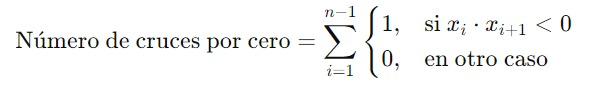
6. Waveform lenght (WL): Mide la duración de la señal.
su formula es:
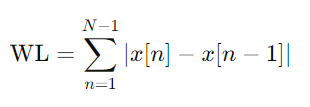
7. Zero Crossing(ZC): Mide la frecuencia de la señal.
Su formula es:
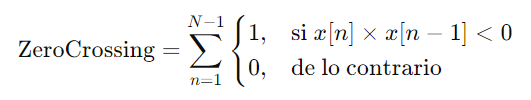

In [ ]:
def calculate_rms(data):
    """Calcula la raíz cuadrada media (RMS) de los datos."""
    return np.sqrt(np.mean(data ** 2))

def calculate_variance(data):
    """Calcula la varianza de los datos."""
    return np.var(data)

def calculate_mav(data):
    """Calcula la media de amplitud absoluta (MAV) de los datos."""
    return np.mean(np.abs(data))

def calculate_mavs(data):
    """Calcula la suma media de amplitud absoluta (MAVS) de los datos."""
    mav = np.mean(np.abs(data))
    return np.sum(np.abs(data - mav))

def calculate_ssc(data):
    """Calcula el cambio de signo (SSC) de los datos."""
    return np.sum(np.abs(np.diff(np.sign(np.diff(data)))))

def calculate_wl(data):
    """Calcula la longitud de onda (WL) de los datos."""
    return np.sum(np.abs(np.diff(data)))

def calculate_zc(data):
    """Calcula el conteo de cruces por cero (ZC) de los datos."""
    return len(np.where(np.diff(np.sign(data)))[0])

def calculate_features_for_folder(dfs):
    """Calcula las características para cada carpeta y canal."""
    folder_features = {}

    for folder_name, df in dfs.items():
        folder_data = df.drop(columns=["Time", "Channel9_Normalized"])  # Eliminar las columnas "Time" y "Canales"
        channel_features = {}

        for col in folder_data.columns:
            channel_data = folder_data[col].values
            rms = calculate_rms(channel_data)
            variance = calculate_variance(channel_data)
            mav = calculate_mav(channel_data)
            mavs = calculate_mavs(channel_data)
            ssc = calculate_ssc(channel_data)
            wl = calculate_wl(channel_data)
            zc = calculate_zc(channel_data)

            channel_features[col] = {
                "RMS": rms,
                "Variance": variance,
                "MAV": mav,
                "MAVS": mavs,
                "SSC": ssc,
                "WL": wl,
                "ZC": zc
            }

        folder_features[folder_name] = channel_features

    return folder_features

In [ ]:
# Obtener las características de cada carpeta y canal
folder_features = calculate_features_for_folder(dfs_by_folder)

df_features = pd.DataFrame.from_dict({(folder_name, channel_name): channel_features
                                      for folder_name, channels in folder_features.items()
                                      for channel_name, channel_features in channels.items()},
                                     orient='index')

In [ ]:
# Crear un diccionario para almacenar los DataFrames por carpeta
dfs_by_folder = {}

for folder_name, df_row in df_features.iterrows():
    folder = folder_name[0]

    if folder not in dfs_by_folder:
        dfs_by_folder[folder] = pd.DataFrame(columns=df_row.index)

    df_new_row = pd.DataFrame([df_row.values], columns=df_row.index)

    df_new_row.insert(0, 'Canal', folder_name[1])
    dfs_by_folder[folder] = pd.concat([dfs_by_folder[folder], df_new_row], ignore_index=True)


for folder_name, df_folder in dfs_by_folder.items():
    print("Carpeta:", folder_name)
    display(df_folder)
    print("\n")

Carpeta: 01


RMS  Variance       MAV        MAVS      SSC          WL   ZC  \
0  0.415053  0.000154  0.414868  141.591620  21073.0  119.582199  2.0   
1  0.430115  0.000122  0.429973  120.714482  21669.0  101.243794  2.0   
2  0.429434  0.000109  0.429308  110.118310  21893.0   90.844276  2.0   
3  0.422337  0.000200  0.422101  162.153151  21565.0  133.393345  2.0   
4  0.365186  0.000292  0.364786  226.842725  21380.0  186.143966  2.0   
5  0.447077  0.000193  0.446861  174.746218  20935.0  147.648104  2.0   
6  0.393213  0.000122  0.393057  113.790829  20854.0   96.493615  2.0   
7  0.284241  0.000149  0.283978  132.200975  21073.0  113.721609  2.0   

                 Canal  
0  Channel1_Normalized  
1  Channel2_Normalized  
2  Channel3_Normalized  
3  Channel4_Normalized  
4  Channel5_Normalized  
5  Channel6_Normalized  
6  Channel7_Normalized  
7  Channel8_Normalized



Carpeta: 02


RMS  Variance       MAV        MAVS      SSC          WL   ZC  \
0  0.099530  0.000189  0.098574  136.233284  20959.0  110.612245  2.0   
1  0.128322  0.000071  0.128046  100.754960  21577.0   86.572756  2.0   
2  0.132672  0.000161  0.132064  182.739505  22201.0  157.610454  2.0   
3  0.207087  0.000842  0.205046  447.469046  22451.0  362.760732  2.0   
4  0.207754  0.000383  0.206829  288.605270  22701.0  240.579820  2.0   
5  0.141635  0.000192  0.140955  183.524621  22154.0  158.173202  2.0   
6  0.196115  0.000329  0.195274  221.342187  21370.0  186.277620  2.0   
7  0.095594  0.000128  0.094922  115.799006  21426.0   99.785410  2.0   

                 Canal  
0  Channel1_Normalized  
1  Channel2_Normalized  
2  Channel3_Normalized  
3  Channel4_Normalized  
4  Channel5_Normalized  
5  Channel6_Normalized  
6  Channel7_Normalized  
7  Channel8_Normalized



Carpeta: 03


RMS  Variance       MAV        MAVS      SSC          WL   ZC  \
0  0.215816  0.000502  0.214651  291.082895  16554.0  239.028330  2.0   
1  0.231938  0.000859  0.230078  351.496327  16830.0  281.804536  2.0   
2  0.217203  0.000459  0.216144  357.276337  17142.0  300.478293  2.0   
3  0.175379  0.000361  0.174346  228.971871  16934.0  192.462398  2.0   
4  0.299074  0.000833  0.297678  411.872845  16914.0  338.613683  2.0   
5  0.221269  0.001035  0.218918  460.470857  17040.0  368.152096  2.0   
6  0.291784  0.000224  0.291400  169.569279  16718.0  140.451519  2.0   
7  0.333837  0.000427  0.333198  255.099181  16704.0  208.076314  2.0   

                 Canal  
0  Channel1_Normalized  
1  Channel2_Normalized  
2  Channel3_Normalized  
3  Channel4_Normalized  
4  Channel5_Normalized  
5  Channel6_Normalized  
6  Channel7_Normalized  
7  Channel8_Normalized



Carpeta: 04


RMS  Variance       MAV        MAVS      SSC          WL   ZC  \
0  0.143265  0.000664  0.140929  379.736582  18776.0  319.016977  2.0   
1  0.094788  0.000220  0.093620  199.397134  18850.0  165.437673  2.0   
2  0.121493  0.000269  0.120381  230.363734  19220.0  196.865639  2.0   
3  0.220699  0.000819  0.218836  433.696819  18932.0  366.460680  2.0   
4  0.224895  0.000803  0.223103  447.594037  19180.0  374.415105  2.0   
5  0.180111  0.000723  0.178091  389.829590  19002.0  329.619726  2.0   
6  0.180364  0.000170  0.179894  130.744756  18450.0  111.386963  2.0   
7  0.139639  0.000167  0.139040  156.571991  18600.0  129.090608  2.0   

                 Canal  
0  Channel1_Normalized  
1  Channel2_Normalized  
2  Channel3_Normalized  
3  Channel4_Normalized  
4  Channel5_Normalized  
5  Channel6_Normalized  
6  Channel7_Normalized  
7  Channel8_Normalized



Carpeta: 05


RMS  Variance       MAV        MAVS      SSC          WL   ZC  \
0  0.213101  0.000070  0.212937   54.192030  16462.0   45.673573  2.0   
1  0.060318  0.000104  0.059451   49.955826  16688.0   39.929448  2.0   
2  0.142889  0.000260  0.141977  193.511426  17044.0  168.411341  2.0   
3  0.117082  0.000174  0.116335  135.493535  17198.0  113.561687  2.0   
4  0.255043  0.000326  0.254403  208.177139  17318.0  177.800087  2.0   
5  0.202078  0.000513  0.200804  248.935413  16878.0  199.190691  2.0   
6  0.132902  0.000263  0.131910  160.877281  16730.0  134.653036  2.0   
7  0.054255  0.000127  0.053075   96.646831  16558.0   79.358553  2.0   

                 Canal  
0  Channel1_Normalized  
1  Channel2_Normalized  
2  Channel3_Normalized  
3  Channel4_Normalized  
4  Channel5_Normalized  
5  Channel6_Normalized  
6  Channel7_Normalized  
7  Channel8_Normalized



Carpeta: 06


RMS  Variance       MAV        MAVS      SSC          WL   ZC  \
0  0.152178  0.000237  0.151396  131.079380  16900.0  106.726205  2.0   
1  0.137150  0.000164  0.136552  147.215814  17284.0  128.602014  2.0   
2  0.222449  0.000251  0.221883  177.137373  17124.0  151.400188  2.0   
3  0.152664  0.000402  0.151341  208.148083  17002.0  172.288085  2.0   
4  0.321736  0.000358  0.321179  220.898981  17342.0  189.647505  2.0   
5  0.196501  0.000479  0.195279  305.552071  17198.0  263.048162  2.0   
6  0.195057  0.000319  0.194237  215.850178  17076.0  189.182310  2.0   
7  0.205024  0.000114  0.204746  107.581457  17064.0   90.170392  2.0   

                 Canal  
0  Channel1_Normalized  
1  Channel2_Normalized  
2  Channel3_Normalized  
3  Channel4_Normalized  
4  Channel5_Normalized  
5  Channel6_Normalized  
6  Channel7_Normalized  
7  Channel8_Normalized



Carpeta: 07


RMS  Variance       MAV        MAVS      SSC          WL   ZC  \
0  0.216212  0.000284  0.215554  255.282856  23715.0  217.099151  2.0   
1  0.124148  0.000099  0.123747  138.729726  23089.0  120.952454  2.0   
2  0.163533  0.000154  0.163062  161.405761  23757.0  138.059020  2.0   
3  0.163251  0.000630  0.161311  413.117787  24801.0  354.338490  2.0   
4  0.304552  0.000512  0.303711  435.482832  25125.0  379.786637  2.0   
5  0.337627  0.000162  0.337387  175.749256  23405.0  151.376802  2.0   
6  0.242301  0.000171  0.241947  153.352156  22602.0  130.793997  2.0   
7  0.287884  0.000345  0.287284  245.692068  22989.0  192.521683  2.0   

                 Canal  
0  Channel1_Normalized  
1  Channel2_Normalized  
2  Channel3_Normalized  
3  Channel4_Normalized  
4  Channel5_Normalized  
5  Channel6_Normalized  
6  Channel7_Normalized  
7  Channel8_Normalized



Carpeta: 08


RMS  Variance       MAV        MAVS      SSC          WL   ZC  \
0  0.200889  0.000435  0.199803  266.193397  19280.0  217.591907  2.0   
1  0.270881  0.000232  0.270453  197.842142  19574.0  166.884017  2.0   
2  0.230536  0.000517  0.229413  311.270571  20120.0  255.361175  2.0   
3  0.291102  0.001007  0.289368  528.337807  20260.0  438.346948  2.0   
4  0.324228  0.001172  0.322414  653.369584  20276.0  544.986034  2.0   
5  0.236609  0.000766  0.234984  452.349079  19850.0  379.359633  2.0   
6  0.265230  0.000651  0.264000  335.391291  19358.0  279.748291  2.0   
7  0.196227  0.000563  0.194787  316.836395  19282.0  265.617780  2.0   

                 Canal  
0  Channel1_Normalized  
1  Channel2_Normalized  
2  Channel3_Normalized  
3  Channel4_Normalized  
4  Channel5_Normalized  
5  Channel6_Normalized  
6  Channel7_Normalized  
7  Channel8_Normalized



Carpeta: 09


RMS  Variance       MAV        MAVS      SSC          WL   ZC  \
0  0.134745  0.000214  0.133949  188.560013  20274.0  156.990299  2.0   
1  0.139752  0.000204  0.139021  138.135488  21434.0  114.267913  2.0   
2  0.173425  0.000298  0.172562  305.327386  20982.0  264.267457  2.0   
3  0.208601  0.000316  0.207843  219.089642  21172.0  185.347795  2.0   
4  0.291785  0.000346  0.291192  239.471277  20984.0  191.608480  2.0   
5  0.345391  0.000249  0.345031  196.153079  20834.0  164.611156  2.0   
6  0.175826  0.000338  0.174863  253.692434  20240.0  211.644641  2.0   
7  0.215218  0.000279  0.214568  206.518401  20406.0  167.893427  2.0   

                 Canal  
0  Channel1_Normalized  
1  Channel2_Normalized  
2  Channel3_Normalized  
3  Channel4_Normalized  
4  Channel5_Normalized  
5  Channel6_Normalized  
6  Channel7_Normalized  
7  Channel8_Normalized



Carpeta: 10


RMS  Variance       MAV        MAVS      SSC          WL   ZC  \
0  0.113735  0.000161  0.113026  136.929222  20608.0  111.866557  2.0   
1  0.121211  0.000148  0.120601  168.356443  20839.0  145.494346  2.0   
2  0.129348  0.000208  0.128542  176.786287  21267.0  146.750000  2.0   
3  0.222895  0.000575  0.221601  348.660234  22179.0  290.363369  2.0   
4  0.280086  0.000558  0.279088  330.774798  21925.0  278.120857  2.0   
5  0.238811  0.000568  0.237619  339.483101  21049.0  277.892437  2.0   
6  0.193062  0.000389  0.192052  202.836964  20370.0  164.877304  2.0   
7  0.234252  0.000240  0.233738  156.117746  20506.0  133.277157  2.0   

                 Canal  
0  Channel1_Normalized  
1  Channel2_Normalized  
2  Channel3_Normalized  
3  Channel4_Normalized  
4  Channel5_Normalized  
5  Channel6_Normalized  
6  Channel7_Normalized  
7  Channel8_Normalized



Carpeta: 11


RMS  Variance       MAV        MAVS      SSC          WL   ZC  \
0  0.223248  0.000570  0.221968  381.530429  23942.0  307.890971  2.0   
1  0.194078  0.000481  0.192836  298.533742  24515.0  240.092885  2.0   
2  0.226789  0.000190  0.226370  202.730869  24877.0  178.807578  2.0   
3  0.325520  0.000383  0.324931  318.663885  25701.0  265.736725  2.0   
4  0.316095  0.001187  0.314213  818.001642  25981.0  683.031495  2.0   
5  0.301336  0.000971  0.299722  613.036565  24807.0  498.152312  2.0   
6  0.171481  0.000282  0.170658  234.695916  24097.0  191.328415  2.0   
7  0.303979  0.000581  0.303021  392.537695  23753.0  313.464962  2.0   

                 Canal  
0  Channel1_Normalized  
1  Channel2_Normalized  
2  Channel3_Normalized  
3  Channel4_Normalized  
4  Channel5_Normalized  
5  Channel6_Normalized  
6  Channel7_Normalized  
7  Channel8_Normalized



Carpeta: 12


RMS  Variance       MAV        MAVS      SSC          WL   ZC  \
0  0.202188  0.000154  0.201806  161.164457  21084.0  141.428820  2.0   
1  0.083134  0.000125  0.082376  139.477451  21205.0  121.297273  2.0   
2  0.178275  0.000224  0.177645  224.603848  21347.0  194.313571  2.0   
3  0.122015  0.000414  0.120306  333.486183  21749.0  282.694000  2.0   
4  0.337283  0.000627  0.336352  412.315543  21995.0  346.328586  2.0   
5  0.180532  0.000569  0.178950  379.211749  21525.0  321.210047  2.0   
6  0.186510  0.000244  0.185855  239.125961  21371.0  204.469275  2.0   
7  0.106821  0.000140  0.106165  154.888396  20954.0  128.623177  2.0   

                 Canal  
0  Channel1_Normalized  
1  Channel2_Normalized  
2  Channel3_Normalized  
3  Channel4_Normalized  
4  Channel5_Normalized  
5  Channel6_Normalized  
6  Channel7_Normalized  
7  Channel8_Normalized



Carpeta: 13


RMS  Variance       MAV        MAVS      SSC          WL   ZC  \
0  0.206425  0.000298  0.205702  288.696080  25936.0  245.229484  2.0   
1  0.093759  0.000084  0.093310  130.463218  26010.0  111.022402  2.0   
2  0.193161  0.000292  0.192404  257.886745  26820.0  214.564853  2.0   
3  0.209693  0.000814  0.207744  604.787861  27494.0  508.772067  2.0   
4  0.257397  0.000780  0.255877  671.929461  27930.0  575.461321  2.0   
5  0.233505  0.000467  0.232503  407.517500  27102.0  335.059716  2.0   
6  0.288727  0.000285  0.288233  266.155438  26204.0  216.664353  2.0   
7  0.202847  0.000482  0.201655  363.295507  25740.0  301.388559  2.0   

                 Canal  
0  Channel1_Normalized  
1  Channel2_Normalized  
2  Channel3_Normalized  
3  Channel4_Normalized  
4  Channel5_Normalized  
5  Channel6_Normalized  
6  Channel7_Normalized  
7  Channel8_Normalized



Carpeta: 14


RMS  Variance       MAV        MAVS      SSC          WL   ZC  \
0  0.101077  0.000257  0.099798  100.405302  18117.0   84.661223  2.0   
1  0.116097  0.000510  0.113880   91.279962  18711.0   79.888665  2.0   
2  0.088045  0.000402  0.085729  105.644630  19525.0   94.231683  2.0   
3  0.178234  0.000578  0.176604  305.107835  19107.0  255.382528  2.0   
4  0.160758  0.000529  0.159103  221.165429  19430.0  193.435917  2.0   
5  0.222665  0.000406  0.221751  211.578019  19369.0  184.730243  2.0   
6  0.156581  0.000525  0.154897  183.387981  18533.0  156.689951  2.0   
7  0.225047  0.000441  0.224066  231.449828  18599.0  196.285242  2.0   

                 Canal  
0  Channel1_Normalized  
1  Channel2_Normalized  
2  Channel3_Normalized  
3  Channel4_Normalized  
4  Channel5_Normalized  
5  Channel6_Normalized  
6  Channel7_Normalized  
7  Channel8_Normalized



Carpeta: 15


RMS  Variance       MAV        MAVS      SSC          WL   ZC  \
0  0.235538  0.000793  0.233848  267.200575  16627.0  206.295975  2.0   
1  0.224619  0.000331  0.223881  202.275858  16913.0  160.239915  2.0   
2  0.196691  0.000101  0.196436   95.788650  16903.0   83.479667  2.0   
3  0.147790  0.000227  0.147020  140.561889  17085.0  116.761175  2.0   
4  0.291629  0.000977  0.289948  471.285062  17636.0  392.867808  2.0   
5  0.243819  0.000813  0.242146  388.279995  17689.0  318.937620  2.0   
6  0.232464  0.000104  0.232239   92.269988  17223.0   78.297253  2.0   
7  0.312249  0.000243  0.311860  161.380431  16934.0  135.523449  2.0   

                 Canal  
0  Channel1_Normalized  
1  Channel2_Normalized  
2  Channel3_Normalized  
3  Channel4_Normalized  
4  Channel5_Normalized  
5  Channel6_Normalized  
6  Channel7_Normalized  
7  Channel8_Normalized



Carpeta: 16


RMS  Variance       MAV        MAVS      SSC          WL   ZC  \
0  0.170076  0.000217  0.169436  152.711277  17307.0  127.893784  2.0   
1  0.172855  0.000421  0.171634  284.325599  17330.0  233.918634  2.0   
2  0.138607  0.000255  0.137683  203.069073  17469.0  166.803009  2.0   
3  0.180780  0.000699  0.178837  349.816154  17375.0  275.464292  2.0   
4  0.215922  0.000844  0.213959  410.652821  17696.0  337.709418  2.0   
5  0.152421  0.000698  0.150115  357.969383  17700.0  293.028257  2.0   
6  0.229001  0.000654  0.227568  373.207757  17716.0  319.343091  2.0   
7  0.145884  0.000329  0.144750  214.852983  17687.0  185.357987  2.0   

                 Canal  
0  Channel1_Normalized  
1  Channel2_Normalized  
2  Channel3_Normalized  
3  Channel4_Normalized  
4  Channel5_Normalized  
5  Channel6_Normalized  
6  Channel7_Normalized  
7  Channel8_Normalized



Carpeta: 17


RMS  Variance       MAV        MAVS      SSC          WL   ZC  \
0  0.146632  0.000180  0.146016  142.633244  22512.0  120.116142  2.0   
1  0.313004  0.000171  0.312731  193.662286  22761.0  165.146197  2.0   
2  0.152603  0.000312  0.151578  232.272135  22947.0  192.138996  2.0   
3  0.265546  0.000394  0.264803  287.312643  22661.0  227.894048  2.0   
4  0.167523  0.000582  0.165778  341.552594  22481.0  279.595962  2.0   
5  0.200450  0.000280  0.199750  223.732564  22554.0  184.488420  2.0   
6  0.279728  0.000243  0.279292  218.440383  22464.0  181.337724  2.0   
7  0.155253  0.000237  0.154489  185.972961  22365.0  153.905581  2.0   

                 Canal  
0  Channel1_Normalized  
1  Channel2_Normalized  
2  Channel3_Normalized  
3  Channel4_Normalized  
4  Channel5_Normalized  
5  Channel6_Normalized  
6  Channel7_Normalized  
7  Channel8_Normalized



Carpeta: 18


RMS  Variance       MAV        MAVS      SSC          WL   ZC  \
0  0.246048  0.000209  0.245623  147.126066  20660.0  123.022399  2.0   
1  0.238898  0.000182  0.238517  108.117471  20822.0   82.609319  2.0   
2  0.123491  0.000291  0.122308  219.381941  21684.0  198.026126  2.0   
3  0.237334  0.000433  0.236420  291.465289  22166.0  249.013510  2.0   
4  0.173767  0.000588  0.172067  295.684892  21712.0  245.791323  2.0   
5  0.298562  0.000525  0.297680  327.852644  21598.0  268.816057  2.0   
6  0.173466  0.000270  0.172686  148.162909  21140.0  118.793551  2.0   
7  0.109672  0.000250  0.108527  178.204406  20480.0  147.444266  2.0   

                 Canal  
0  Channel1_Normalized  
1  Channel2_Normalized  
2  Channel3_Normalized  
3  Channel4_Normalized  
4  Channel5_Normalized  
5  Channel6_Normalized  
6  Channel7_Normalized  
7  Channel8_Normalized



Carpeta: 19


RMS  Variance       MAV        MAVS      SSC          WL   ZC  \
0  0.146662  0.000168  0.146087  103.961484  17302.0   88.113623  2.0   
1  0.146445  0.000117  0.146045  142.555779  17565.0  122.191503  2.0   
2  0.159181  0.000082  0.158924   79.512627  17461.0   68.958711  2.0   
3  0.236551  0.000740  0.234983  306.134540  17985.0  249.501172  2.0   
4  0.216013  0.001100  0.213453  493.145191  18263.0  409.148641  2.0   
5  0.179481  0.000718  0.177470  338.051470  17502.0  284.874089  2.0   
6  0.243899  0.000627  0.242611  302.443412  17117.0  249.842301  2.0   
7  0.132834  0.000294  0.131722  186.412613  17336.0  154.062691  2.0   

                 Canal  
0  Channel1_Normalized  
1  Channel2_Normalized  
2  Channel3_Normalized  
3  Channel4_Normalized  
4  Channel5_Normalized  
5  Channel6_Normalized  
6  Channel7_Normalized  
7  Channel8_Normalized



Carpeta: 20


RMS  Variance       MAV        MAVS      SSC          WL   ZC  \
0  0.242135  0.000478  0.241145  312.071903  21264.0  252.977868  2.0   
1  0.207325  0.000194  0.206855  168.692379  21629.0  142.492023  2.0   
2  0.172480  0.000316  0.171561  226.651344  21534.0  188.889803  2.0   
3  0.246459  0.001113  0.244190  597.149592  21887.0  476.689752  2.0   
4  0.292575  0.001191  0.290533  642.821108  22073.0  527.096570  2.0   
5  0.257258  0.000858  0.255585  566.255603  21887.0  472.191392  2.0   
6  0.191593  0.000298  0.190813  208.450215  21216.0  172.582574  2.0   
7  0.225345  0.000732  0.223715  415.613908  20931.0  327.465584  2.0   

                 Canal  
0  Channel1_Normalized  
1  Channel2_Normalized  
2  Channel3_Normalized  
3  Channel4_Normalized  
4  Channel5_Normalized  
5  Channel6_Normalized  
6  Channel7_Normalized  
7  Channel8_Normalized



Carpeta: 21


RMS  Variance       MAV        MAVS      SSC          WL   ZC  \
0  0.185601  0.000544  0.184128  376.191073  19926.0  310.316259  2.0   
1  0.145687  0.000225  0.144914  209.086818  19938.0  182.120857  2.0   
2  0.105480  0.000189  0.104578  183.318126  20270.0  152.474031  2.0   
3  0.231200  0.001004  0.229018  504.523332  20890.0  419.683506  2.0   
4  0.252106  0.001100  0.249914  608.344900  20816.0  508.902572  2.0   
5  0.237360  0.000822  0.235622  490.225523  20772.0  419.892273  2.0   
6  0.258791  0.000246  0.258314  177.482529  19854.0  148.934956  2.0   
7  0.228803  0.000594  0.227501  269.819060  19668.0  208.844492  2.0   

                 Canal  
0  Channel1_Normalized  
1  Channel2_Normalized  
2  Channel3_Normalized  
3  Channel4_Normalized  
4  Channel5_Normalized  
5  Channel6_Normalized  
6  Channel7_Normalized  
7  Channel8_Normalized



Carpeta: 22


RMS  Variance       MAV        MAVS      SSC          WL   ZC  \
0  0.152222  0.000251  0.151395  212.414674  20900.0  181.323499  2.0   
1  0.170832  0.000317  0.169903  237.664604  21171.0  203.894110  2.0   
2  0.286586  0.000428  0.285838  327.065129  21871.0  274.041421  2.0   
3  0.277589  0.000540  0.276615  342.999921  21659.0  284.901331  2.0   
4  0.143342  0.000220  0.142572  166.202707  20791.0  140.304171  2.0   
5  0.152688  0.000140  0.152230  107.802279  20627.0   92.058203  2.0   
6  0.143744  0.000138  0.143262  167.109172  20175.0  147.068855  2.0   
7  0.136231  0.000344  0.134962  272.735774  20621.0  233.455216  2.0   

                 Canal  
0  Channel1_Normalized  
1  Channel2_Normalized  
2  Channel3_Normalized  
3  Channel4_Normalized  
4  Channel5_Normalized  
5  Channel6_Normalized  
6  Channel7_Normalized  
7  Channel8_Normalized



Carpeta: 23


RMS  Variance       MAV        MAVS      SSC          WL   ZC  \
0  0.219173  0.000324  0.218433  217.426953  20290.0  175.958559  2.0   
1  0.143557  0.000284  0.142565  191.400436  20287.0  163.451126  2.0   
2  0.177825  0.000228  0.177184  163.653546  20089.0  135.284532  2.0   
3  0.258736  0.000771  0.257241  442.708787  20593.0  345.667639  2.0   
4  0.335588  0.001015  0.334072  578.458126  21203.0  470.165218  2.0   
5  0.184066  0.000541  0.182589  355.195568  21447.0  304.520705  2.0   
6  0.127889  0.000525  0.125818  286.453944  20883.0  234.997647  2.0   
7  0.313447  0.000401  0.312806  285.087104  20309.0  236.514112  2.0   

                 Canal  
0  Channel1_Normalized  
1  Channel2_Normalized  
2  Channel3_Normalized  
3  Channel4_Normalized  
4  Channel5_Normalized  
5  Channel6_Normalized  
6  Channel7_Normalized  
7  Channel8_Normalized



Carpeta: 24


RMS  Variance       MAV        MAVS      SSC          WL   ZC  \
0  0.139030  0.000248  0.138137  156.129298  18093.0  123.629794  2.0   
1  0.114468  0.000134  0.113881   90.907935  18207.0   77.045036  2.0   
2  0.119739  0.000219  0.118819  165.884285  18561.0  146.495020  2.0   
3  0.100336  0.000184  0.099414  173.519597  18541.0  144.581619  2.0   
4  0.183031  0.000836  0.180734  401.178686  18627.0  334.671131  2.0   
5  0.154705  0.000347  0.153581  185.382214  18478.0  154.025237  2.0   
6  0.151333  0.000128  0.150908   98.619003  18225.0   81.505627  2.0   
7  0.223838  0.000362  0.223028  222.730238  18053.0  189.142108  2.0   

                 Canal  
0  Channel1_Normalized  
1  Channel2_Normalized  
2  Channel3_Normalized  
3  Channel4_Normalized  
4  Channel5_Normalized  
5  Channel6_Normalized  
6  Channel7_Normalized  
7  Channel8_Normalized



Carpeta: 25


RMS  Variance       MAV        MAVS      SSC          WL   ZC  \
0  0.200714  0.000500  0.199464  371.940822  21084.0  305.684546  2.0   
1  0.192658  0.000598  0.191099  362.470359  21546.0  297.180714  2.0   
2  0.228584  0.000432  0.227636  339.413479  21694.0  285.369473  2.0   
3  0.229423  0.001022  0.227185  580.806696  21734.0  487.145114  2.0   
4  0.234117  0.001309  0.231304  730.830767  22098.0  606.272623  2.0   
5  0.226624  0.000606  0.225283  437.488222  22038.0  369.237015  2.0   
6  0.205038  0.000198  0.204556  210.377111  21276.0  175.504091  2.0   
7  0.199719  0.000650  0.198084  422.041488  21318.0  349.606048  2.0   

                 Canal  
0  Channel1_Normalized  
1  Channel2_Normalized  
2  Channel3_Normalized  
3  Channel4_Normalized  
4  Channel5_Normalized  
5  Channel6_Normalized  
6  Channel7_Normalized  
7  Channel8_Normalized



Carpeta: 26


RMS  Variance       MAV        MAVS      SSC          WL   ZC  \
0  0.139792  0.000491  0.138025  319.653053  20076.0  269.276938  2.0   
1  0.150059  0.000227  0.149302  181.507141  20028.0  150.816122  2.0   
2  0.218917  0.000406  0.217987  254.209675  20190.0  204.985649  2.0   
3  0.236086  0.000827  0.234327  429.949416  20732.0  362.874924  2.0   
4  0.296227  0.000772  0.294922  492.528071  20734.0  415.464579  2.0   
5  0.194376  0.000806  0.192291  471.272701  20338.0  392.431922  2.0   
6  0.197256  0.000363  0.196333  252.459670  19946.0  209.296767  2.0   
7  0.255859  0.000181  0.255505  189.120960  19978.0  162.575253  2.0   

                 Canal  
0  Channel1_Normalized  
1  Channel2_Normalized  
2  Channel3_Normalized  
3  Channel4_Normalized  
4  Channel5_Normalized  
5  Channel6_Normalized  
6  Channel7_Normalized  
7  Channel8_Normalized



Carpeta: 27


RMS  Variance       MAV        MAVS      SSC          WL   ZC  \
0  0.247888  0.000181  0.247523  118.571079  16764.0   97.553616  2.0   
1  0.120129  0.000142  0.119538   80.062731  17260.0   67.333800  2.0   
2  0.063406  0.000099  0.062620   72.024936  17374.0   61.003193  2.0   
3  0.235020  0.000520  0.233911  265.638535  17174.0  213.519124  2.0   
4  0.272413  0.000673  0.271174  344.760158  18002.0  289.799165  2.0   
5  0.285132  0.000600  0.284079  337.601842  18304.0  296.082415  2.0   
6  0.211761  0.000340  0.210957  174.834909  17512.0  142.216009  2.0   
7  0.273043  0.000239  0.272605  150.997397  17152.0  126.174159  2.0   

                 Canal  
0  Channel1_Normalized  
1  Channel2_Normalized  
2  Channel3_Normalized  
3  Channel4_Normalized  
4  Channel5_Normalized  
5  Channel6_Normalized  
6  Channel7_Normalized  
7  Channel8_Normalized



Carpeta: 28


RMS  Variance       MAV        MAVS      SSC          WL   ZC  \
0  0.098249  0.000095  0.097766   71.823437  17037.0   60.399252  2.0   
1  0.092047  0.000192  0.091000  124.175999  17275.0  104.363486  2.0   
2  0.101595  0.000223  0.100492  234.468147  17899.0  197.775992  2.0   
3  0.153444  0.000154  0.152942  125.672949  17373.0  102.103830  2.0   
4  0.164595  0.000465  0.163177  248.541066  17501.0  202.117552  2.0   
5  0.186430  0.000399  0.185357  253.666964  17939.0  214.748521  2.0   
6  0.140572  0.000338  0.139364  148.343310  17485.0  116.797828  2.0   
7  0.193331  0.000239  0.192713  144.458425  17291.0  122.490679  2.0   

                 Canal  
0  Channel1_Normalized  
1  Channel2_Normalized  
2  Channel3_Normalized  
3  Channel4_Normalized  
4  Channel5_Normalized  
5  Channel6_Normalized  
6  Channel7_Normalized  
7  Channel8_Normalized



Carpeta: 29


RMS  Variance       MAV        MAVS      SSC          WL   ZC  \
0  0.076670  0.000056  0.076301   62.653878  18036.0   56.049623  2.0   
1  0.182857  0.000271  0.182116  197.670176  17968.0  169.032812  2.0   
2  0.118607  0.000120  0.118101  106.674248  18304.0   90.259670  2.0   
3  0.258326  0.000461  0.257433  259.859726  18814.0  216.683235  2.0   
4  0.183188  0.000444  0.181972  271.595956  18720.0  225.428871  2.0   
5  0.128319  0.000154  0.127715  140.237544  18134.0  116.799331  2.0   
6  0.081640  0.000142  0.080766  138.946257  17786.0  118.884205  2.0   
7  0.087111  0.000068  0.086719   63.611989  18158.0   56.686161  2.0   

                 Canal  
0  Channel1_Normalized  
1  Channel2_Normalized  
2  Channel3_Normalized  
3  Channel4_Normalized  
4  Channel5_Normalized  
5  Channel6_Normalized  
6  Channel7_Normalized  
7  Channel8_Normalized



Carpeta: 30


RMS  Variance       MAV        MAVS      SSC          WL   ZC  \
0  0.121542  0.000112  0.121082  135.370314  27026.0  115.862856  2.0   
1  0.145855  0.000337  0.144695  518.859870  26410.0  449.762415  2.0   
2  0.054301  0.000098  0.053388  260.901476  26746.0  216.613169  2.0   
3  0.127163  0.000323  0.125889  342.259343  27962.0  295.683724  2.0   
4  0.238447  0.000478  0.237442  522.157003  28398.0  448.322343  2.0   
5  0.250051  0.000441  0.249167  476.667160  27952.0  419.817508  2.0   
6  0.192098  0.000135  0.191747  149.119626  26802.0  125.814479  2.0   
7  0.233364  0.000253  0.232821  232.496342  27081.0  196.011487  2.0   

                 Canal  
0  Channel1_Normalized  
1  Channel2_Normalized  
2  Channel3_Normalized  
3  Channel4_Normalized  
4  Channel5_Normalized  
5  Channel6_Normalized  
6  Channel7_Normalized  
7  Channel8_Normalized



Carpeta: 31


RMS  Variance       MAV        MAVS      SSC          WL   ZC  \
0  0.319368  0.000919  0.317926  378.722810  15986.0  298.370389  2.0   
1  0.272144  0.000267  0.271653  206.496038  16264.0  173.433265  2.0   
2  0.176453  0.000220  0.175828  161.313540  16260.0  132.558182  2.0   
3  0.321012  0.000722  0.319886  336.340633  16582.0  275.560189  2.0   
4  0.307827  0.000976  0.306238  425.389495  16944.0  348.272559  2.0   
5  0.445843  0.000250  0.445562  207.950707  16702.0  174.770418  2.0   
6  0.157010  0.000389  0.155765  235.079134  16150.0  196.518378  2.0   
7  0.226285  0.000659  0.224824  328.534893  16160.0  270.974013  2.0   

                 Canal  
0  Channel1_Normalized  
1  Channel2_Normalized  
2  Channel3_Normalized  
3  Channel4_Normalized  
4  Channel5_Normalized  
5  Channel6_Normalized  
6  Channel7_Normalized  
7  Channel8_Normalized



Carpeta: 32


RMS  Variance       MAV        MAVS      SSC          WL   ZC  \
0  0.222647  0.000249  0.222088  169.333866  20168.0  140.524764  2.0   
1  0.243407  0.000246  0.242901  146.035579  20425.0  117.705139  2.0   
2  0.099621  0.000140  0.098913  114.150348  20577.0   98.970276  2.0   
3  0.279948  0.000241  0.279518  189.886485  20759.0  162.484688  2.0   
4  0.273589  0.000820  0.272088  468.866371  21191.0  387.000137  2.0   
5  0.183202  0.000605  0.181543  394.746588  21185.0  334.216617  2.0   
6  0.121512  0.000170  0.120810  148.255934  20388.0  125.345166  2.0   
7  0.175599  0.000143  0.175191  121.973815  20198.0  105.633140  2.0   

                 Canal  
0  Channel1_Normalized  
1  Channel2_Normalized  
2  Channel3_Normalized  
3  Channel4_Normalized  
4  Channel5_Normalized  
5  Channel6_Normalized  
6  Channel7_Normalized  
7  Channel8_Normalized



Carpeta: 33


RMS  Variance       MAV        MAVS      SSC          WL   ZC  \
0  0.188933  0.000239  0.188299  156.018314  18114.0  126.619089  2.0   
1  0.076155  0.000120  0.075366   95.092329  18416.0   80.511948  2.0   
2  0.169590  0.000287  0.168741  209.432263  18960.0  175.508549  2.0   
3  0.208589  0.001234  0.205611  565.752210  19222.0  455.587643  2.0   
4  0.269297  0.000980  0.267472  499.913283  19402.0  423.775078  2.0   
5  0.281865  0.000687  0.280644  387.649178  19468.0  332.959373  2.0   
6  0.290926  0.000581  0.289926  264.018318  18670.0  215.237775  2.0   
7  0.153340  0.000396  0.152043  265.561327  18304.0  228.526291  2.0   

                 Canal  
0  Channel1_Normalized  
1  Channel2_Normalized  
2  Channel3_Normalized  
3  Channel4_Normalized  
4  Channel5_Normalized  
5  Channel6_Normalized  
6  Channel7_Normalized  
7  Channel8_Normalized



Carpeta: 34


RMS  Variance       MAV        MAVS      SSC          WL   ZC  \
0  0.102932  0.000104  0.102424   84.421071  16919.0   72.371297  2.0   
1  0.137862  0.000334  0.136644  130.641897  17223.0  107.218229  2.0   
2  0.144540  0.000310  0.143464  230.424286  17781.0  195.403797  2.0   
3  0.134034  0.000389  0.132575  229.241687  17507.0  185.536694  2.0   
4  0.318512  0.000419  0.317854  285.615540  17796.0  240.355220  2.0   
5  0.229774  0.000403  0.228895  244.357096  17578.0  207.541010  2.0   
6  0.219400  0.000438  0.218399  242.193727  17146.0  199.090237  2.0   
7  0.185029  0.000383  0.183993  198.586746  16944.0  173.321159  2.0   

                 Canal  
0  Channel1_Normalized  
1  Channel2_Normalized  
2  Channel3_Normalized  
3  Channel4_Normalized  
4  Channel5_Normalized  
5  Channel6_Normalized  
6  Channel7_Normalized  
7  Channel8_Normalized



Carpeta: 35


RMS  Variance       MAV        MAVS      SSC          WL   ZC  \
0  0.300614  0.000457  0.299852  224.808702  16462.0  178.041554  2.0   
1  0.175459  0.000289  0.174635  123.338370  16866.0   96.123126  2.0   
2  0.142148  0.000295  0.141108  200.126657  16802.0  169.522504  2.0   
3  0.139570  0.000451  0.137947  239.692757  17114.0  190.198210  2.0   
4  0.298296  0.001482  0.295801  603.686069  17644.0  485.763485  2.0   
5  0.185072  0.000808  0.182877  393.029615  17638.0  331.524198  2.0   
6  0.275092  0.000420  0.274329  240.095745  17158.0  203.268383  2.0   
7  0.327891  0.000550  0.327052  272.347362  16964.0  222.342789  2.0   

                 Canal  
0  Channel1_Normalized  
1  Channel2_Normalized  
2  Channel3_Normalized  
3  Channel4_Normalized  
4  Channel5_Normalized  
5  Channel6_Normalized  
6  Channel7_Normalized  
7  Channel8_Normalized



Carpeta: 36


RMS  Variance       MAV        MAVS      SSC          WL   ZC  \
0  0.187967  0.000243  0.187319  158.578763  18118.0  131.738776  2.0   
1  0.228929  0.000220  0.228448  163.408107  18265.0  139.022462  2.0   
2  0.070887  0.000084  0.070292  103.786009  18368.0   89.163524  2.0   
3  0.176350  0.000408  0.175189  232.159550  18511.0  201.783983  2.0   
4  0.303793  0.000314  0.303275  201.814924  19029.0  173.475019  2.0   
5  0.105480  0.000127  0.104878  129.007804  18760.0  110.456600  2.0   
6  0.117632  0.000072  0.117324   66.359183  18109.0   55.422271  2.0   
7  0.132204  0.000200  0.131444  144.196859  17726.0  122.600243  2.0   

                 Canal  
0  Channel1_Normalized  
1  Channel2_Normalized  
2  Channel3_Normalized  
3  Channel4_Normalized  
4  Channel5_Normalized  
5  Channel6_Normalized  
6  Channel7_Normalized  
7  Channel8_Normalized

El análisis se esta realizando por canales, es decir, cada canal representa un electrodo, de los cuales, cada uno esta puesto en una zona especifica del músculo, las electromiografías miden los potenciales de acción de las fibras musculares, para observar como se comporta el músculo. Para este trabajo, se hace un análisis de como se comporta esa área especifica del músculo en diferentes movimientos para cada sujeto, a continuación se muestran las gráficas y pruebas para cada uno de los canales con su respectivo análisis

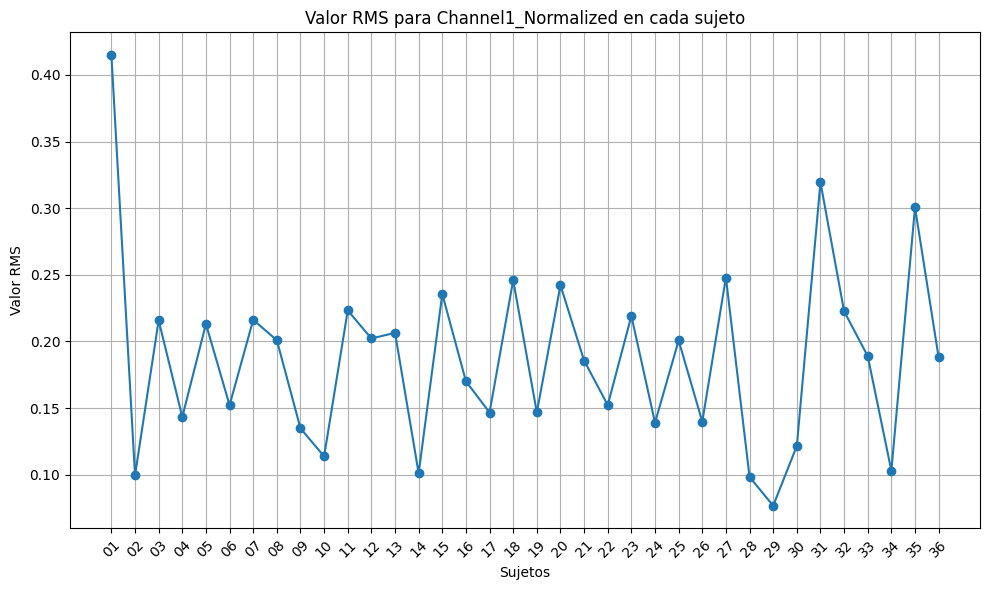

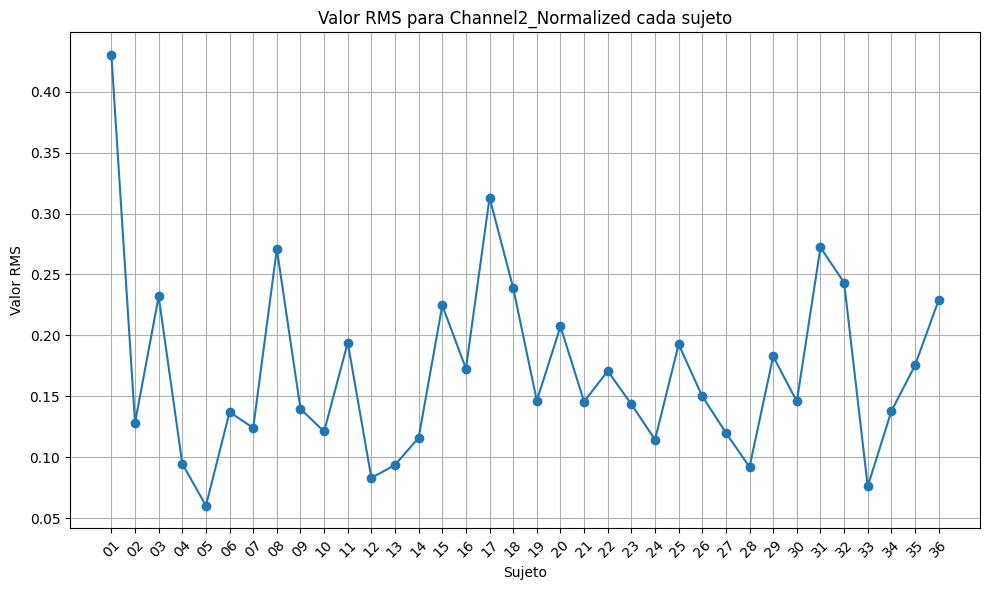

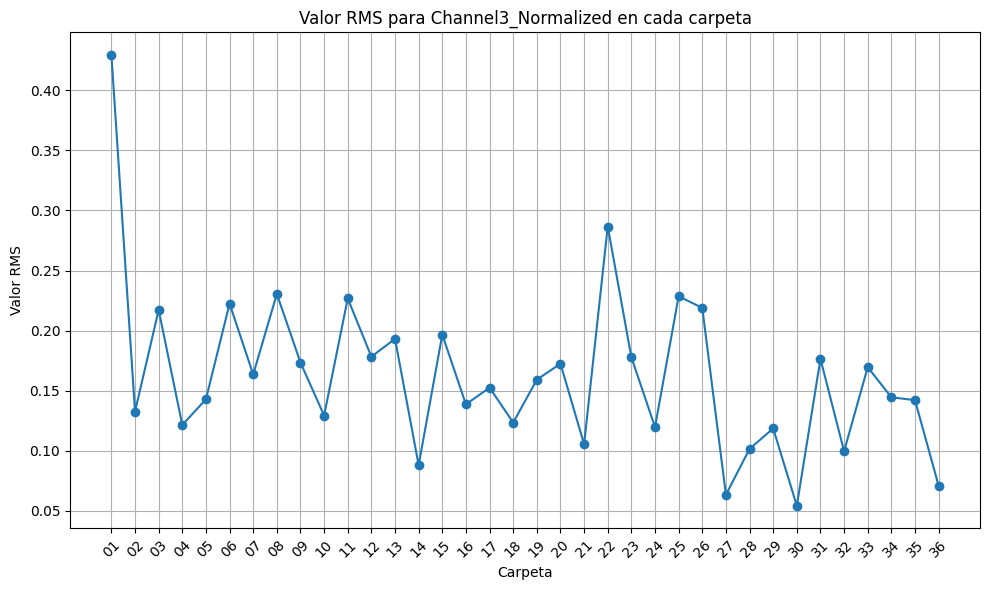

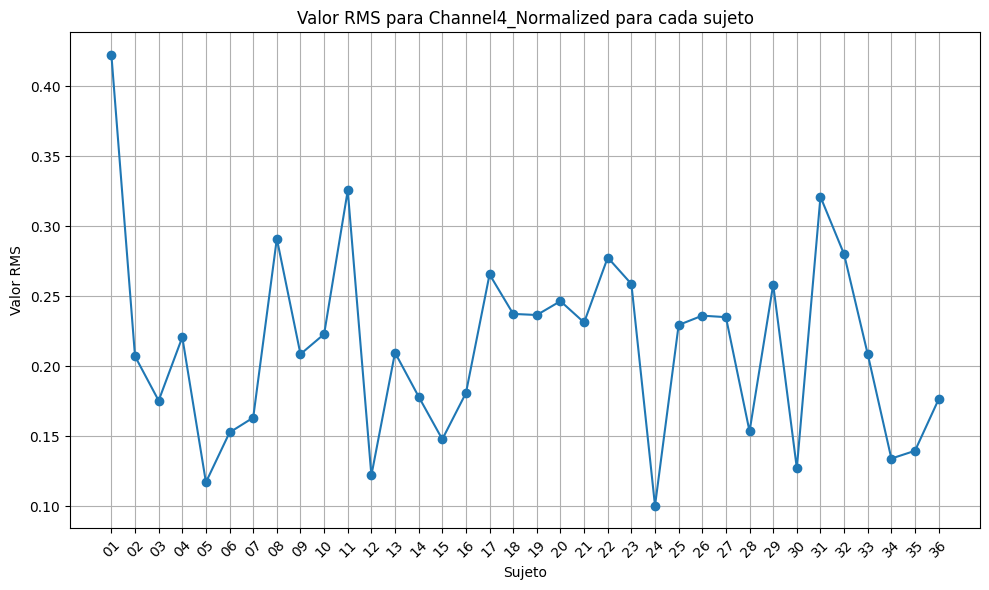

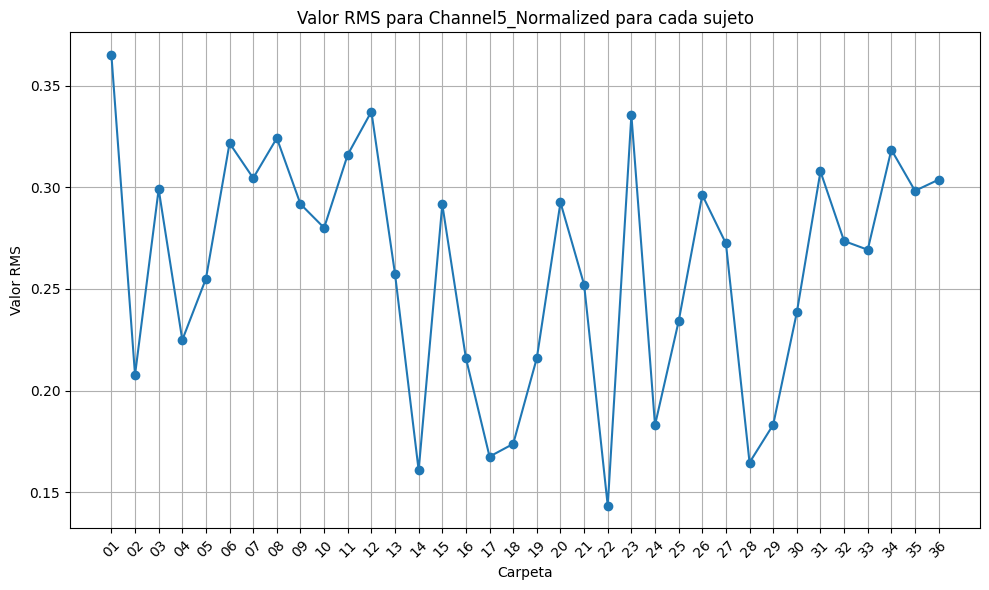

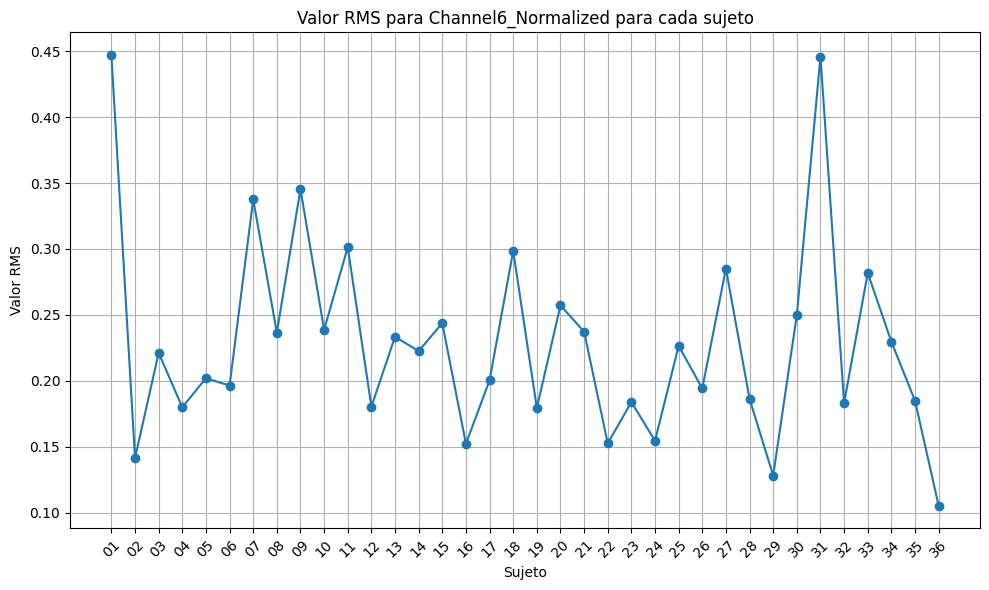

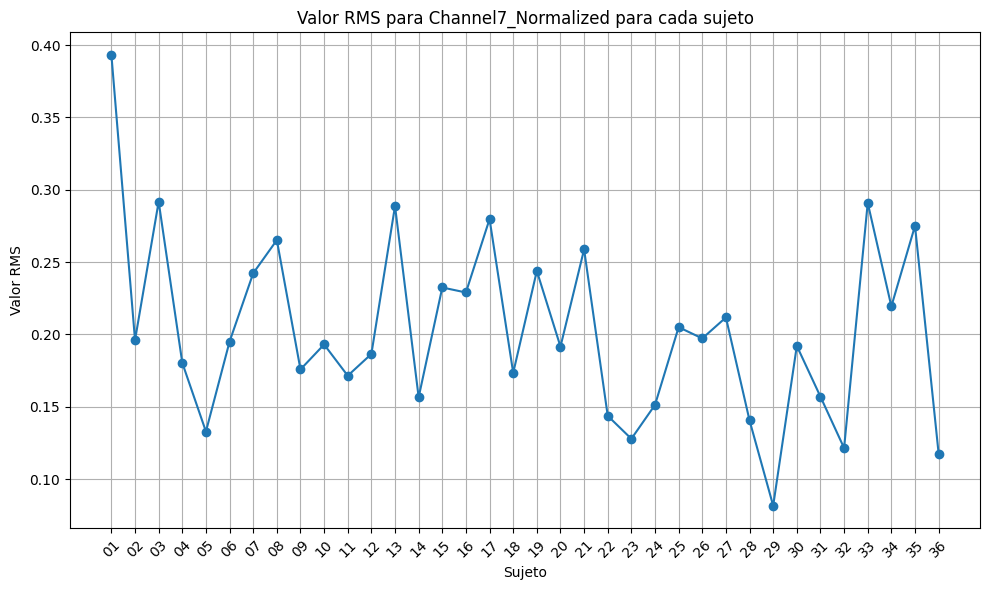

In [ ]:
# RMS canal 1
valores_rms = []

for folder_name, df_folder in dfs_by_folder.items():
    rms_channel1 = df_folder[df_folder['Canal'] == 'Channel1_Normalized']['RMS'].values[0]
    valores_rms.append(rms_channel1)

folders = ['{:02d}'.format(i) for i in range(1, 37)]
plt.figure(figsize=(10, 6))

plt.plot(folders, valores_rms, marker='o')
plt.title('Valor RMS para Channel1_Normalized en cada sujeto')
plt.xlabel('Sujetos')
plt.ylabel('Valor RMS')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#RMS canal 2

valores_rms2 = []
for folder_name, df_folder in dfs_by_folder.items():
    rms_channel2 = df_folder[df_folder['Canal'] == 'Channel2_Normalized']['RMS'].values[0]

    valores_rms2.append(rms_channel2)

folders = ['{:02d}'.format(i) for i in range(1, 37)]
plt.figure(figsize=(10, 6))

plt.plot(folders, valores_rms2, marker='o')
plt.title('Valor RMS para Channel2_Normalized cada sujeto')
plt.xlabel('Sujeto')
plt.ylabel('Valor RMS')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#RMS canal 3

valores_rms3 = []

for folder_name, df_folder in dfs_by_folder.items():

    rms_channel3 = df_folder[df_folder['Canal'] == 'Channel3_Normalized']['RMS'].values[0]
    valores_rms3.append(rms_channel3)

folders = ['{:02d}'.format(i) for i in range(1, 37)]

plt.figure(figsize=(10, 6))

plt.plot(folders, valores_rms3, marker='o')
plt.title('Valor RMS para Channel3_Normalized en cada carpeta')
plt.xlabel('Carpeta')
plt.ylabel('Valor RMS')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#RMS para el canal 4
valores_rms4 = []

for folder_name, df_folder in dfs_by_folder.items():
    rms_channel4 = df_folder[df_folder['Canal'] == 'Channel4_Normalized']['RMS'].values[0]
    valores_rms4.append(rms_channel4)

folders = ['{:02d}'.format(i) for i in range(1, 37)]

plt.figure(figsize=(10, 6))

plt.plot(folders, valores_rms4, marker='o')
plt.title('Valor RMS para Channel4_Normalized para cada sujeto')
plt.xlabel('Sujeto')
plt.ylabel('Valor RMS')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#RMS para el canal 5
valores_rms5 = []

for folder_name, df_folder in dfs_by_folder.items():
    rms_channel5 = df_folder[df_folder['Canal'] == 'Channel5_Normalized']['RMS'].values[0]
    valores_rms5.append(rms_channel5)

folders = ['{:02d}'.format(i) for i in range(1, 37)]

plt.figure(figsize=(10, 6))

plt.plot(folders, valores_rms5, marker='o')
plt.title('Valor RMS para Channel5_Normalized para cada sujeto')
plt.xlabel('Carpeta')
plt.ylabel('Valor RMS')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#RMS para el canal 6
valores_rms6 = []

for folder_name, df_folder in dfs_by_folder.items():
    rms_channel6 = df_folder[df_folder['Canal'] == 'Channel6_Normalized']['RMS'].values[0]
    valores_rms6.append(rms_channel6)

folders = ['{:02d}'.format(i) for i in range(1, 37)]

plt.figure(figsize=(10, 6))

plt.plot(folders, valores_rms6, marker='o')
plt.title('Valor RMS para Channel6_Normalized para cada sujeto')
plt.xlabel('Sujeto')
plt.ylabel('Valor RMS')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#RMS para el canal 7
valores_rms7 = []

for folder_name, df_folder in dfs_by_folder.items():
    rms_channel7 = df_folder[df_folder['Canal'] == 'Channel7_Normalized']['RMS'].values[0]
    valores_rms7.append(rms_channel7)

folders = ['{:02d}'.format(i) for i in range(1, 37)]

plt.figure(figsize=(10, 6))

plt.plot(folders, valores_rms7, marker='o')
plt.title('Valor RMS para Channel7_Normalized para cada sujeto')
plt.xlabel('Sujeto')
plt.ylabel('Valor RMS')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


En las siguientes gráficas se puede observar el valor calculado de RMS para el canal de cada sujeto, el RMS es la raíz cuadrada del promedio de los cuadrados de los valores de la señal, esto indica la magnitud o amplitud general de la señal en ese sujeto para el canal especifico.

Cada punto azul representa el valor RMS calculado para un sujeto en particular, para cada uno de los canales, se puede observar que de acuerdo al canal y sujeto los picos de amplitud varian, esto se puede deber a que cada canal es una zona diferente en la que esta puesta el electrodo, por lo tanto en ciertos movimientos una parte del músculo puede tener mayor actividad que otra, esto también se debe a que algunos sujetos pueden tener una actividad muscular más pronunciada en ciertas áreas del músculo.

Cuando vemos un pico en las gráficas RMS significa que hubo una mayor actividad muscular en esa zona para ese sujeto durante los diferentes ejercicios. Por ejemplo para el sujeto 1, la mayor activación muscular se da en la zona en la que esta puesta el canal 2 durante los gestos realizados.

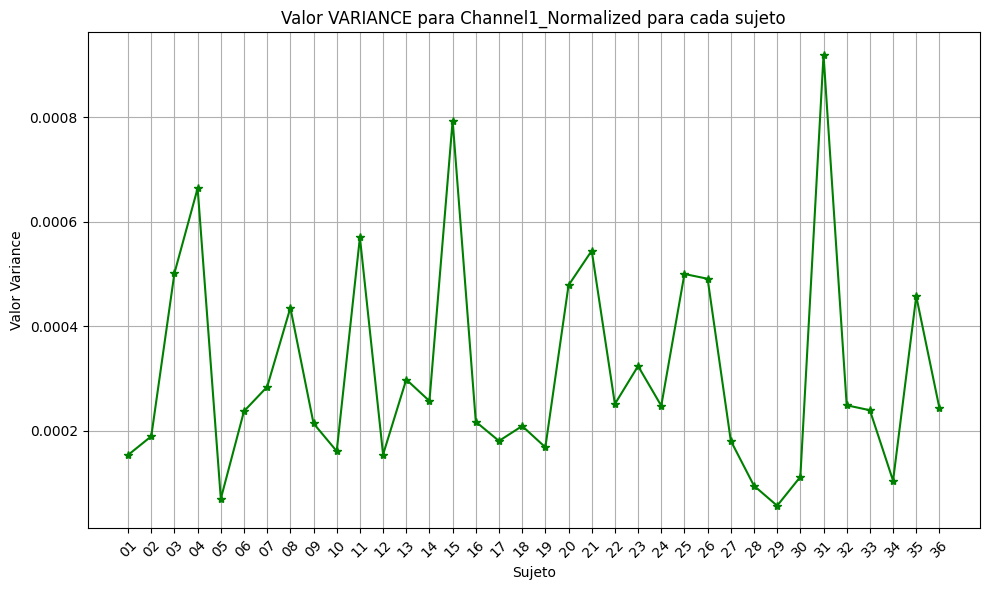

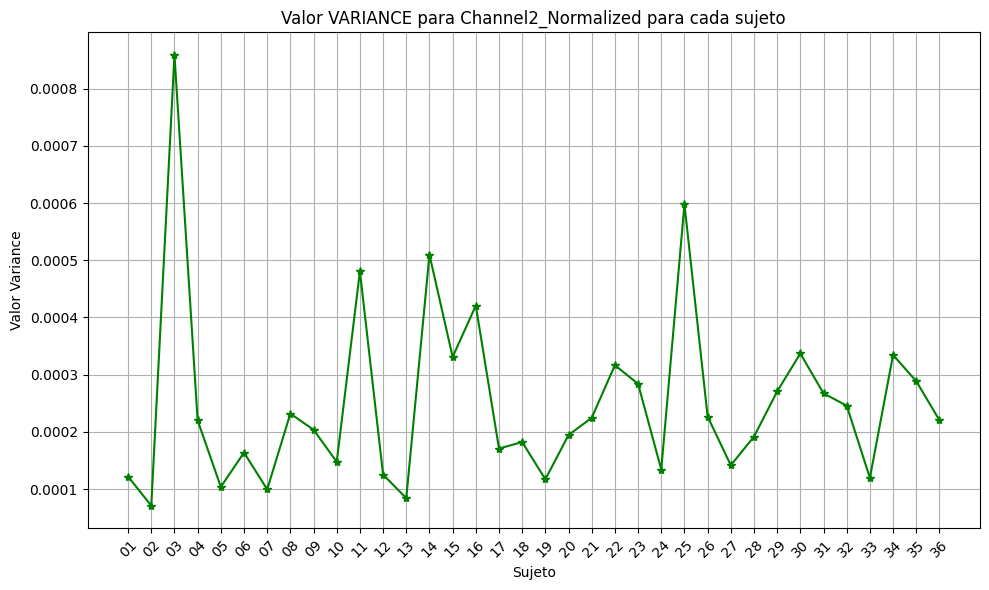

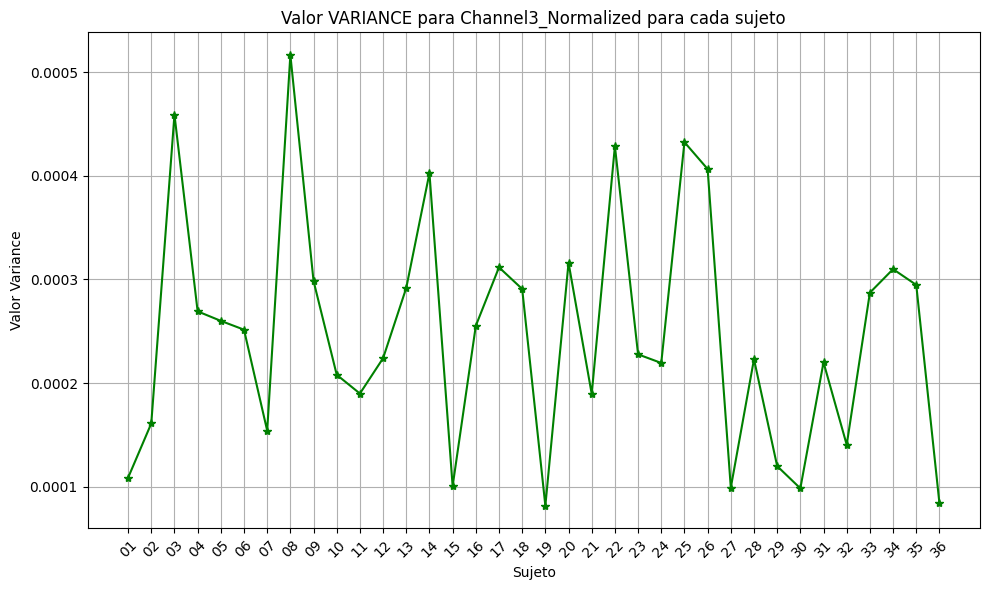

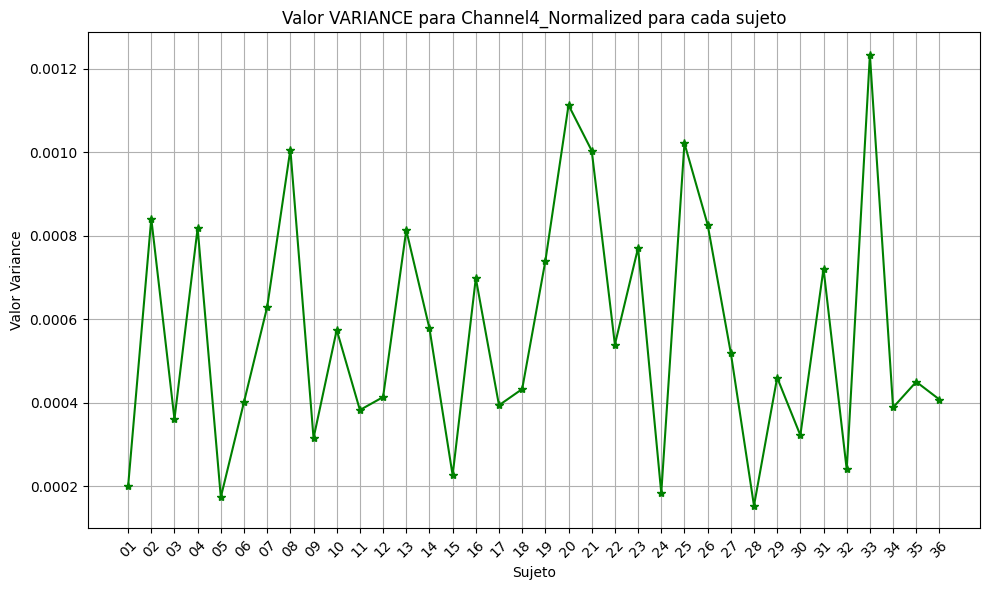

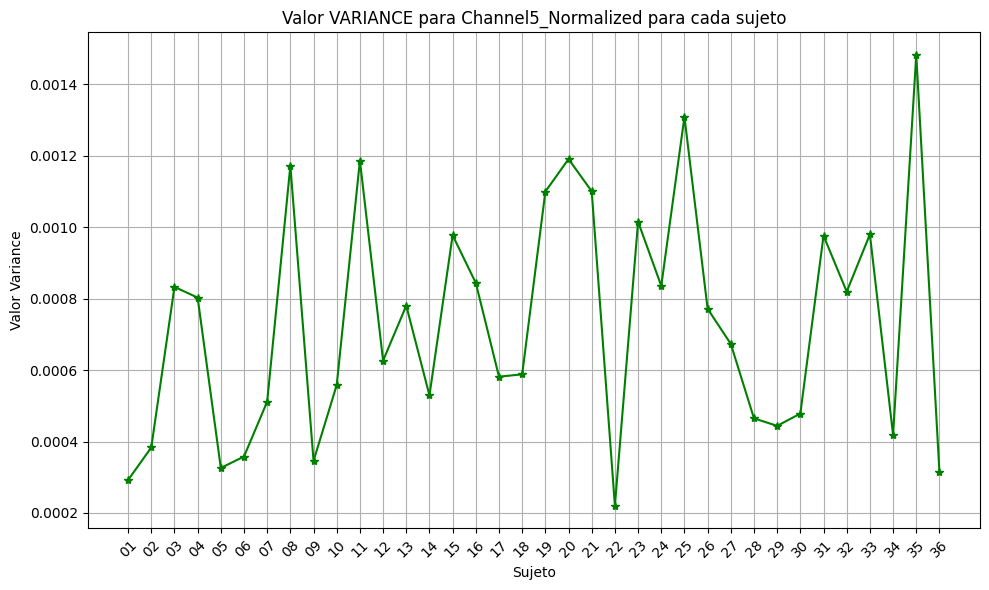

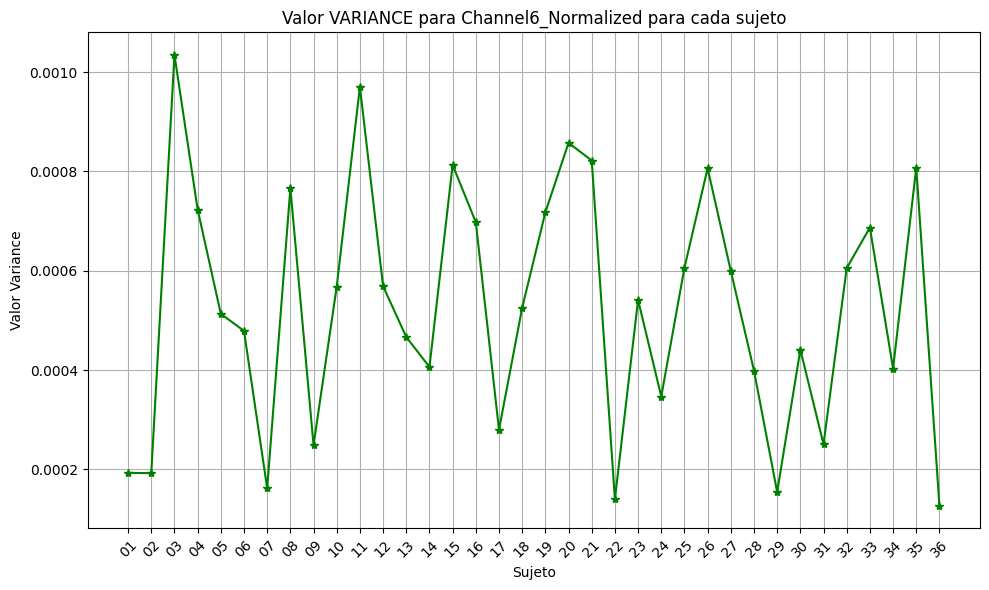

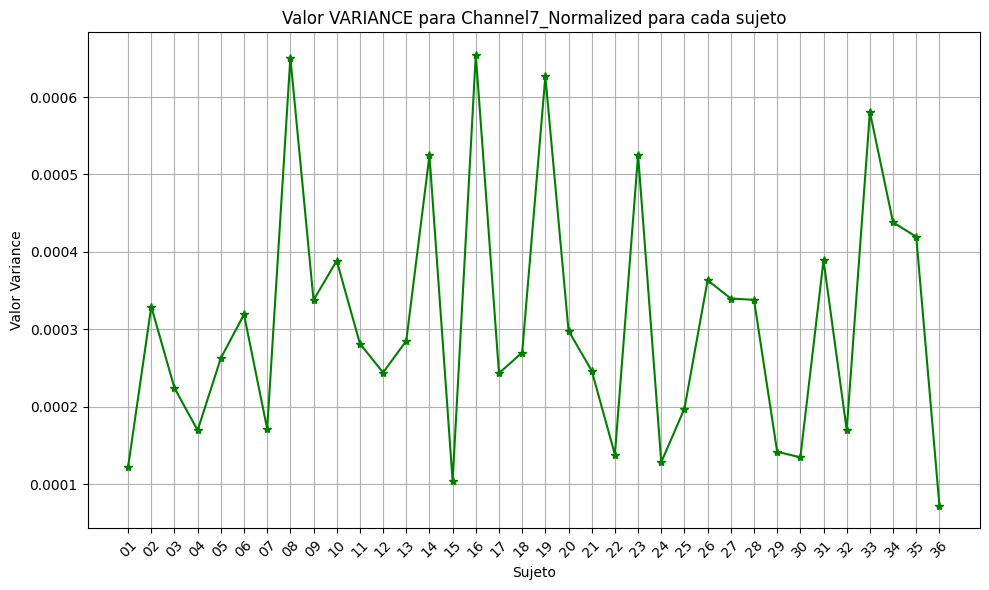

In [ ]:
#VARIANZA canal 1
valores_varianza = []


for folder_name, df_folder in dfs_by_folder.items():
    vrz_channel1 = df_folder[df_folder['Canal'] == 'Channel1_Normalized']['Variance'].values[0]
    valores_varianza.append(vrz_channel1)


folders = ['{:02d}'.format(i) for i in range(1, 37)]


plt.figure(figsize=(10, 6))

plt.plot(folders, valores_varianza, marker='*',color='green')
plt.title('Valor VARIANCE para Channel1_Normalized para cada sujeto')
plt.xlabel('Sujeto')
plt.ylabel('Valor Variance')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#VARIANZA canal 2
valores_varianza2 = []


for folder_name, df_folder in dfs_by_folder.items():
    vrz_channel2 = df_folder[df_folder['Canal'] == 'Channel2_Normalized']['Variance'].values[0]
    valores_varianza2.append(vrz_channel2)


folders = ['{:02d}'.format(i) for i in range(1, 37)]


plt.figure(figsize=(10, 6))

# Graficar los valores RMS para Channel1_Normalized en cada carpeta
plt.plot(folders, valores_varianza2, marker='*',color='green')
plt.title('Valor VARIANCE para Channel2_Normalized para cada sujeto')
plt.xlabel('Sujeto')
plt.ylabel('Valor Variance')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#VARIANZA canal 3
valores_varianza3 = []


for folder_name, df_folder in dfs_by_folder.items():
    vrz_channel3 = df_folder[df_folder['Canal'] == 'Channel3_Normalized']['Variance'].values[0]
    valores_varianza3.append(vrz_channel3)


folders = ['{:02d}'.format(i) for i in range(1, 37)]


plt.figure(figsize=(10, 6))

plt.plot(folders, valores_varianza3, marker='*',color='green')
plt.title('Valor VARIANCE para Channel3_Normalized para cada sujeto')
plt.xlabel('Sujeto')
plt.ylabel('Valor Variance')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#VARIANZA canal 4
valores_varianza4 = []


for folder_name, df_folder in dfs_by_folder.items():
    vrz_channel4 = df_folder[df_folder['Canal'] == 'Channel4_Normalized']['Variance'].values[0]
    valores_varianza4.append(vrz_channel4)


folders = ['{:02d}'.format(i) for i in range(1, 37)]


plt.figure(figsize=(10, 6))

plt.plot(folders, valores_varianza4, marker='*',color='green')
plt.title('Valor VARIANCE para Channel4_Normalized para cada sujeto')
plt.xlabel('Sujeto')
plt.ylabel('Valor Variance')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#VARIANZA canal 5
valores_varianza5 = []


for folder_name, df_folder in dfs_by_folder.items():
    vrz_channel5= df_folder[df_folder['Canal'] == 'Channel5_Normalized']['Variance'].values[0]
    valores_varianza5.append(vrz_channel5)


folders = ['{:02d}'.format(i) for i in range(1, 37)]


plt.figure(figsize=(10, 6))

# Graficar los valores RMS para Channel1_Normalized en cada carpeta
plt.plot(folders, valores_varianza5, marker='*',color='green')
plt.title('Valor VARIANCE para Channel5_Normalized para cada sujeto')
plt.xlabel('Sujeto')
plt.ylabel('Valor Variance')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#VARIANZA canal 6
valores_varianza6 = []


for folder_name, df_folder in dfs_by_folder.items():
    vrz_channel6 = df_folder[df_folder['Canal'] == 'Channel6_Normalized']['Variance'].values[0]
    valores_varianza6.append(vrz_channel6)


folders = ['{:02d}'.format(i) for i in range(1, 37)]


plt.figure(figsize=(10, 6))

plt.plot(folders, valores_varianza6, marker='*',color='green')
plt.title('Valor VARIANCE para Channel6_Normalized para cada sujeto')
plt.xlabel('Sujeto')
plt.ylabel('Valor Variance')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#VARIANZA canal 7
valores_varianza7 = []


for folder_name, df_folder in dfs_by_folder.items():
    vrz_channel7 = df_folder[df_folder['Canal'] == 'Channel7_Normalized']['Variance'].values[0]
    valores_varianza7.append(vrz_channel7)


folders = ['{:02d}'.format(i) for i in range(1, 37)]


plt.figure(figsize=(10, 6))


plt.plot(folders, valores_varianza7, marker='*',color='green')
plt.title('Valor VARIANCE para Channel7_Normalized para cada sujeto')
plt.xlabel('Sujeto')
plt.ylabel('Valor Variance')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



La varianza se calcula sumando los cuadrados de las desviaciones de cada valor respecto a la media, y luego dividiendo por el número total de observaciones. Es usada para caracterizar la dispersión de un conjunto de datos.

En esta gráfica se muestra los valores de varianza para un canal específico para cada canal de electromiografía en diferentes sujetos, es decir, en las gráficas podemos observar la variabilidad de los potenciales de acción de las fibras musculares en un área especifica del músculo, esta variabilidad entre canales puede representar diferencias en la distribución de la actividad muscular.

Al realizar los gestos de las manos, se puede tener una mayor o menor estabilidad muscular, es decir, como un músculo puede mantener o no un movimiento, en caso de más varianza, significa menor estabilidad muscular al realizar los gestos en una zona del músculo.

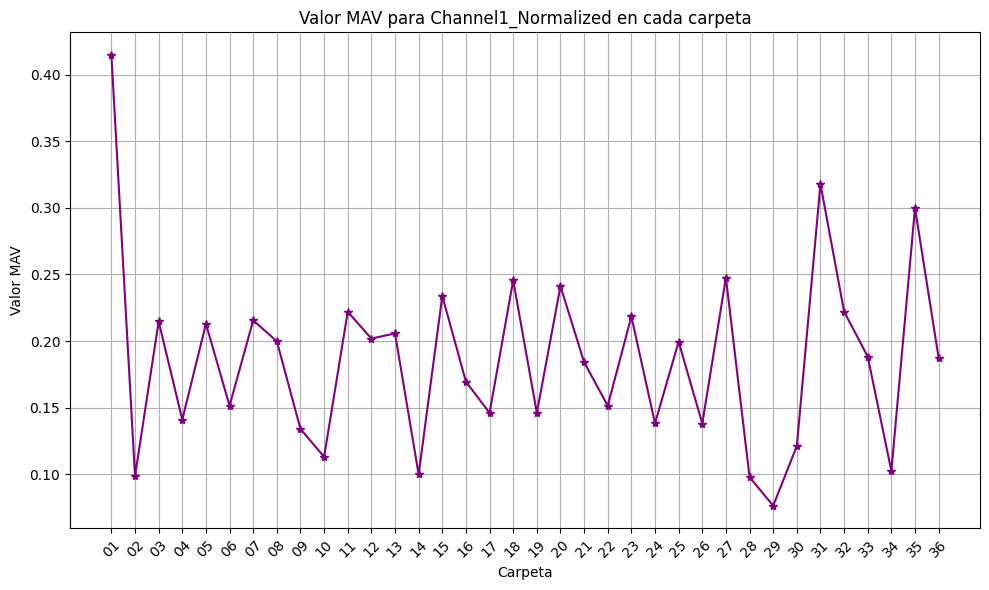

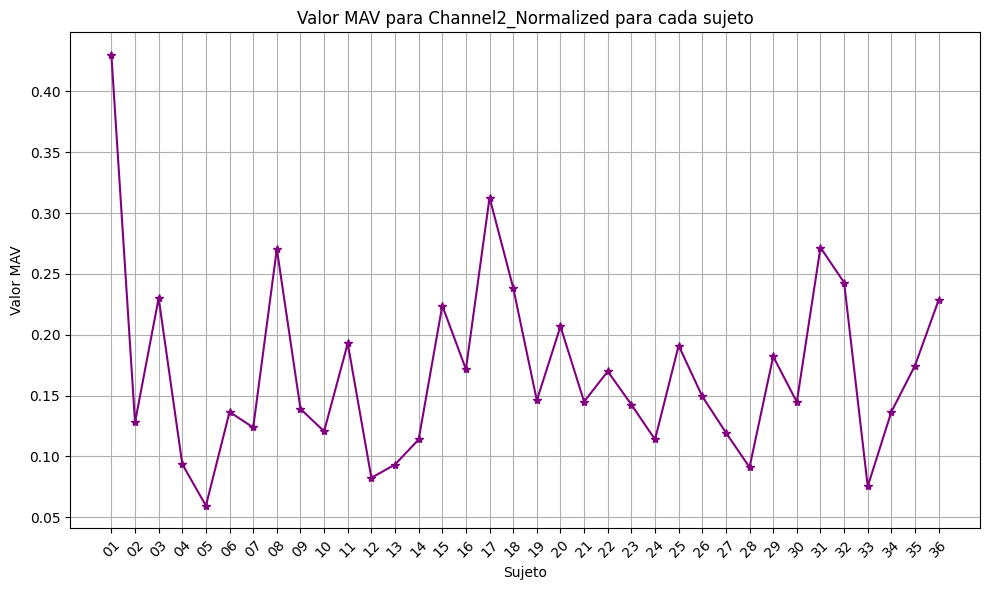

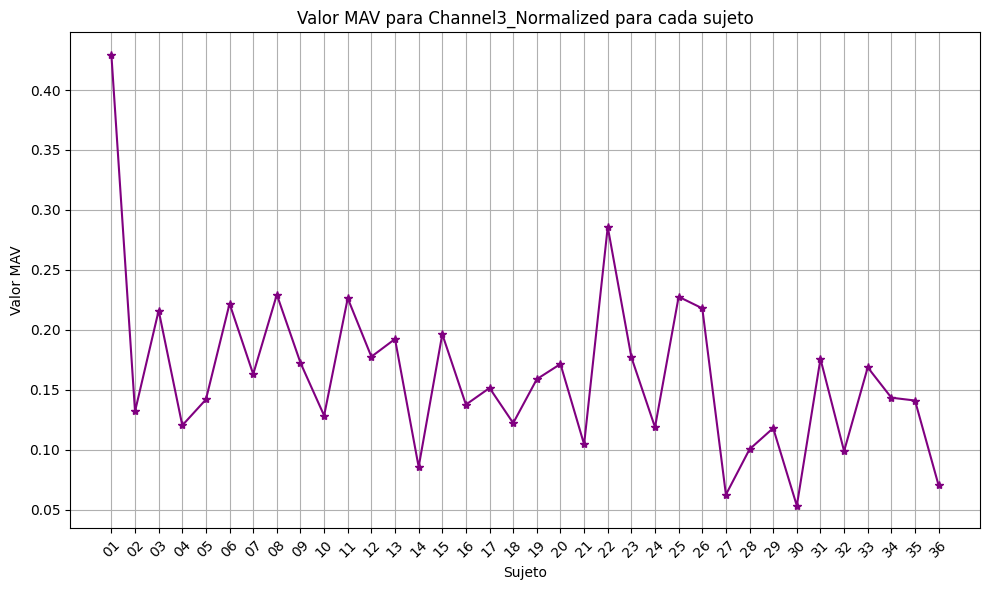

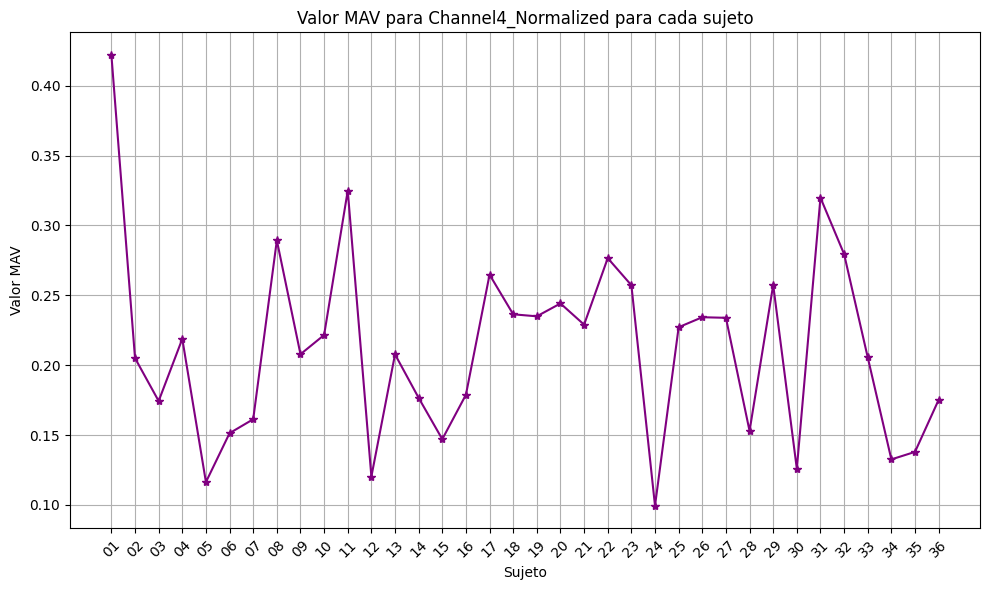

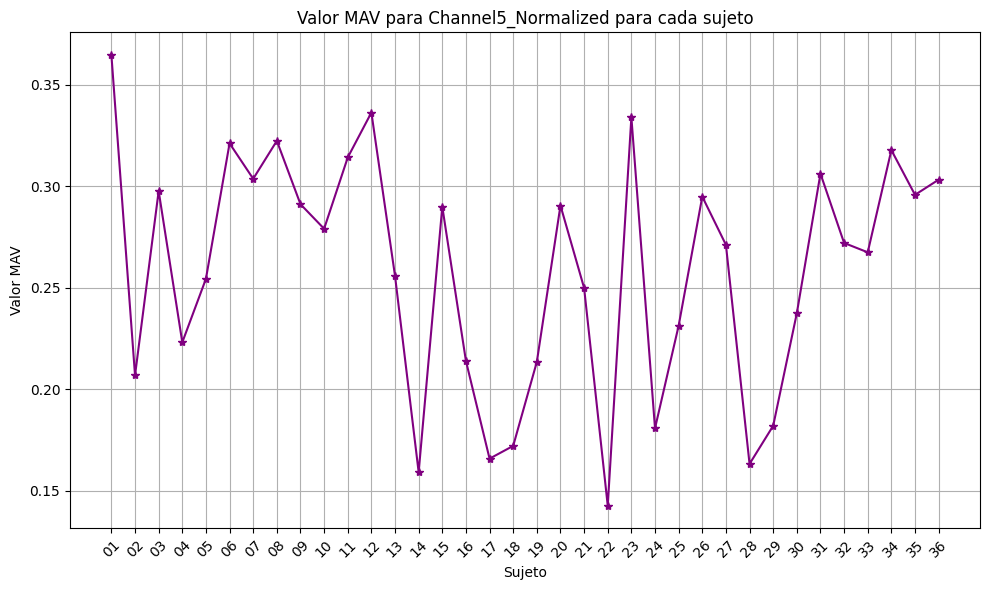

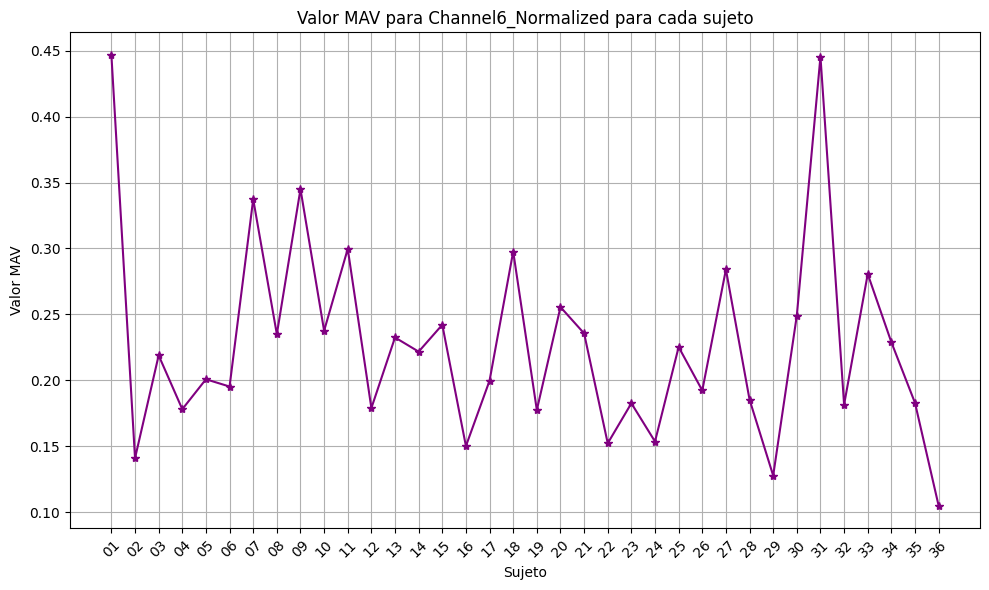

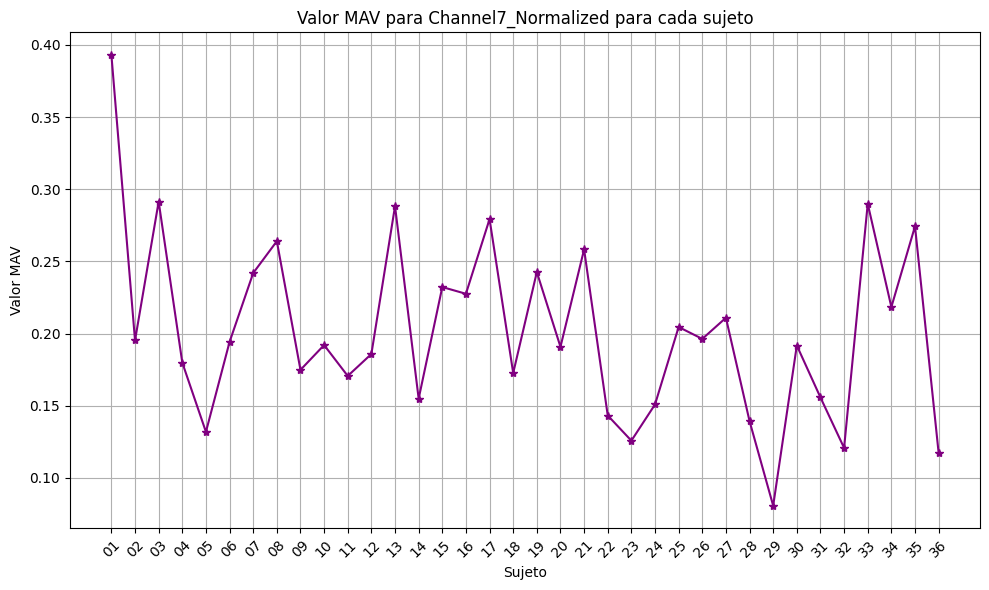

In [ ]:
#MAV canal 1
valores_mav = []

for folder_name, df_folder in dfs_by_folder.items():
    mav_channel1 = df_folder[df_folder['Canal'] == 'Channel1_Normalized']['MAV'].values[0]
    valores_mav.append(mav_channel1)

folders = ['{:02d}'.format(i) for i in range(1, 37)]

plt.figure(figsize=(10, 6))
plt.plot(folders, valores_mav, marker='*',color='purple')
plt.title('Valor MAV para Channel1_Normalized en cada carpeta')
plt.xlabel('Carpeta')
plt.ylabel('Valor MAV')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#MAV canal 2
valores_mav2 = []

for folder_name, df_folder in dfs_by_folder.items():
    mav_channel2 = df_folder[df_folder['Canal'] == 'Channel2_Normalized']['MAV'].values[0]
    valores_mav2.append(mav_channel2)

folders = ['{:02d}'.format(i) for i in range(1, 37)]

plt.figure(figsize=(10, 6))
plt.plot(folders, valores_mav2, marker='*',color='purple')
plt.title('Valor MAV para Channel2_Normalized para cada sujeto')
plt.xlabel('Sujeto')
plt.ylabel('Valor MAV')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#MAV canal 3
valores_mav3 = []

for folder_name, df_folder in dfs_by_folder.items():
    mav_channel3 = df_folder[df_folder['Canal'] == 'Channel3_Normalized']['MAV'].values[0]
    valores_mav3.append(mav_channel3)

folders = ['{:02d}'.format(i) for i in range(1, 37)]

plt.figure(figsize=(10, 6))
plt.plot(folders, valores_mav3, marker='*',color='purple')
plt.title('Valor MAV para Channel3_Normalized para cada sujeto')
plt.xlabel('Sujeto')
plt.ylabel('Valor MAV')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#MAV canal 4
valores_mav4 = []

for folder_name, df_folder in dfs_by_folder.items():
    mav_channel4 = df_folder[df_folder['Canal'] == 'Channel4_Normalized']['MAV'].values[0]
    valores_mav4.append(mav_channel4)

folders = ['{:02d}'.format(i) for i in range(1, 37)]

plt.figure(figsize=(10, 6))
plt.plot(folders, valores_mav4, marker='*',color='purple')
plt.title('Valor MAV para Channel4_Normalized para cada sujeto')
plt.xlabel('Sujeto')
plt.ylabel('Valor MAV')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#MAV canal 5
valores_mav5 = []

for folder_name, df_folder in dfs_by_folder.items():
    mav_channel5 = df_folder[df_folder['Canal'] == 'Channel5_Normalized']['MAV'].values[0]
    valores_mav5.append(mav_channel5)

folders = ['{:02d}'.format(i) for i in range(1, 37)]

plt.figure(figsize=(10, 6))
plt.plot(folders, valores_mav5, marker='*',color='purple')
plt.title('Valor MAV para Channel5_Normalized para cada sujeto')
plt.xlabel('Sujeto')
plt.ylabel('Valor MAV')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#MAV canal 6
valores_mav6 = []

for folder_name, df_folder in dfs_by_folder.items():
    mav_channel6 = df_folder[df_folder['Canal'] == 'Channel6_Normalized']['MAV'].values[0]
    valores_mav6.append(mav_channel6)

folders = ['{:02d}'.format(i) for i in range(1, 37)]

plt.figure(figsize=(10, 6))
plt.plot(folders, valores_mav6, marker='*',color='purple')
plt.title('Valor MAV para Channel6_Normalized para cada sujeto')
plt.xlabel('Sujeto')
plt.ylabel('Valor MAV')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#MAV canal 7
valores_mav7 = []

for folder_name, df_folder in dfs_by_folder.items():
    mav_channel7 = df_folder[df_folder['Canal'] == 'Channel7_Normalized']['MAV'].values[0]
    valores_mav7.append(mav_channel7)

folders = ['{:02d}'.format(i) for i in range(1, 37)]

plt.figure(figsize=(10, 6))
plt.plot(folders, valores_mav7, marker='*',color='purple')
plt.title('Valor MAV para Channel7_Normalized para cada sujeto')
plt.xlabel('Sujeto')
plt.ylabel('Valor MAV')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Esta gráfica muestra el Valor Medio Absoluto calculados para el canales en cada uno de los 36 sujetos, el MAV proporciona el valor promedio de las magnitudes de las muestras de la señal, sin tener en cuenta sus signos.

El MAV busca analizar evaluar la distribución de la actividad muscular en diferentes zonas del músculo, hace un promedio del análisis realizado por el RMS, por lo tanto se puede considerar que un pico en MAV representa un mayor actividad muscular en la zona muscular en la que se encuentra ese electrodo en especifico, esto representa una mayor activación de las fibras musculares en ese punto.

Por ejemplo en el canal 4, el sujeto 30 presenta el pico más alto de la gráfica, lo que significa que para los gestos que se realizaron la zona en la que se encuentra el canal 4, el sujeto 30 tuvo una mayor actividad muscular, esto puede deberse a las características musculares propias de ese sujeto en especifico.

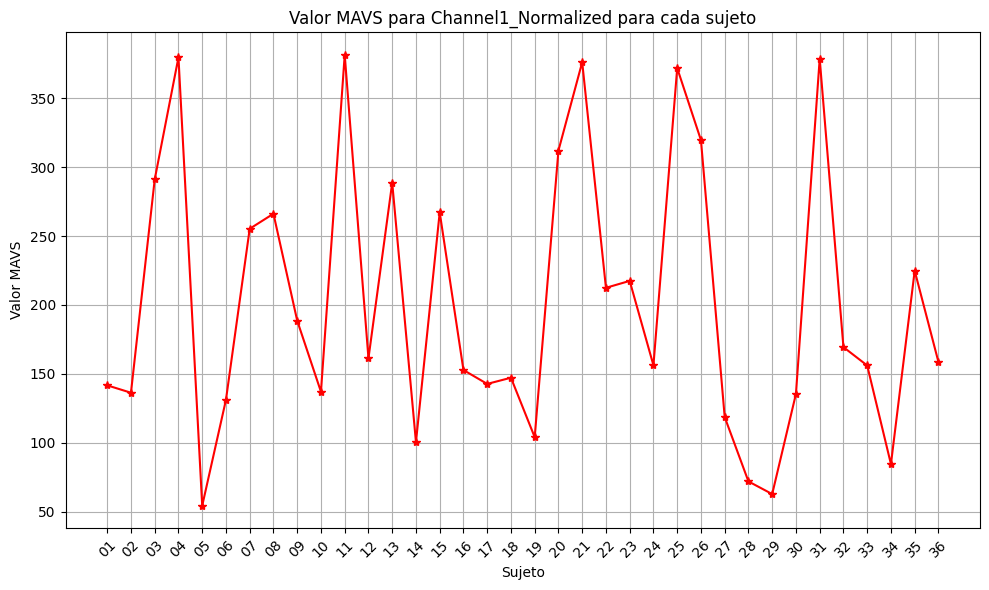

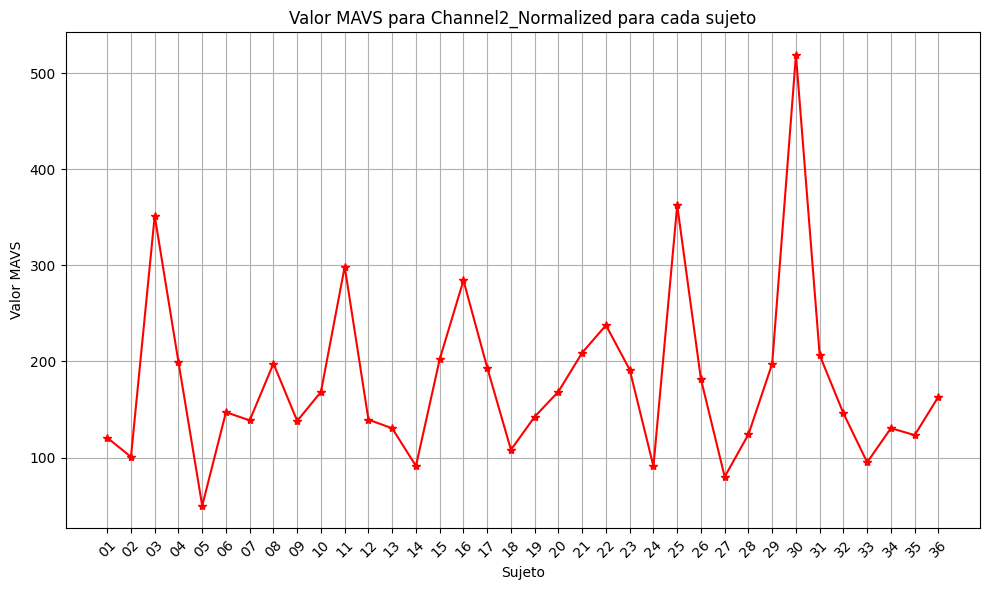

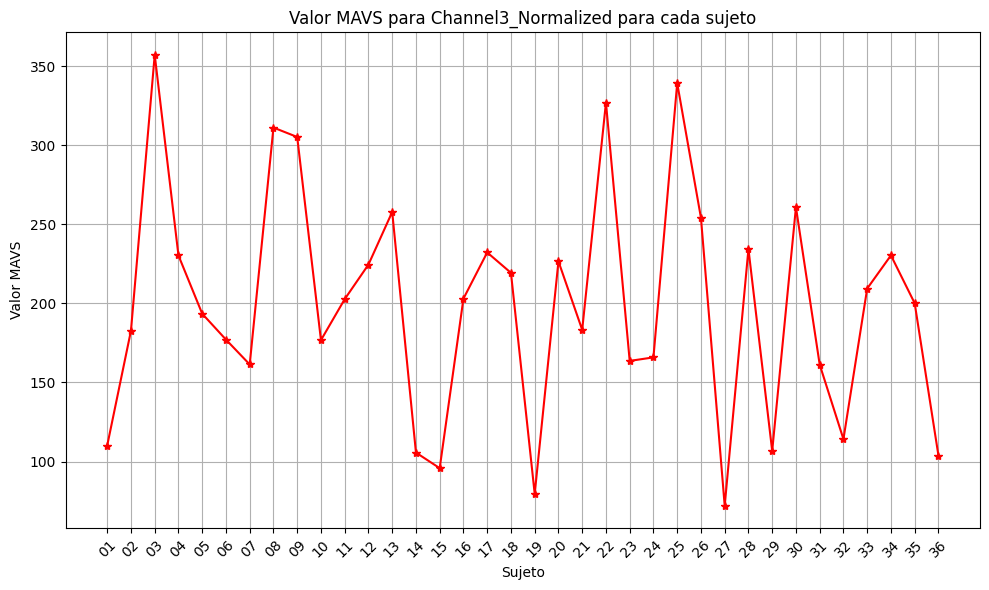

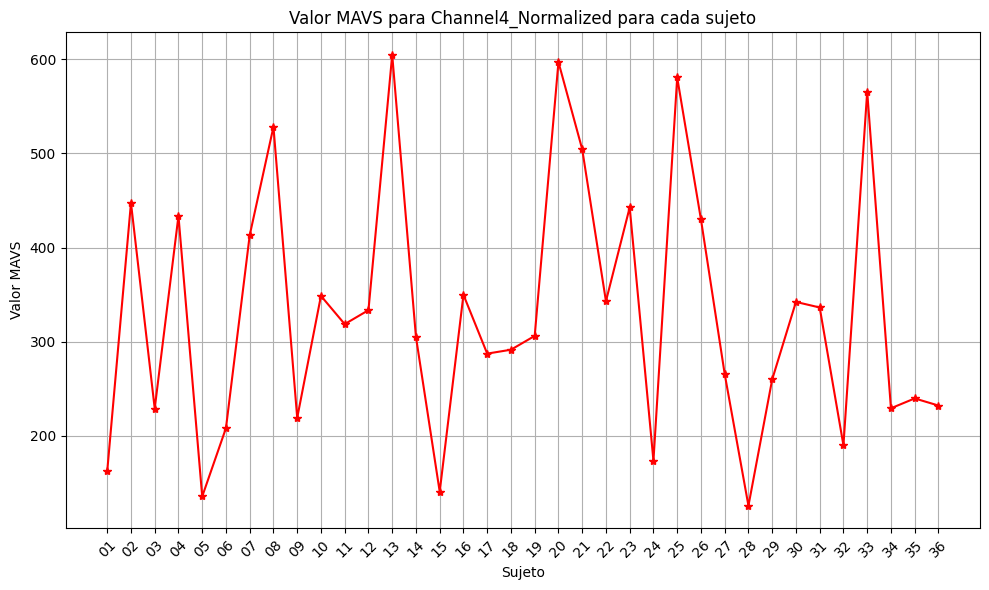

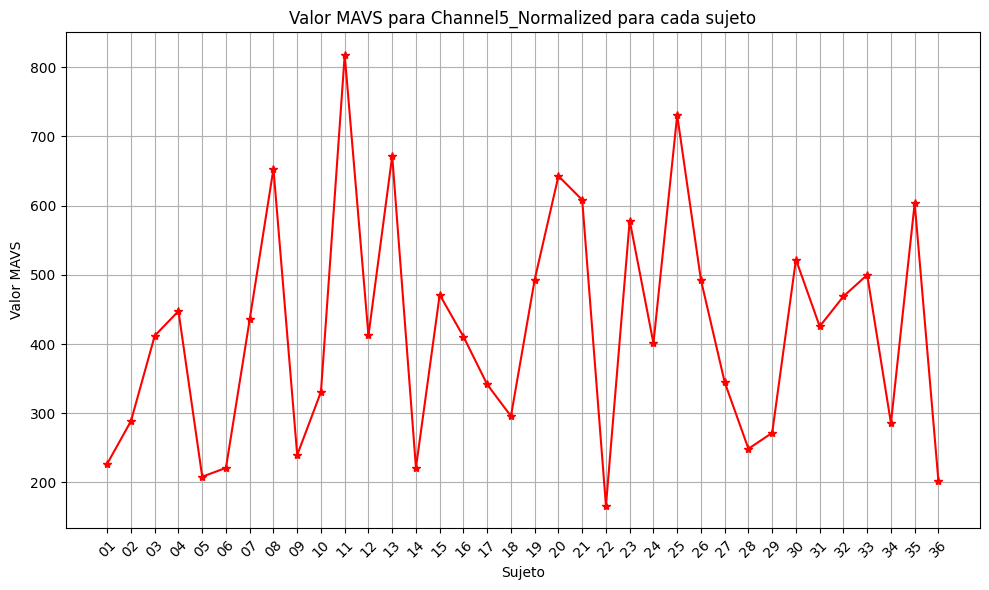

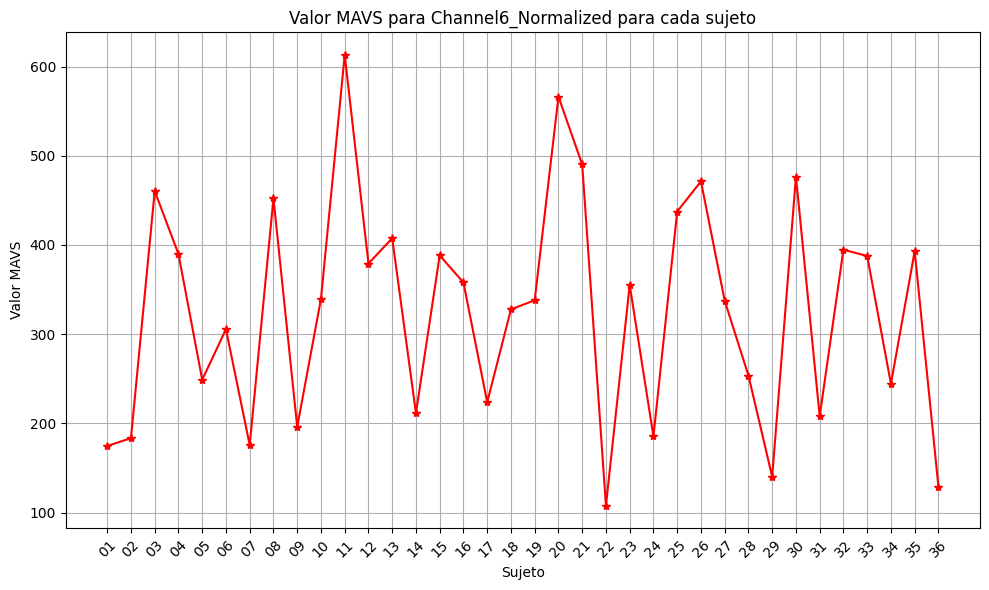

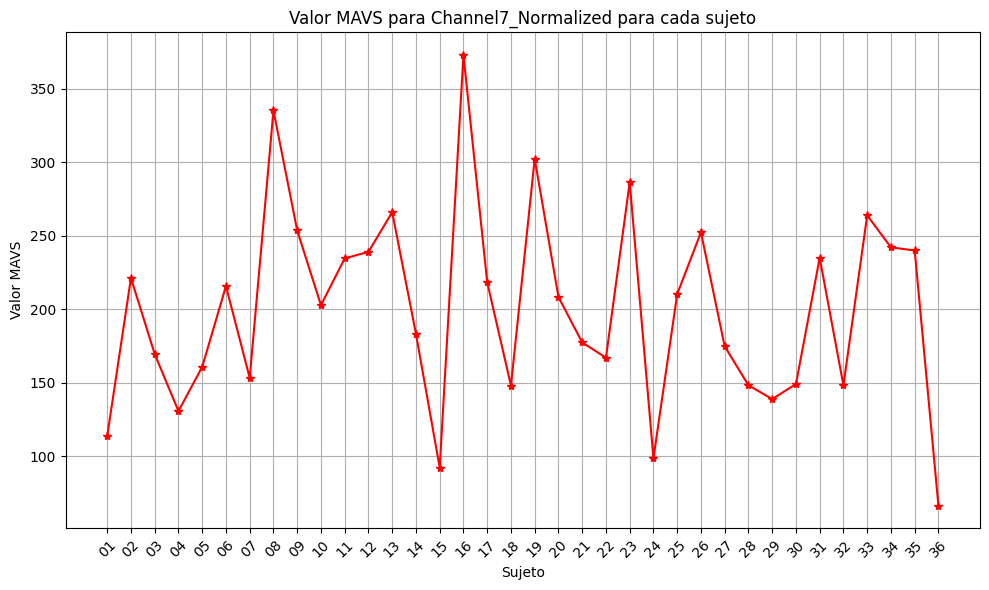

In [ ]:
#MAVS canal 1
valores_mavs = []

for folder_name, df_folder in dfs_by_folder.items():

    mavs_channel1 = df_folder[df_folder['Canal'] == 'Channel1_Normalized']['MAVS'].values[0]

    valores_mavs.append(mavs_channel1)

folders = ['{:02d}'.format(i) for i in range(1, 37)]

plt.figure(figsize=(10, 6))
plt.plot(folders, valores_mavs, marker='*',color='red')
plt.title('Valor MAVS para Channel1_Normalized para cada sujeto')
plt.xlabel('Sujeto')
plt.ylabel('Valor MAVS')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#MAVS canal 2
valores_mavs2 = []

for folder_name, df_folder in dfs_by_folder.items():

    mavs_channel2 = df_folder[df_folder['Canal'] == 'Channel2_Normalized']['MAVS'].values[0]

    valores_mavs2.append(mavs_channel2)

folders = ['{:02d}'.format(i) for i in range(1, 37)]

plt.figure(figsize=(10, 6))
plt.plot(folders, valores_mavs2, marker='*',color='red')
plt.title('Valor MAVS para Channel2_Normalized para cada sujeto')
plt.xlabel('Sujeto')
plt.ylabel('Valor MAVS')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#MAVS canal 3
valores_mavs3 = []

for folder_name, df_folder in dfs_by_folder.items():

    mavs_channel3 = df_folder[df_folder['Canal'] == 'Channel3_Normalized']['MAVS'].values[0]

    valores_mavs3.append(mavs_channel3)

folders = ['{:02d}'.format(i) for i in range(1, 37)]

plt.figure(figsize=(10, 6))
plt.plot(folders, valores_mavs3, marker='*',color='red')
plt.title('Valor MAVS para Channel3_Normalized para cada sujeto')
plt.xlabel('Sujeto')
plt.ylabel('Valor MAVS')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#MAVS canal 4
valores_mavs4 = []

for folder_name, df_folder in dfs_by_folder.items():

    mavs_channel4 = df_folder[df_folder['Canal'] == 'Channel4_Normalized']['MAVS'].values[0]

    valores_mavs4.append(mavs_channel4)

folders = ['{:02d}'.format(i) for i in range(1, 37)]

plt.figure(figsize=(10, 6))
plt.plot(folders, valores_mavs4, marker='*',color='red')
plt.title('Valor MAVS para Channel4_Normalized para cada sujeto')
plt.xlabel('Sujeto')
plt.ylabel('Valor MAVS')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#MAVS canal 5
valores_mavs5 = []

for folder_name, df_folder in dfs_by_folder.items():

    mavs_channel5 = df_folder[df_folder['Canal'] == 'Channel5_Normalized']['MAVS'].values[0]

    valores_mavs5.append(mavs_channel5)

folders = ['{:02d}'.format(i) for i in range(1, 37)]

plt.figure(figsize=(10, 6))
plt.plot(folders, valores_mavs5, marker='*',color='red')
plt.title('Valor MAVS para Channel5_Normalized para cada sujeto')
plt.xlabel('Sujeto')
plt.ylabel('Valor MAVS')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#MAVS canal 6
valores_mavs6 = []

for folder_name, df_folder in dfs_by_folder.items():

    mavs_channel6 = df_folder[df_folder['Canal'] == 'Channel6_Normalized']['MAVS'].values[0]

    valores_mavs6.append(mavs_channel6)

folders = ['{:02d}'.format(i) for i in range(1, 37)]

plt.figure(figsize=(10, 6))
plt.plot(folders, valores_mavs6, marker='*',color='red')
plt.title('Valor MAVS para Channel6_Normalized para cada sujeto')
plt.xlabel('Sujeto')
plt.ylabel('Valor MAVS')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#MAVS canal 7
valores_mavs7 = []

for folder_name, df_folder in dfs_by_folder.items():

    mavs_channel7 = df_folder[df_folder['Canal'] == 'Channel7_Normalized']['MAVS'].values[0]

    valores_mavs7.append(mavs_channel7)

folders = ['{:02d}'.format(i) for i in range(1, 37)]

plt.figure(figsize=(10, 6))
plt.plot(folders, valores_mavs7, marker='*',color='red')
plt.title('Valor MAVS para Channel7_Normalized para cada sujeto')
plt.xlabel('Sujeto')
plt.ylabel('Valor MAVS')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

En este análisis, se examina el Valor Medio Absoluto Slope para cada canal de electromiografía en diferentes sujetos.

En la gráfica se puede observar información sobre la velocidad de cambio del promedio de las magnitudes de las muestras de la señal electromiográfica en una región muscular especifica, en aquellos sujetos donde se observa un pico más alto en el MAVS, es una variación más rápida de la señal, como por ejemplo en el canal 7, el sujeto 16, tiene un pico alto de MAVS esto se da posiblemente por movimientos bruscos, alguna contracción muscular rápida o cambios bruscos en la dirección del movimiento de los gestos en ese punto exacto del músculo donde se encuentra el electrodo.

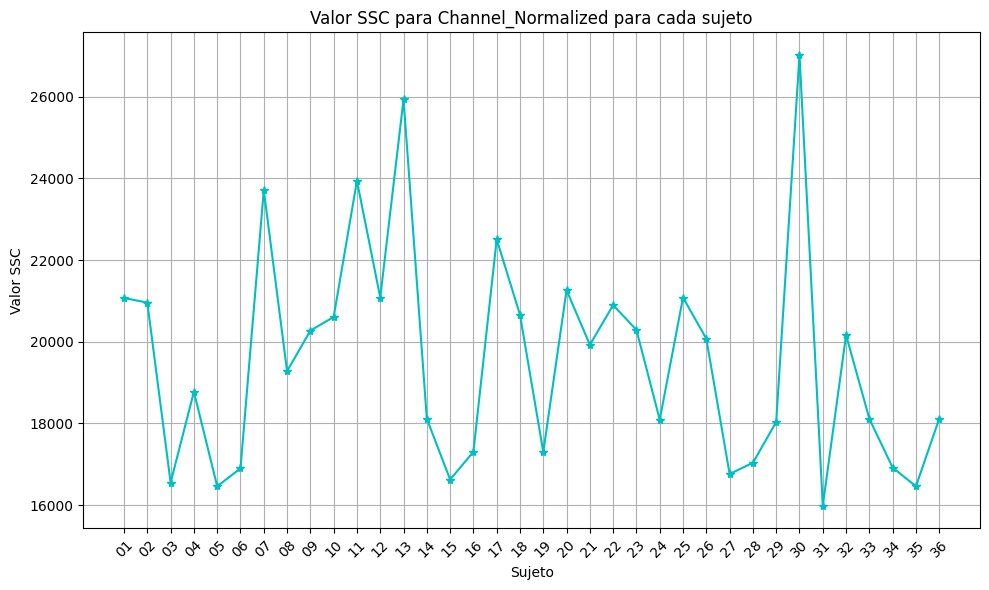

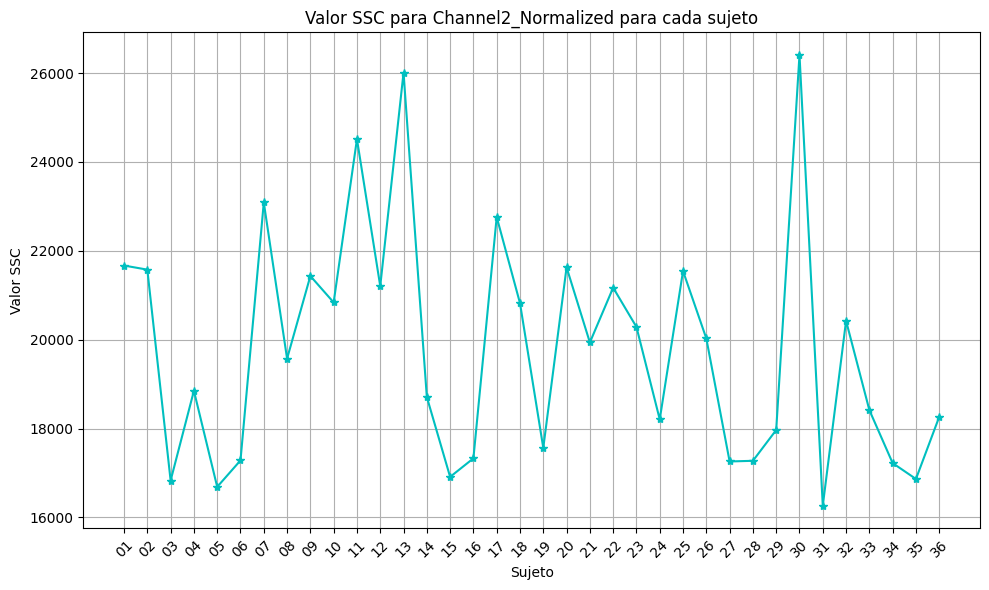

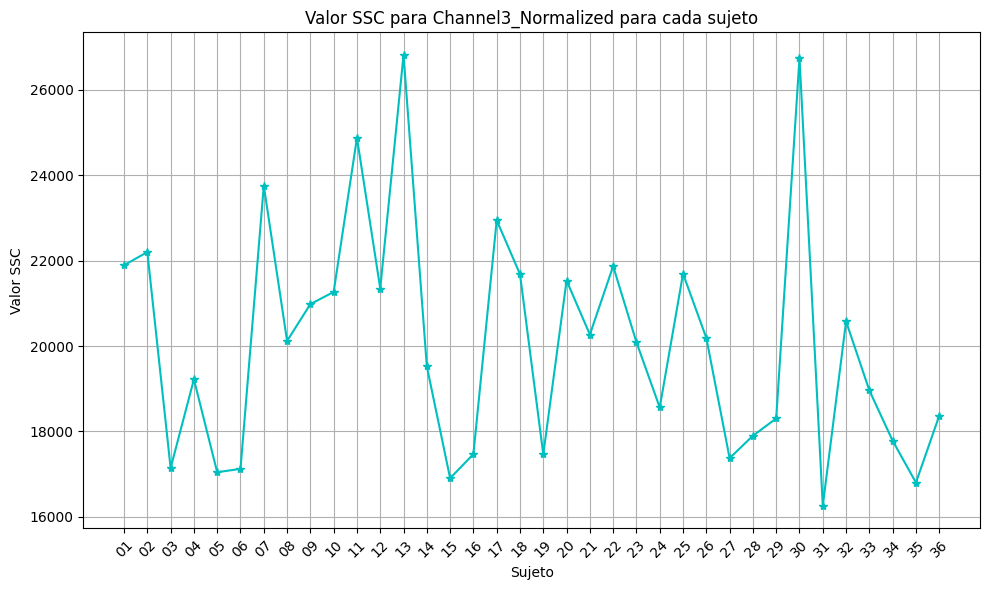

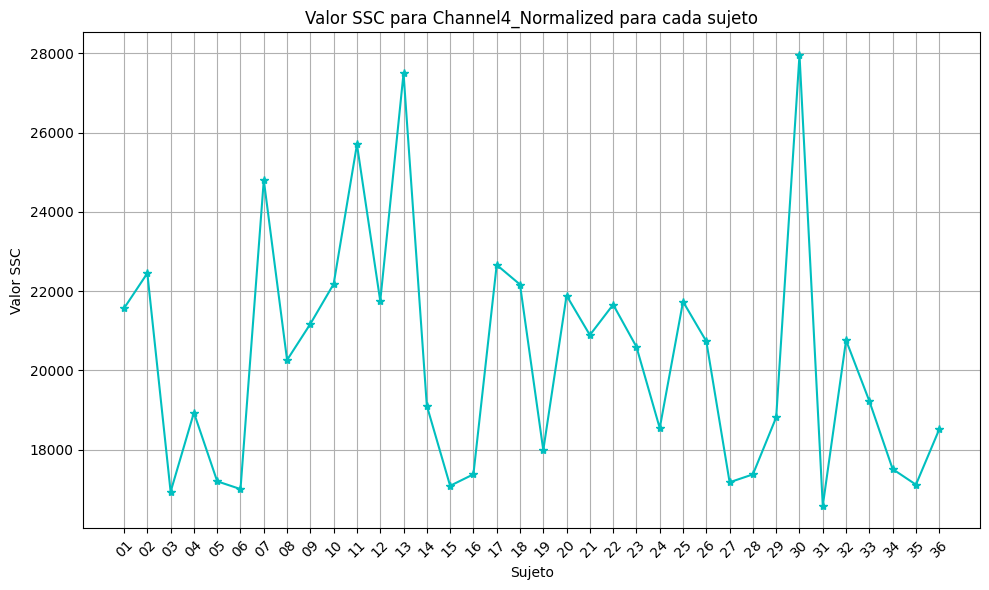

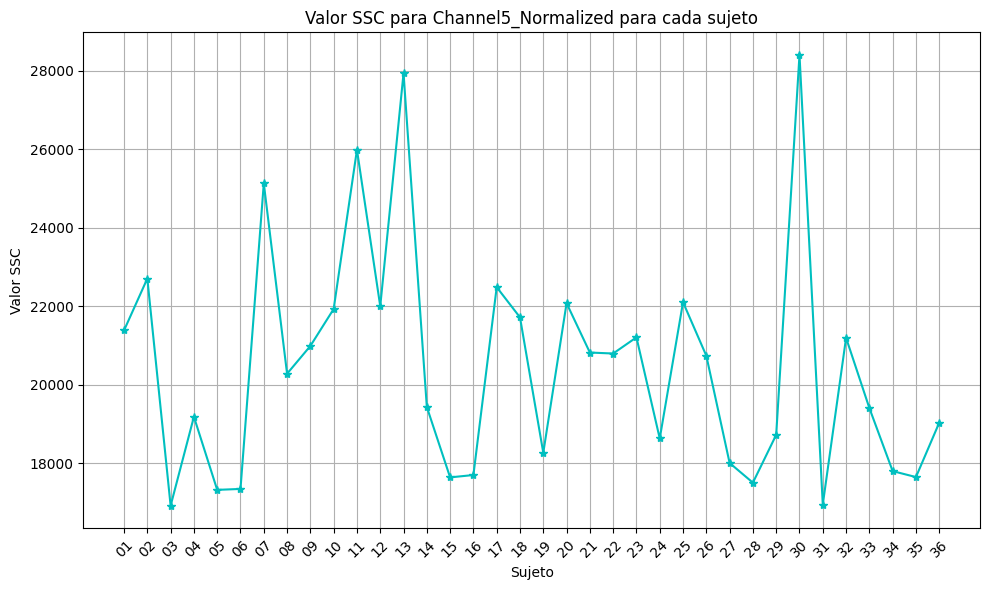

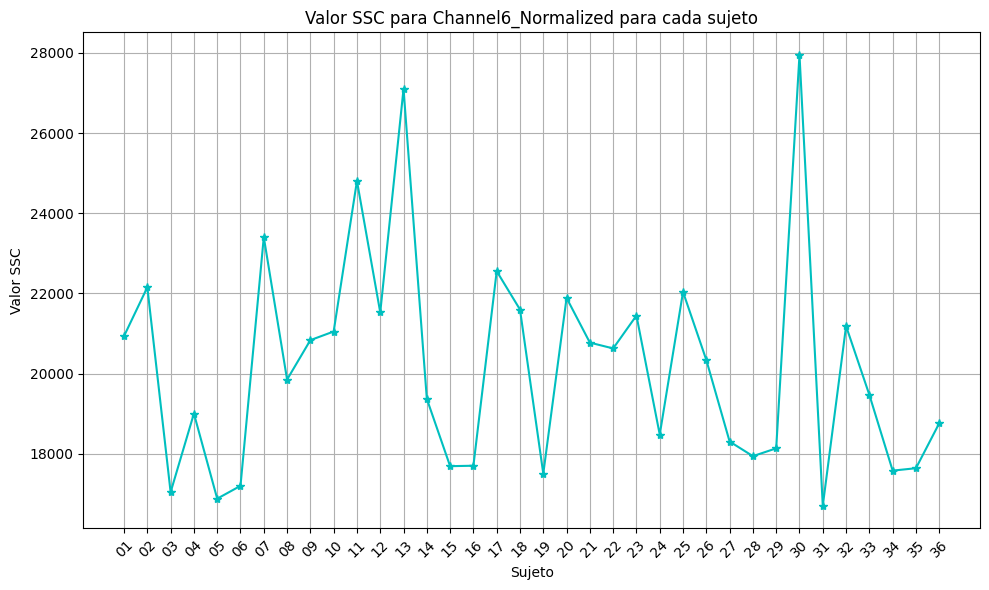

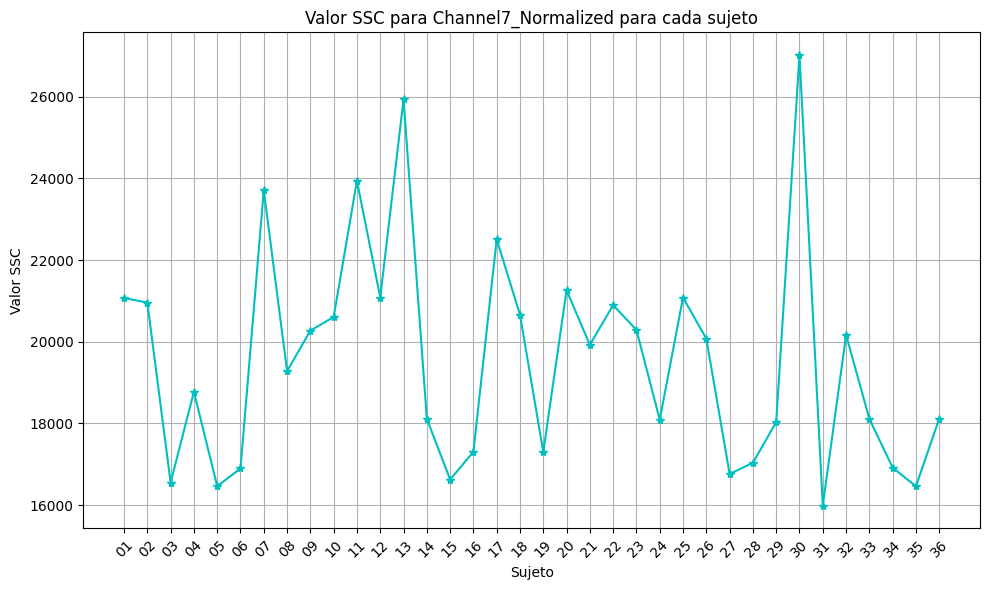

In [ ]:
# SSC canal 1
valores_ssc = []
for folder_name, df_folder in dfs_by_folder.items():
    ssc_channel1 = df_folder[df_folder['Canal'] == 'Channel1_Normalized']['SSC'].values[0]

    valores_ssc.append(ssc_channel1)


folders = ['{:02d}'.format(i) for i in range(1, 37)]

plt.figure(figsize=(10, 6))

plt.plot(folders, valores_ssc, marker='*',color='c')
plt.title('Valor SSC para Channel_Normalized para cada sujeto')
plt.xlabel('Sujeto')
plt.ylabel('Valor SSC')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# SSC canal 2
valores_ssc2 = []
for folder_name, df_folder in dfs_by_folder.items():
    ssc_channel2 = df_folder[df_folder['Canal'] == 'Channel2_Normalized']['SSC'].values[0]

    valores_ssc2.append(ssc_channel2)


folders = ['{:02d}'.format(i) for i in range(1, 37)]

plt.figure(figsize=(10, 6))

plt.plot(folders, valores_ssc2, marker='*',color='c')
plt.title('Valor SSC para Channel2_Normalized para cada sujeto')
plt.xlabel('Sujeto')
plt.ylabel('Valor SSC')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# SSC canal 3
valores_ssc3 = []

for folder_name, df_folder in dfs_by_folder.items():

    ssc_channel3 = df_folder[df_folder['Canal'] == 'Channel3_Normalized']['SSC'].values[0]

    valores_ssc3.append(ssc_channel3)


folders = ['{:02d}'.format(i) for i in range(1, 37)]

plt.figure(figsize=(10, 6))

plt.plot(folders, valores_ssc3, marker='*', color='c')
plt.title('Valor SSC para Channel3_Normalized para cada sujeto')
plt.xlabel('Sujeto')
plt.ylabel('Valor SSC')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# SSC canal 4
valores_ssc4 = []

for folder_name, df_folder in dfs_by_folder.items():

    ssc_channel4 = df_folder[df_folder['Canal'] == 'Channel4_Normalized']['SSC'].values[0]

    valores_ssc4.append(ssc_channel4)


folders = ['{:02d}'.format(i) for i in range(1, 37)]

plt.figure(figsize=(10, 6))

plt.plot(folders, valores_ssc4, marker='*',color='c')
plt.title('Valor SSC para Channel4_Normalized para cada sujeto')
plt.xlabel('Sujeto')
plt.ylabel('Valor SSC')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# SSC canal 5
valores_ssc5 = []

for folder_name, df_folder in dfs_by_folder.items():

    ssc_channel5 = df_folder[df_folder['Canal'] == 'Channel5_Normalized']['SSC'].values[0]

    valores_ssc5.append(ssc_channel5)


folders = ['{:02d}'.format(i) for i in range(1, 37)]

plt.figure(figsize=(10, 6))

plt.plot(folders, valores_ssc5, marker='*',color='c')
plt.title('Valor SSC para Channel5_Normalized para cada sujeto')
plt.xlabel('Sujeto')
plt.ylabel('Valor SSC')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# SSC canal 6
valores_ssc6 = []

for folder_name, df_folder in dfs_by_folder.items():

    ssc_channel6 = df_folder[df_folder['Canal'] == 'Channel6_Normalized']['SSC'].values[0]

    valores_ssc6.append(ssc_channel6)


folders = ['{:02d}'.format(i) for i in range(1, 37)]

plt.figure(figsize=(10, 6))

plt.plot(folders, valores_ssc6, marker='*',color='c')
plt.title('Valor SSC para Channel6_Normalized para cada sujeto')
plt.xlabel('Sujeto')
plt.ylabel('Valor SSC')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# SSC canal 7
valores_ssc7 = []

for folder_name, df_folder in dfs_by_folder.items():

    ssc_channel7 = df_folder[df_folder['Canal'] == 'Channel7_Normalized']['SSC'].values[0]

    valores_ssc7.append(ssc_channel7)


folders = ['{:02d}'.format(i) for i in range(1, 37)]

plt.figure(figsize=(10, 6))

plt.plot(folders, valores_ssc, marker='*',color='c')
plt.title('Valor SSC para Channel7_Normalized para cada sujeto')
plt.xlabel('Sujeto')
plt.ylabel('Valor SSC')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

El SSC mide la cantidad de cambios en la pendiente de la señal, lo que proporciona información sobre la variabilidad y la complejidad de la señal electromiográfica en diferentes zonas musculares.

En la gráfica se puede observar la frecuencia de los cambios que hay en la dirección de la señal lo que indica la complejidad de la señal, los picos más altos puede inducar una mayor variabilidad en la actividad muscular, debido a los cambios de movimiento brucos o a un movimiento irregular, esto es importante porque nos permite observar como se comporta el músculo en el área especifica donde se puso el electrodo y ver el comportamiento de este al hacer los diferentes gestos propuestos en el protocolo impuesto, como se puede observar en el canal 6, el sujeto 34 que tiene el pico más alto de la gráfica.

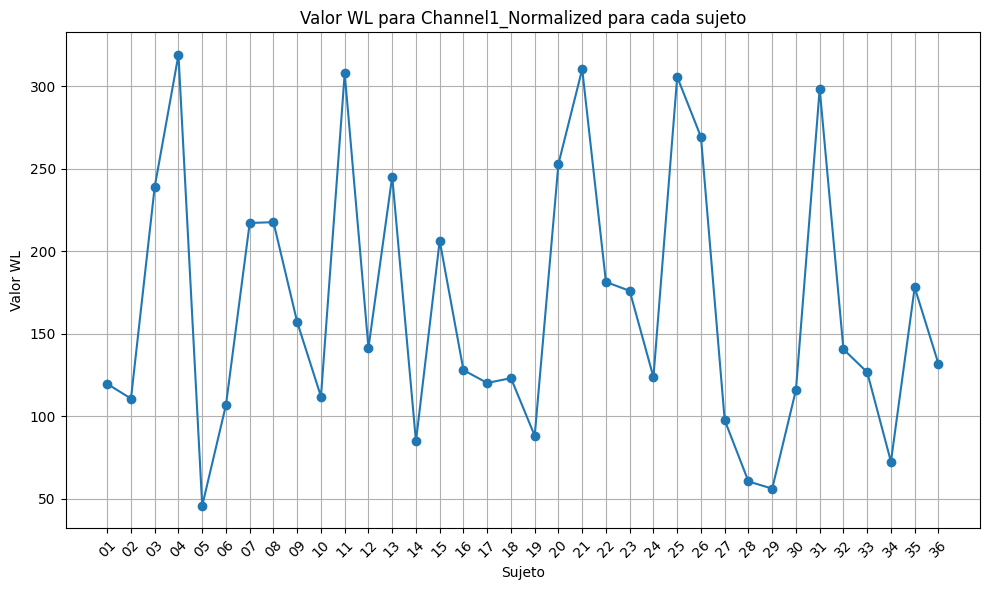

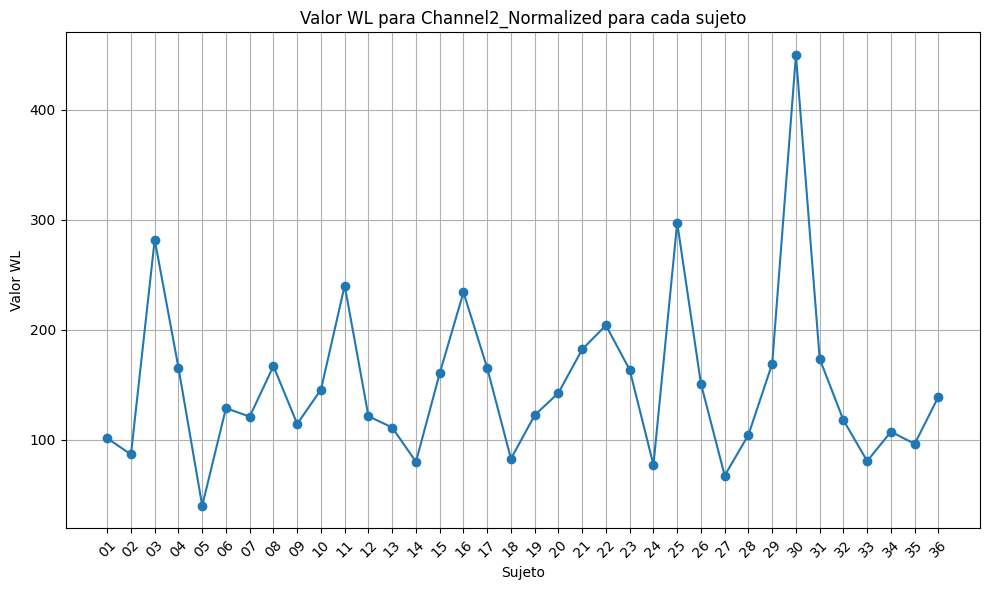

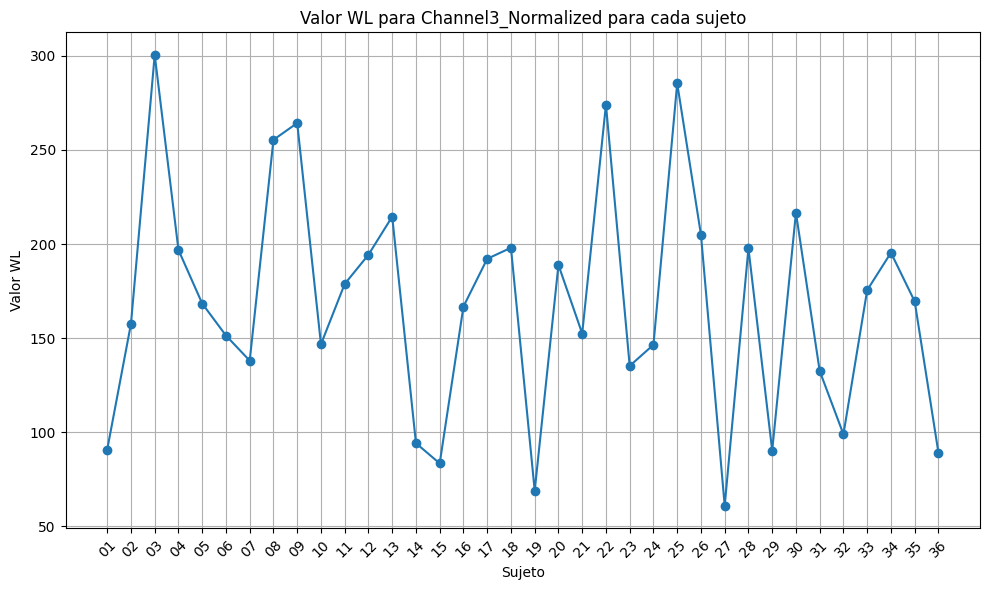

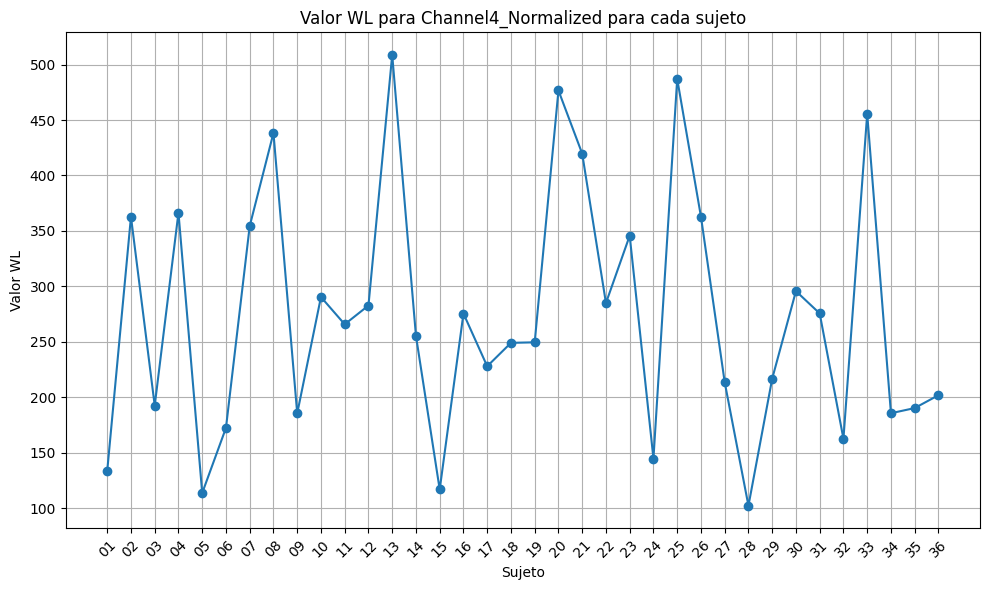

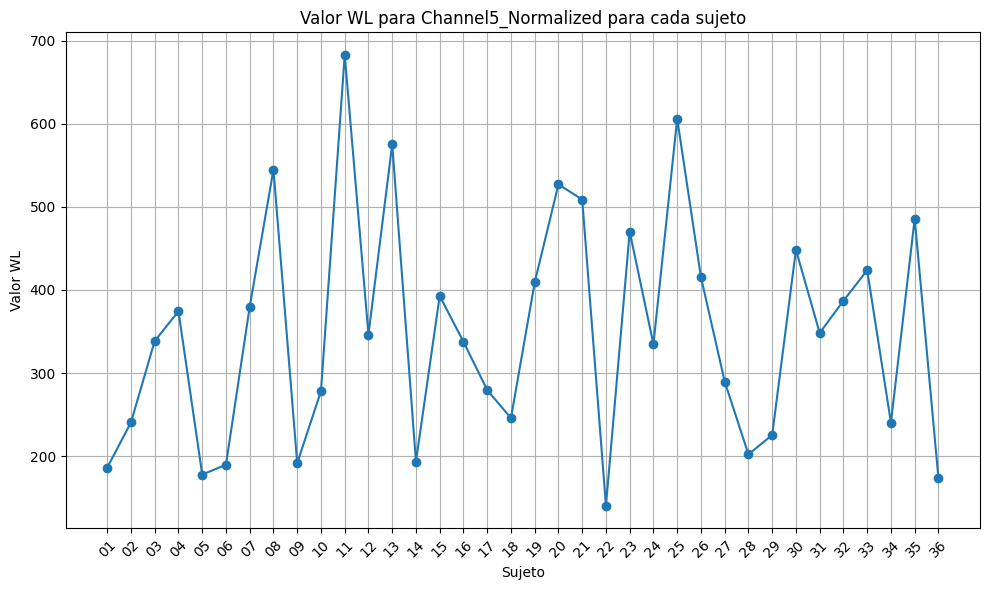

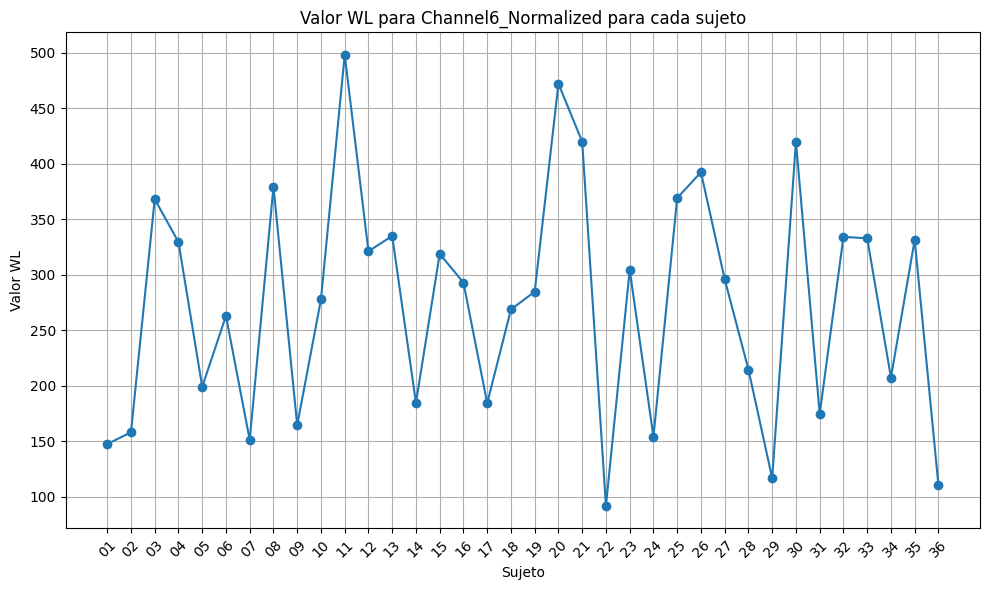

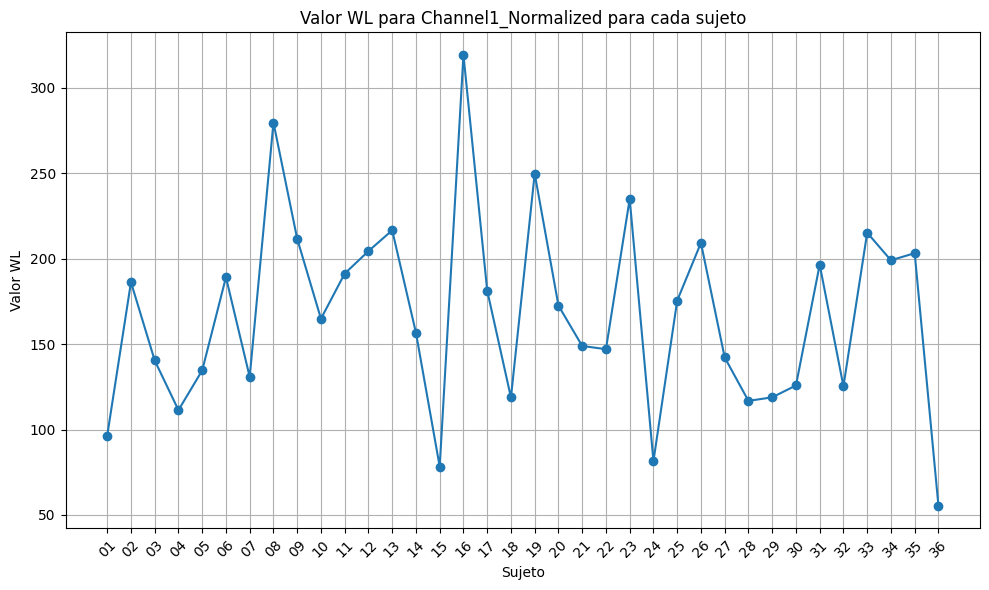

In [ ]:
# WL canal 1
valores_WL = []

for folder_name, df_folder in dfs_by_folder.items():
    wl_channel1 = df_folder[df_folder['Canal'] == 'Channel1_Normalized']['WL'].values[0]
    valores_WL.append(wl_channel1)

folders = ['{:02d}'.format(i) for i in range(1, 37)]

plt.figure(figsize=(10, 6))

plt.plot(folders, valores_WL, marker='o')
plt.title('Valor WL para Channel1_Normalized para cada sujeto')
plt.xlabel('Sujeto')
plt.ylabel('Valor WL')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# WL canal 2
valores_WL2 = []

for folder_name, df_folder in dfs_by_folder.items():
    wl_channel2 = df_folder[df_folder['Canal'] == 'Channel2_Normalized']['WL'].values[0]
    valores_WL2.append(wl_channel2)

folders = ['{:02d}'.format(i) for i in range(1, 37)]

plt.figure(figsize=(10, 6))

plt.plot(folders, valores_WL2, marker='o')
plt.title('Valor WL para Channel2_Normalized para cada sujeto')
plt.xlabel('Sujeto')
plt.ylabel('Valor WL')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# WL canal 3
valores_WL3 = []

for folder_name, df_folder in dfs_by_folder.items():
    wl_channel3 = df_folder[df_folder['Canal'] == 'Channel3_Normalized']['WL'].values[0]
    valores_WL3.append(wl_channel3)

folders = ['{:02d}'.format(i) for i in range(1, 37)]

plt.figure(figsize=(10, 6))

plt.plot(folders, valores_WL3, marker='o')
plt.title('Valor WL para Channel3_Normalized para cada sujeto')
plt.xlabel('Sujeto')
plt.ylabel('Valor WL')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# WL canal 4
valores_WL4 = []

for folder_name, df_folder in dfs_by_folder.items():
    wl_channel4 = df_folder[df_folder['Canal'] == 'Channel4_Normalized']['WL'].values[0]
    valores_WL4.append(wl_channel4)

folders = ['{:02d}'.format(i) for i in range(1, 37)]

plt.figure(figsize=(10, 6))

plt.plot(folders, valores_WL4, marker='o')
plt.title('Valor WL para Channel4_Normalized para cada sujeto')
plt.xlabel('Sujeto')
plt.ylabel('Valor WL')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# WL canal 5
valores_WL5 = []

for folder_name, df_folder in dfs_by_folder.items():
    wl_channel5 = df_folder[df_folder['Canal'] == 'Channel5_Normalized']['WL'].values[0]
    valores_WL5.append(wl_channel5)

folders = ['{:02d}'.format(i) for i in range(1, 37)]

plt.figure(figsize=(10, 6))

plt.plot(folders, valores_WL5, marker='o')
plt.title('Valor WL para Channel5_Normalized para cada sujeto')
plt.xlabel('Sujeto')
plt.ylabel('Valor WL')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# WL canal 6
valores_WL6 = []

for folder_name, df_folder in dfs_by_folder.items():
    wl_channel6 = df_folder[df_folder['Canal'] == 'Channel6_Normalized']['WL'].values[0]
    valores_WL6.append(wl_channel6)

folders = ['{:02d}'.format(i) for i in range(1, 37)]

plt.figure(figsize=(10, 6))

plt.plot(folders, valores_WL6, marker='o')
plt.title('Valor WL para Channel6_Normalized para cada sujeto')
plt.xlabel('Sujeto')
plt.ylabel('Valor WL')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# WL canal 7
valores_WL7 = []

for folder_name, df_folder in dfs_by_folder.items():
    wl_channel7 = df_folder[df_folder['Canal'] == 'Channel7_Normalized']['WL'].values[0]
    valores_WL7.append(wl_channel7)

folders = ['{:02d}'.format(i) for i in range(1, 37)]

plt.figure(figsize=(10, 6))

plt.plot(folders, valores_WL7, marker='o')
plt.title('Valor WL para Channel1_Normalized para cada sujeto')
plt.xlabel('Sujeto')
plt.ylabel('Valor WL')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

El WL habla de la duración total de la actividad muscular en el caso del EMG, se puede observar entonces que las gráficas que presentan puntos más bajos, son los sujetos que probablemente tuvieron menos duración en la realización de los gestos propuestos por el protocolo, por ejemplo en el canal 3, los sujetos 5, 19 y 27, son los más bajos de esa zona muscular que esta midiendo el electrodo. Por el contrario un pico en la grafica de WL, representa una contracción más prolongada en una zona especifica del musculo durante la realización de los gestos.

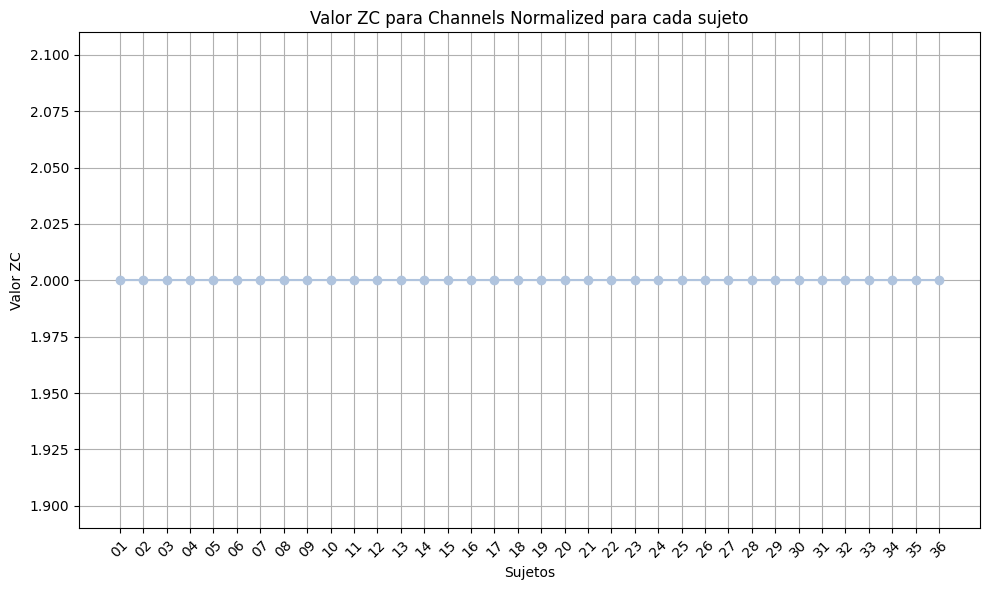

In [ ]:
#ZC todos
valores_ZC = []

for folder_name, df_folder in dfs_by_folder.items():

    zc_channel1 = df_folder[df_folder['Canal'] == 'Channel1_Normalized']['ZC'].values[0]
    valores_ZC.append(zc_channel1)

folders = ['{:02d}'.format(i) for i in range(1, 37)]
plt.figure(figsize=(10, 6))

plt.plot(folders, valores_ZC, marker='o',color='lightsteelblue')
plt.title('Valor ZC para Channels Normalized para cada sujeto')
plt.xlabel('Sujetos')
plt.ylabel('Valor ZC')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Para el caso del ZC se debe tener primero unas consideraciones.

ZC mide la cantidad de veces que la señal cruza el eje horizontal.
La señal ha sido normalizada, esto podría resultar en un valor de ZC cercano o igual 0.
Debido a esto, todas las gráficas de todos los canales presentan sus puntos para todos los sujetos en 2, por lo tanto se tiene en consideración solo una gráfica, ya que se comporta igual en todos los canales porque se normalizo.

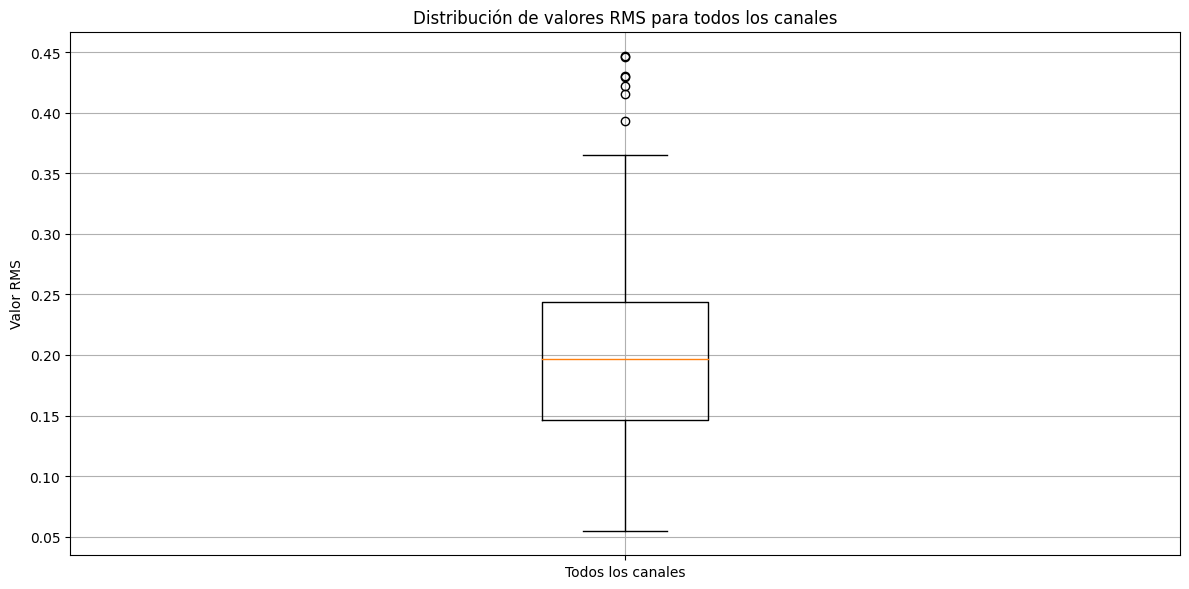

Media de los datos del canal 1 para los 36 sujetos:0.20369881468051287
Mediana de los datos del canal 1 para los 36 sujetos: 0.19659629226572164


In [ ]:
#diagrama de cajas y bigotes
fig, axes = plt.subplots(figsize=(12, 6))

all_rms_values = []

for folder_name, df_folder in dfs_by_folder.items():
    rms_values = df_folder['RMS'].values
    all_rms_values.extend(rms_values)

axes.boxplot(all_rms_values)
axes.set_title('Distribución de valores RMS para todos los canales')
axes.set_ylabel('Valor RMS')
axes.set_xticklabels(['Todos los canales'])
axes.grid(True)

plt.tight_layout()
plt.show()


channel_1_mav = np.mean(all_rms_values)
print(f"Media de los datos del canal 1 para los 36 sujetos:{channel_1_mav}")

channel_1_mean = np.median(all_rms_values)
print(f"Mediana de los datos del canal 1 para los 36 sujetos: {channel_1_mean}")

Se puede observar que la caja tiene un tamaño de aproximadamente 0.13, es decir su variabilidad no es muy alta, por lo tanto no hay una dispersión considerable, entonces tiene una variabilidad moderada, la línea dentro de la caja que representa la mediana, se encuentra en aproximandamente 0.17, en la posición media lo que indicando que es una distribución normal, además se puede observar que presenta un dato atípico representado por el circulo pequeño.

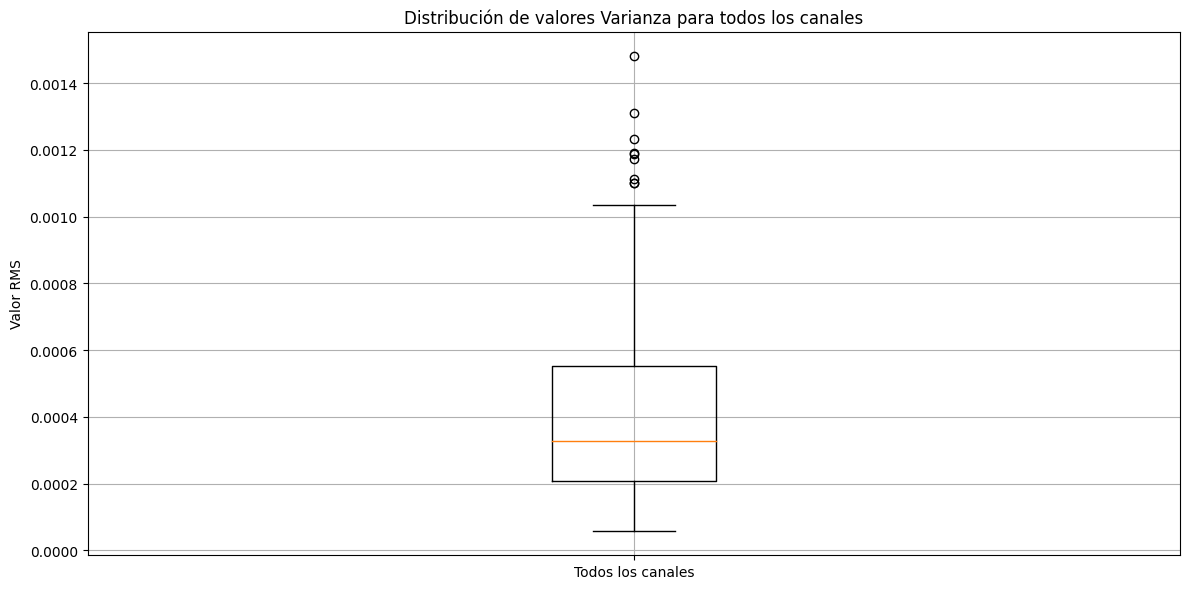

Media de los datos del canal 1 para los 36 sujetos:0.00040924033344652246
Mediana de los datos del canal 1 para los 36 sujetos: 0.0003276537194483208


In [ ]:
fig, axes = plt.subplots(figsize=(12, 6))

all_var_values = []


for folder_name, df_folder in dfs_by_folder.items():
    var_values = df_folder['Variance'].values
    all_var_values.extend(var_values)


axes.boxplot(all_var_values)
axes.set_title('Distribución de valores Varianza para todos los canales')
axes.set_ylabel('Valor Varianza')
axes.set_xticklabels(['Todos los canales'])
axes.grid(True)

plt.tight_layout()
plt.show()
channel_1_var_values = []


channel_1_mav = np.mean(all_var_values)
print(f"Media de los datos del canal 1 para los 36 sujetos:{channel_1_mav}")

channel_1_mean = np.median(all_var_values)
print(f"Mediana de los datos del canal 1 para los 36 sujetos: {channel_1_mean}")

Se puede observar que la caja tiene un tamaño relativamente pequeño, por lo cual consideramos que no tiene una varianza significativa, en el caso de la media, se encuentra más hacia abajo aproximadamente en 0.00024, indicando que la distribución esta sesgada hacia la derecha, además de tener datos atípicos hacia su parte derecha.

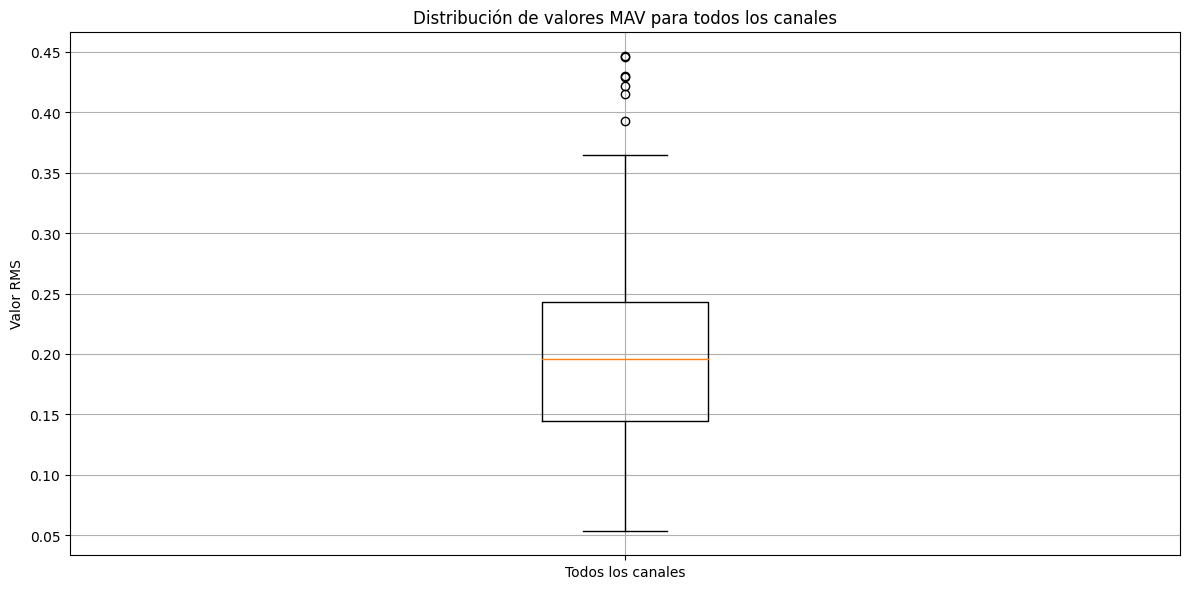

Media de los datos del canal 1 para los 36 sujetos:0.20267857510875922
Mediana de los datos del canal 1 para los 36 sujetos: 0.19580576038207426


In [ ]:
fig, axes = plt.subplots(figsize=(12, 6))

all_mav_values = []

for folder_name, df_folder in dfs_by_folder.items():
    mav_values = df_folder['MAV'].values
    all_mav_values.extend(mav_values)

axes.boxplot(all_mav_values)
axes.set_title('Distribución de valores MAV para todos los canales')
axes.set_ylabel('Valor MAV')
axes.set_xticklabels(['Todos los canales'])
axes.grid(True)

plt.tight_layout()
plt.show()


channel_1_mav = np.mean(all_mav_values)
print(f"Media de los datos del canal 1 para los 36 sujetos:{channel_1_mav}")

channel_1_mean = np.median(all_mav_values)
print(f"Mediana de los datos del canal 1 para los 36 sujetos: {channel_1_mean}")

El valor de MAV es un promedio del RMS, por lo tanto se puede observar que su diagrama de cajas y bigotes se comporta igual al RMS con una amplitud de caja no muy grande, es decir sus datos no tienen tanta disperción, un dato atípico hacia la derecha, y una distribución normal.

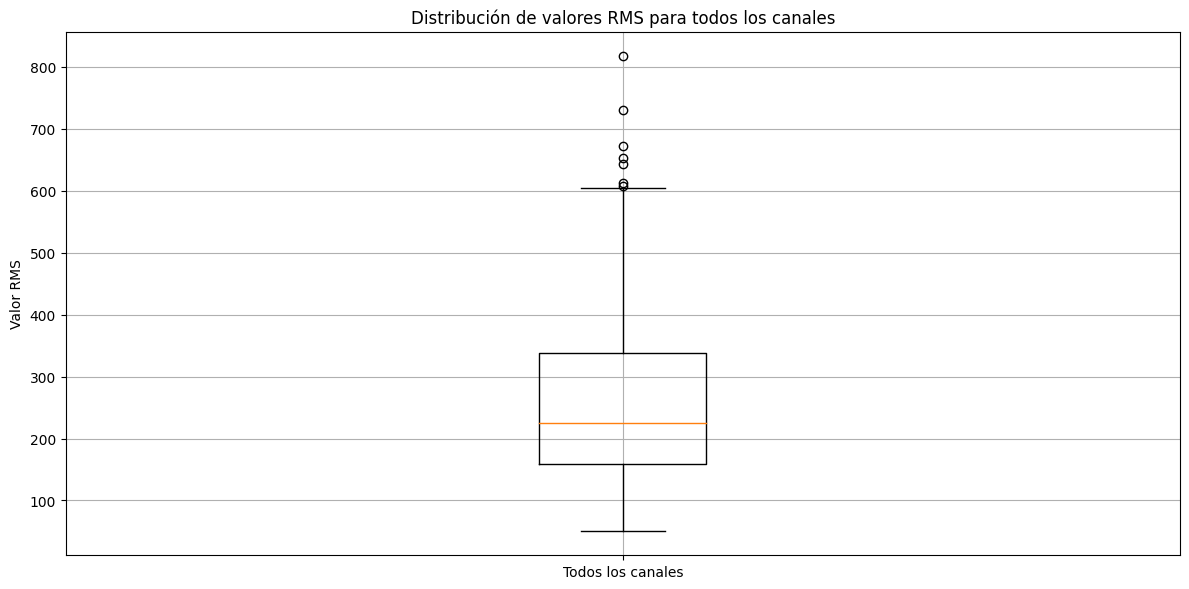

Media de los datos del canal 1 para los 36 sujetos:259.4090084305217
Mediana de los datos del canal 1 para los 36 sujetos: 224.70627503121176


In [ ]:
fig, axes = plt.subplots(figsize=(12, 6))

all_mavs_values = []

for folder_name, df_folder in dfs_by_folder.items():
    mavs_values = df_folder['MAVS'].values
    all_mavs_values.extend(mavs_values)

axes.boxplot(all_mavs_values)
axes.set_title('Distribución de valores MAVS para todos los canales')
axes.set_ylabel('Valor MAVS')
axes.set_xticklabels(['Todos los canales'])
axes.grid(True)

plt.tight_layout()
plt.show()


channel_1_mav = np.mean(all_mavs_values)
print(f"Media de los datos del canal 1 para los 36 sujetos:{channel_1_mav}")

channel_1_mean = np.median(all_mavs_values)
print(f"Mediana de los datos del canal 1 para los 36 sujetos: {channel_1_mean}")

Se puede observar una distribución con un tamaño considerable, lo que indica la disperción de los datos, además una la linea se encuentra, en aproximadamente 205, indicando un sesgo hacia la derecha en los datos de la señal, agregando que hay una gran cantidad de datos atípicos hacia la derecha del diagrama

KeyError: 'SSC'

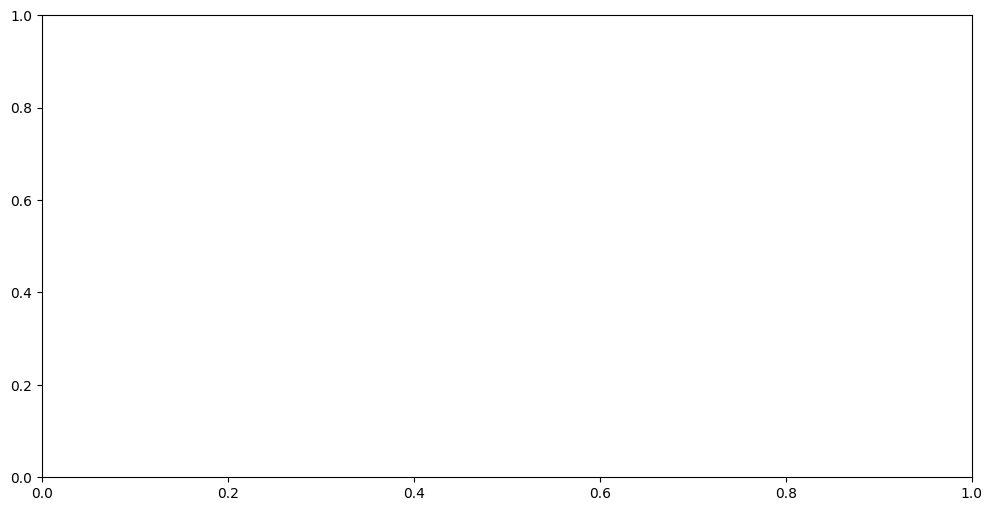

In [ ]:

fig, axes = plt.subplots(figsize=(12, 6))


all_ssc_values = []


for folder_name, df_folder in dfs_by_folder.items():
    ssc_values = df_folder['SSC'].values
    all_ssc_values.extend(ssc_values)

axes.boxplot(all_ssc_values)
axes.set_title('Distribución de valores SSC para todos los canales')
axes.set_ylabel('Valor SSC')
axes.set_xticklabels(['Todos los canales'])
axes.grid(True)

plt.tight_layout()
plt.show()


channel_1_mav = np.mean(all_ssc_values)
print(f"Media de los datos del canal 1 para los 36 sujetos:{channel_1_mav}")

channel_1_mean = np.median(all_ssc_values)

print(f"Mediana de los datos del canal 1 para los 36 sujetos: {channel_1_mean}")

En el caso de este diagrama de cajas y bigotes se puede observar un tamaño de la caja pequeña, esto significa que la disperción de los datos es muy poca, además, también presenta una distribución sesgada hacia la derecha, con una línea media de aproximadamente 19000, y solamente un dato atípico hacia su izquierda.

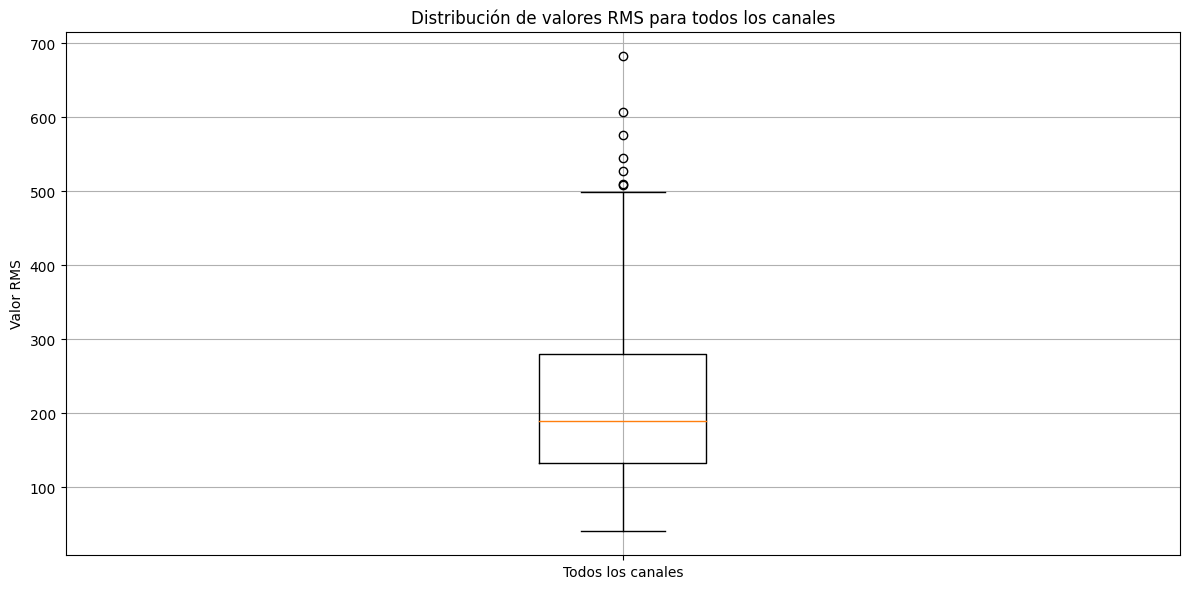

Media de los datos del canal 1 para los 36 sujetos:216.4380302482938
Mediana de los datos del canal 1 para los 36 sujetos: 189.41490708286392


In [ ]:

fig, axes = plt.subplots(figsize=(12, 6))

all_rms_values = []


for folder_name, df_folder in dfs_by_folder.items():

    rms_values = df_folder['WL'].values
    all_rms_values.extend(rms_values)

axes.boxplot(all_rms_values)
axes.set_title('Distribución de valores RMS para todos los canales')
axes.set_ylabel('Valor RMS')
axes.set_xticklabels(['Todos los canales'])
axes.grid(True)


plt.tight_layout()
plt.show()


channel_1_mav = np.mean(all_rms_values)
print(f"Media de los datos del canal 1 para los 36 sujetos:{channel_1_mav}")

channel_1_mean = np.median(all_rms_values)

print(f"Mediana de los datos del canal 1 para los 36 sujetos: {channel_1_mean}")

En el diagrama de cajas y bigotes para WL se puede observar una distribución sesgada hacia la derecha, con una dispersión de los datos considerable, además de varios datos atipicos hacía la derecha, indicando que los datos de la longitud de la señal se encuentran en una disperción entre aproximadamente 105-260.

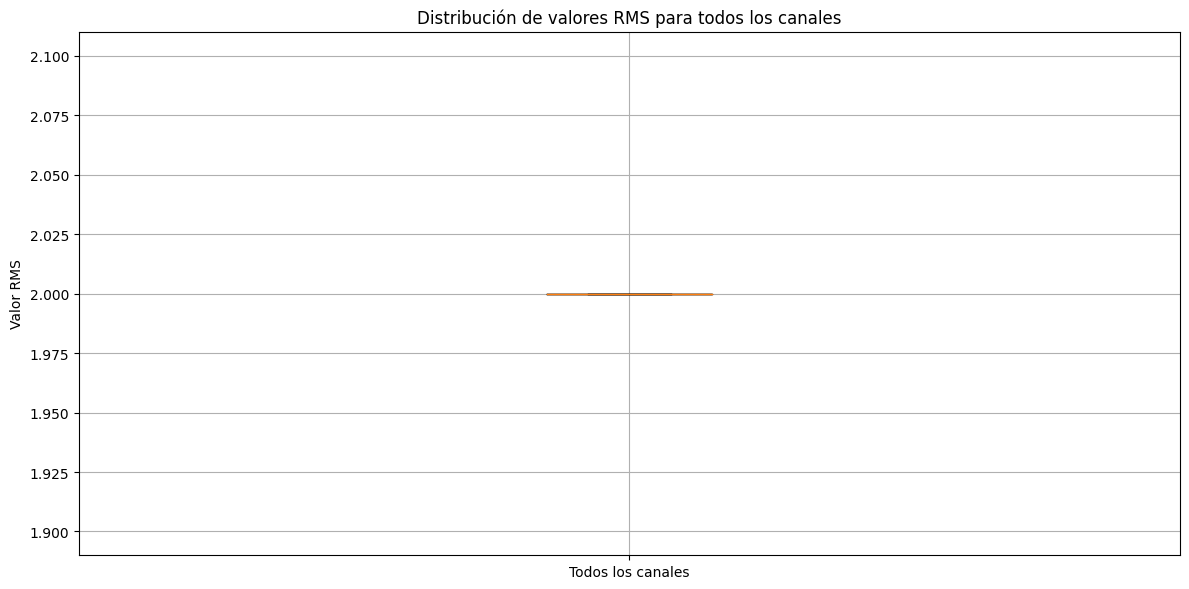

Media de los datos del canal 1 para los 36 sujetos:2.0
Mediana de los datos del canal 1 para los 36 sujetos: 2.0


In [ ]:

fig, axes = plt.subplots(figsize=(12, 6))

all_rms_values = []

for folder_name, df_folder in dfs_by_folder.items():
    rms_values = df_folder['ZC'].values
    all_rms_values.extend(rms_values)

axes.boxplot(all_rms_values)
axes.set_title('Distribución de valores ZC para todos los canales')
axes.set_ylabel('Valor ZC')
axes.set_xticklabels(['Todos los canales'])
axes.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()
# Calcular el Valor Medio Absoluto (MAV) de los datos del canal 1
channel_1_mav = np.mean(all_rms_values)
print(f"Media de los datos del canal 1 para los 36 sujetos:{channel_1_mav}")



# Calcular la media de los datos del canal 1
channel_1_mean = np.median(all_rms_values)

# Imprimir la media del canal 1
print(f"Mediana de los datos del canal 1 para los 36 sujetos: {channel_1_mean}")

Como el análisis anterior se puede observar que debido a que se normalizo la señal todos los datos se encuentran en 2 de ZC se encuentran en 2, con unos pocos datos atipicos hacia su derecha.

In [ ]:

shapiro_dfs_by_folder = {}


for carpeta in os.listdir(main_folder_path):
    carpeta_path = os.path.join(main_folder_path, carpeta)

    if os.path.isdir(carpeta_path):

        shapiro_results = []

        for file_name in os.listdir(carpeta_path):
            if file_name.endswith('.txt'):
                file_path = os.path.join(carpeta_path, file_name)
                df = pd.read_csv(file_path, sep='\t')


                for canal in df.columns[1:-1]:
                    stat, p_value = shapiro(df[canal])
                    p_value = round(p_value, 5)
                    shapiro_results.append((carpeta, canal, stat, p_value))
                break


        shapiro_df = pd.DataFrame(shapiro_results, columns=['Carpeta', 'Canal', 'Shapiro_Stat', 'P_Value'])
        shapiro_dfs_by_folder[carpeta] = shapiro_df

for carpeta, df in shapiro_dfs_by_folder.items():
    print(f"Resultados de Shapiro-Wilk para la carpeta {carpeta}:")
    pd.options.display.float_format = '{:.15f}'.format

    display(df)
    print("\n")

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_moresta

Resultados de Shapiro-Wilk para la carpeta 36:


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Carpeta     Canal      Shapiro_Stat           P_Value
0      36  channel1 0.759629964828491 0.000000000000000
1      36  channel2 0.850116431713104 0.000000000000000
2      36  channel3 0.909503996372223 0.000000000000000
3      36  channel4 0.841927647590637 0.000000000000000
4      36  channel5 0.819046735763550 0.000000000000000
5      36  channel6 0.891713917255402 0.000000000000000
6      36  channel7 0.716864824295044 0.000000000000000
7      36  channel8 0.777132332324982 0.000000000000000



Resultados de Shapiro-Wilk para la carpeta 28:


Carpeta     Canal      Shapiro_Stat           P_Value
0      28  channel1 0.690774202346802 0.000000000000000
1      28  channel2 0.807775974273682 0.000000000000000
2      28  channel3 0.945827424526215 0.000000000000000
3      28  channel4 0.847318589687347 0.000000000000000
4      28  channel5 0.792527377605438 0.000000000000000
5      28  channel6 0.875768244266510 0.000000000000000
6      28  channel7 0.736677289009094 0.000000000000000
7      28  channel8 0.753965914249420 0.000000000000000



Resultados de Shapiro-Wilk para la carpeta 27:


Carpeta     Canal      Shapiro_Stat           P_Value
0      27  channel1 0.738128125667572 0.000000000000000
1      27  channel2 0.700464546680450 0.000000000000000
2      27  channel3 0.778894543647766 0.000000000000000
3      27  channel4 0.783496558666229 0.000000000000000
4      27  channel5 0.877184629440308 0.000000000000000
5      27  channel6 0.894590079784393 0.000000000000000
6      27  channel7 0.706940174102783 0.000000000000000
7      27  channel8 0.765025496482849 0.000000000000000



Resultados de Shapiro-Wilk para la carpeta 30:


Carpeta     Canal      Shapiro_Stat           P_Value
0      30  channel1 0.797959685325623 0.000000000000000
1      30  channel2 0.984429776668549 0.000000000000000
2      30  channel3 0.984656453132629 0.000000000000000
3      30  channel4 0.914482533931732 0.000000000000000
4      30  channel5 0.956314742565155 0.000000000000000
5      30  channel6 0.913553893566132 0.000000000000000
6      30  channel7 0.743991494178772 0.000000000000000
7      30  channel8 0.742584705352783 0.000000000000000



Resultados de Shapiro-Wilk para la carpeta 31:


Carpeta     Canal      Shapiro_Stat           P_Value
0      31  channel1 0.814080953598022 0.000000000000000
1      31  channel2 0.893481731414795 0.000000000000000
2      31  channel3 0.868027806282043 0.000000000000000
3      31  channel4 0.856711387634277 0.000000000000000
4      31  channel5 0.893297612667084 0.000000000000000
5      31  channel6 0.898006200790405 0.000000000000000
6      31  channel7 0.858350098133087 0.000000000000000
7      31  channel8 0.844060897827148 0.000000000000000



Resultados de Shapiro-Wilk para la carpeta 32:


Carpeta     Canal      Shapiro_Stat           P_Value
0      32  channel1 0.711914658546448 0.000000000000000
1      32  channel2 0.628790140151978 0.000000000000000
2      32  channel3 0.798788130283356 0.000000000000000
3      32  channel4 0.784117937088013 0.000000000000000
4      32  channel5 0.874109685420990 0.000000000000000
5      32  channel6 0.904243648052216 0.000000000000000
6      32  channel7 0.812373101711273 0.000000000000000
7      32  channel8 0.699290037155151 0.000000000000000



Resultados de Shapiro-Wilk para la carpeta 35:


Carpeta     Canal      Shapiro_Stat           P_Value
0      35  channel1 0.711761116981506 0.000000000000000
1      35  channel2 0.615865767002106 0.000000000000000
2      35  channel3 0.869349241256714 0.000000000000000
3      35  channel4 0.786649942398071 0.000000000000000
4      35  channel5 0.888420462608337 0.000000000000000
5      35  channel6 0.887411355972290 0.000000000000000
6      35  channel7 0.797714650630951 0.000000000000000
7      35  channel8 0.761212706565857 0.000000000000000



Resultados de Shapiro-Wilk para la carpeta 33:


Carpeta     Canal      Shapiro_Stat           P_Value
0      33  channel1 0.782021045684814 0.000000000000000
1      33  channel2 0.776205062866211 0.000000000000000
2      33  channel3 0.883417248725891 0.000000000000000
3      33  channel4 0.920278906822205 0.000000000000000
4      33  channel5 0.912483930587769 0.000000000000000
5      33  channel6 0.906656324863434 0.000000000000000
6      33  channel7 0.747831821441650 0.000000000000000
7      33  channel8 0.817896842956543 0.000000000000000



Resultados de Shapiro-Wilk para la carpeta 34:


Carpeta     Canal      Shapiro_Stat           P_Value
0      34  channel1 0.738678097724915 0.000000000000000
1      34  channel2 0.623729825019836 0.000000000000000
2      34  channel3 0.920012116432190 0.000000000000000
3      34  channel4 0.811470866203308 0.000000000000000
4      34  channel5 0.875190496444702 0.000000000000000
5      34  channel6 0.838467001914978 0.000000000000000
6      34  channel7 0.822757661342621 0.000000000000000
7      34  channel8 0.736535429954529 0.000000000000000



Resultados de Shapiro-Wilk para la carpeta 29:


Carpeta     Canal      Shapiro_Stat           P_Value
0      29  channel1 0.833590149879456 0.000000000000000
1      29  channel2 0.886836647987366 0.000000000000000
2      29  channel3 0.836870253086090 0.000000000000000
3      29  channel4 0.775448441505432 0.000000000000000
4      29  channel5 0.818651974201202 0.000000000000000
5      29  channel6 0.836537837982178 0.000000000000000
6      29  channel7 0.819215893745422 0.000000000000000
7      29  channel8 0.772606909275055 0.000000000000000



Resultados de Shapiro-Wilk para la carpeta 19:


Carpeta     Canal      Shapiro_Stat           P_Value
0      19  channel1 0.784143269062042 0.000000000000000
1      19  channel2 0.938813209533691 0.000000000000000
2      19  channel3 0.829709410667419 0.000000000000000
3      19  channel4 0.818004727363586 0.000000000000000
4      19  channel5 0.922275304794312 0.000000000000000
5      19  channel6 0.867296099662781 0.000000000000000
6      19  channel7 0.821364879608154 0.000000000000000
7      19  channel8 0.810310423374176 0.000000000000000



Resultados de Shapiro-Wilk para la carpeta 20:


Carpeta     Canal      Shapiro_Stat           P_Value
0      20  channel1 0.778296589851379 0.000000000000000
1      20  channel2 0.791230380535126 0.000000000000000
2      20  channel3 0.778394758701324 0.000000000000000
3      20  channel4 0.830862462520599 0.000000000000000
4      20  channel5 0.875571131706238 0.000000000000000
5      20  channel6 0.874943971633911 0.000000000000000
6      20  channel7 0.718558967113495 0.000000000000000
7      20  channel8 0.712442040443420 0.000000000000000



Resultados de Shapiro-Wilk para la carpeta 25:


Carpeta     Canal      Shapiro_Stat           P_Value
0      25  channel1 0.855247616767883 0.000000000000000
1      25  channel2 0.859103441238403 0.000000000000000
2      25  channel3 0.913089156150818 0.000000000000000
3      25  channel4 0.890540540218353 0.000000000000000
4      25  channel5 0.935469508171082 0.000000000000000
5      25  channel6 0.915589272975922 0.000000000000000
6      25  channel7 0.857890903949738 0.000000000000000
7      25  channel8 0.863933801651001 0.000000000000000



Resultados de Shapiro-Wilk para la carpeta 22:


Carpeta     Canal      Shapiro_Stat           P_Value
0      22  channel1 0.827428162097931 0.000000000000000
1      22  channel2 0.826787710189819 0.000000000000000
2      22  channel3 0.891297519207001 0.000000000000000
3      22  channel4 0.829790771007538 0.000000000000000
4      22  channel5 0.800664305686951 0.000000000000000
5      22  channel6 0.750406742095947 0.000000000000000
6      22  channel7 0.892528533935547 0.000000000000000
7      22  channel8 0.851461052894592 0.000000000000000



Resultados de Shapiro-Wilk para la carpeta 21:


Carpeta     Canal      Shapiro_Stat           P_Value
0      21  channel1 0.844371616840363 0.000000000000000
1      21  channel2 0.905372858047485 0.000000000000000
2      21  channel3 0.877359867095947 0.000000000000000
3      21  channel4 0.870498001575470 0.000000000000000
4      21  channel5 0.938823640346527 0.000000000000000
5      21  channel6 0.924420714378357 0.000000000000000
6      21  channel7 0.744466900825500 0.000000000000000
7      21  channel8 0.703564524650574 0.000000000000000



Resultados de Shapiro-Wilk para la carpeta 18:


Carpeta     Canal      Shapiro_Stat           P_Value
0      18  channel1 0.617581129074097 0.000000000000000
1      18  channel2 0.551627278327942 0.000000000000000
2      18  channel3 0.879864215850830 0.000000000000000
3      18  channel4 0.818303823471069 0.000000000000000
4      18  channel5 0.736051678657532 0.000000000000000
5      18  channel6 0.785527586936951 0.000000000000000
6      18  channel7 0.652614474296570 0.000000000000000
7      18  channel8 0.673349380493164 0.000000000000000



Resultados de Shapiro-Wilk para la carpeta 17:


Carpeta     Canal      Shapiro_Stat           P_Value
0      17  channel1 0.773000359535217 0.000000000000000
1      17  channel2 0.910962820053101 0.000000000000000
2      17  channel3 0.870981752872467 0.000000000000000
3      17  channel4 0.793251395225525 0.000000000000000
4      17  channel5 0.765044987201691 0.000000000000000
5      17  channel6 0.796407818794250 0.000000000000000
6      17  channel7 0.836735069751740 0.000000000000000
7      17  channel8 0.753826498985291 0.000000000000000



Resultados de Shapiro-Wilk para la carpeta 26:


Carpeta     Canal      Shapiro_Stat           P_Value
0      26  channel1 0.832589268684387 0.000000000000000
1      26  channel2 0.877880275249481 0.000000000000000
2      26  channel3 0.844659209251404 0.000000000000000
3      26  channel4 0.869090735912323 0.000000000000000
4      26  channel5 0.928401231765747 0.000000000000000
5      26  channel6 0.900581181049347 0.000000000000000
6      26  channel7 0.810496926307678 0.000000000000000
7      26  channel8 0.823203444480896 0.000000000000000



Resultados de Shapiro-Wilk para la carpeta 23:


Carpeta     Canal      Shapiro_Stat           P_Value
0      23  channel1 0.769391059875488 0.000000000000000
1      23  channel2 0.754687666893005 0.000000000000000
2      23  channel3 0.772892475128174 0.000000000000000
3      23  channel4 0.812377810478210 0.000000000000000
4      23  channel5 0.891481637954712 0.000000000000000
5      23  channel6 0.869177579879761 0.000000000000000
6      23  channel7 0.745465755462646 0.000000000000000
7      23  channel8 0.787738919258118 0.000000000000000



Resultados de Shapiro-Wilk para la carpeta 24:


Carpeta     Canal      Shapiro_Stat           P_Value
0      24  channel1 0.712409853935242 0.000000000000000
1      24  channel2 0.755995512008667 0.000000000000000
2      24  channel3 0.852980852127075 0.000000000000000
3      24  channel4 0.816956043243408 0.000000000000000
4      24  channel5 0.817567586898804 0.000000000000000
5      24  channel6 0.739187419414520 0.000000000000000
6      24  channel7 0.727428078651428 0.000000000000000
7      24  channel8 0.749985694885254 0.000000000000000



Resultados de Shapiro-Wilk para la carpeta 15:


Carpeta     Canal      Shapiro_Stat           P_Value
0      15  channel1 0.593025803565979 0.000000000000000
1      15  channel2 0.665960848331451 0.000000000000000
2      15  channel3 0.821346879005432 0.000000000000000
3      15  channel4 0.799070239067078 0.000000000000000
4      15  channel5 0.891071259975433 0.000000000000000
5      15  channel6 0.860840678215027 0.000000000000000
6      15  channel7 0.777609467506409 0.000000000000000
7      15  channel8 0.767231702804565 0.000000000000000



Resultados de Shapiro-Wilk para la carpeta 14:


Carpeta     Canal      Shapiro_Stat           P_Value
0      14  channel1 0.597415328025818 0.000000000000000
1      14  channel2 0.483207702636719 0.000000000000000
2      14  channel3 0.738527894020081 0.000000000000000
3      14  channel4 0.812187194824219 0.000000000000000
4      14  channel5 0.704667568206787 0.000000000000000
5      14  channel6 0.782194256782532 0.000000000000000
6      14  channel7 0.743774294853210 0.000000000000000
7      14  channel8 0.764031887054443 0.000000000000000



Resultados de Shapiro-Wilk para la carpeta 10:


Carpeta     Canal      Shapiro_Stat           P_Value
0      10  channel1 0.709171175956726 0.000000000000000
1      10  channel2 0.881359875202179 0.000000000000000
2      10  channel3 0.851195275783539 0.000000000000000
3      10  channel4 0.819161772727966 0.000000000000000
4      10  channel5 0.800098657608032 0.000000000000000
5      10  channel6 0.777568101882935 0.000000000000000
6      10  channel7 0.615533232688904 0.000000000000000
7      10  channel8 0.659383416175842 0.000000000000000



Resultados de Shapiro-Wilk para la carpeta 16:


Carpeta     Canal      Shapiro_Stat           P_Value
0      16  channel1 0.846892118453979 0.000000000000000
1      16  channel2 0.915803253650665 0.000000000000000
2      16  channel3 0.883798241615295 0.000000000000000
3      16  channel4 0.864484786987305 0.000000000000000
4      16  channel5 0.907462120056152 0.000000000000000
5      16  channel6 0.895419299602509 0.000000000000000
6      16  channel7 0.923899531364441 0.000000000000000
7      16  channel8 0.888967633247375 0.000000000000000



Resultados de Shapiro-Wilk para la carpeta 08:


Carpeta     Canal      Shapiro_Stat           P_Value
0      08  channel1 0.783573806285858 0.000000000000000
1      08  channel2 0.838429689407349 0.000000000000000
2      08  channel3 0.829805374145508 0.000000000000000
3      08  channel4 0.885078310966492 0.000000000000000
4      08  channel5 0.923221707344055 0.000000000000000
5      08  channel6 0.884059846401215 0.000000000000000
6      08  channel7 0.795592486858368 0.000000000000000
7      08  channel8 0.782356500625610 0.000000000000000



Resultados de Shapiro-Wilk para la carpeta 13:


Carpeta     Canal      Shapiro_Stat           P_Value
0      13  channel1 0.809064745903015 0.000000000000000
1      13  channel2 0.842980146408081 0.000000000000000
2      13  channel3 0.791363537311554 0.000000000000000
3      13  channel4 0.909167110919952 0.000000000000000
4      13  channel5 0.950214028358459 0.000000000000000
5      13  channel6 0.840095043182373 0.000000000000000
6      13  channel7 0.765931069850922 0.000000000000000
7      13  channel8 0.743137955665588 0.000000000000000



Resultados de Shapiro-Wilk para la carpeta 12:


Carpeta     Canal      Shapiro_Stat           P_Value
0      12  channel1 0.819173216819763 0.000000000000000
1      12  channel2 0.858654916286469 0.000000000000000
2      12  channel3 0.858784675598145 0.000000000000000
3      12  channel4 0.854029178619385 0.000000000000000
4      12  channel5 0.846394777297974 0.000000000000000
5      12  channel6 0.840735912322998 0.000000000000000
6      12  channel7 0.882805109024048 0.000000000000000
7      12  channel8 0.812571287155151 0.000000000000000



Resultados de Shapiro-Wilk para la carpeta 07:


Carpeta     Canal      Shapiro_Stat           P_Value
0      07  channel1 0.839490890502930 0.000000000000000
1      07  channel2 0.901809453964233 0.000000000000000
2      07  channel3 0.831956326961517 0.000000000000000
3      07  channel4 0.876364469528198 0.000000000000000
4      07  channel5 0.933370828628540 0.000000000000000
5      07  channel6 0.804448723793030 0.000000000000000
6      07  channel7 0.715843498706818 0.000000000000000
7      07  channel8 0.679433822631836 0.000000000000000



Resultados de Shapiro-Wilk para la carpeta 09:


Carpeta     Canal      Shapiro_Stat           P_Value
0      09  channel1 0.733463168144226 0.000000000000000
1      09  channel2 0.736495137214661 0.000000000000000
2      09  channel3 0.947259604930878 0.000000000000000
3      09  channel4 0.755817651748657 0.000000000000000
4      09  channel5 0.740628242492676 0.000000000000000
5      09  channel6 0.737512111663818 0.000000000000000
6      09  channel7 0.766893267631531 0.000000000000000
7      09  channel8 0.651943683624268 0.000000000000000



Resultados de Shapiro-Wilk para la carpeta 11:


Carpeta     Canal      Shapiro_Stat           P_Value
0      11  channel1 0.737749934196472 0.000000000000000
1      11  channel2 0.647397637367249 0.000000000000000
2      11  channel3 0.825542092323303 0.000000000000000
3      11  channel4 0.811506807804108 0.000000000000000
4      11  channel5 0.932993888854980 0.000000000000000
5      11  channel6 0.820743739604950 0.000000000000000
6      11  channel7 0.719916462898254 0.000000000000000
7      11  channel8 0.707263827323914 0.000000000000000



Resultados de Shapiro-Wilk para la carpeta 04:


Carpeta     Canal      Shapiro_Stat           P_Value
0      04  channel1 0.858398556709290 0.000000000000000
1      04  channel2 0.917256534099579 0.000000000000000
2      04  channel3 0.906224191188812 0.000000000000000
3      04  channel4 0.878243684768677 0.000000000000000
4      04  channel5 0.910295188426971 0.000000000000000
5      04  channel6 0.882617235183716 0.000000000000000
6      04  channel7 0.774404227733612 0.000000000000000
7      04  channel8 0.842963099479675 0.000000000000000



Resultados de Shapiro-Wilk para la carpeta 01:


Carpeta     Canal      Shapiro_Stat           P_Value
0      01  channel1 0.750416994094849 0.000000000000000
1      01  channel2 0.806519031524658 0.000000000000000
2      01  channel3 0.819594681262970 0.000000000000000
3      01  channel4 0.763317763805389 0.000000000000000
4      01  channel5 0.792040646076202 0.000000000000000
5      01  channel6 0.800836920738220 0.000000000000000
6      01  channel7 0.753939390182495 0.000000000000000
7      01  channel8 0.760685622692108 0.000000000000000



Resultados de Shapiro-Wilk para la carpeta 05:


Carpeta     Canal      Shapiro_Stat           P_Value
0      05  channel1 0.669721603393555 0.000000000000000
1      05  channel2 0.747168779373169 0.000000000000000
2      05  channel3 0.916740417480469 0.000000000000000
3      05  channel4 0.831766128540039 0.000000000000000
4      05  channel5 0.784915506839752 0.000000000000000
5      05  channel6 0.752937316894531 0.000000000000000
6      05  channel7 0.808874428272247 0.000000000000000
7      05  channel8 0.741129517555237 0.000000000000000



Resultados de Shapiro-Wilk para la carpeta 02:


Carpeta     Canal      Shapiro_Stat           P_Value
0      02  channel1 0.631384789943695 0.000000000000000
1      02  channel2 0.881128549575806 0.000000000000000
2      02  channel3 0.860610246658325 0.000000000000000
3      02  channel4 0.821258544921875 0.000000000000000
4      02  channel5 0.874556243419647 0.000000000000000
5      02  channel6 0.821789145469666 0.000000000000000
6      02  channel7 0.698622107505798 0.000000000000000
7      02  channel8 0.690373182296753 0.000000000000000



Resultados de Shapiro-Wilk para la carpeta 06:


Carpeta     Canal      Shapiro_Stat           P_Value
0      06  channel1 0.730693578720093 0.000000000000000
1      06  channel2 0.901405572891235 0.000000000000000
2      06  channel3 0.837682485580444 0.000000000000000
3      06  channel4 0.765796065330505 0.000000000000000
4      06  channel5 0.828912973403931 0.000000000000000
5      06  channel6 0.925083696842194 0.000000000000000
6      06  channel7 0.889069676399231 0.000000000000000
7      06  channel8 0.827499032020569 0.000000000000000



Resultados de Shapiro-Wilk para la carpeta 03:


Carpeta     Canal      Shapiro_Stat           P_Value
0      03  channel1 0.839430093765259 0.000000000000000
1      03  channel2 0.810378909111023 0.000000000000000
2      03  channel3 0.975617110729218 0.000000000000000
3      03  channel4 0.855954289436340 0.000000000000000
4      03  channel5 0.887218117713928 0.000000000000000
5      03  channel6 0.911437690258026 0.000000000000000
6      03  channel7 0.849334120750427 0.000000000000000
7      03  channel8 0.837643444538116 0.000000000000000

los resultados de las pruebas de Shapiro-Wilk para cada uno de los sujetos arrojaron valores de p significativamente inferiores al nivel de significancia establecido, que es de 0.05. Este hallazgo nos lleva a rechazar la hipótesis nula (H0), que sostiene que los datos siguen una distribución normal. Por lo tanto, podemos concluir que los datos no se distribuyen normalmente según los resultados obtenidos en las pruebas de Shapiro-Wilk.

In [ ]:
# Obtener los valores p del canal 1 para la carpeta 28
p_values_carpeta28_canal1 = shapiro_dfs_by_folder['28'][shapiro_dfs_by_folder['28']['Canal'] == 'channel1']['P_Value']

# Obtener los valores p del canal 1 para la carpeta 29
p_values_carpeta29_canal1 = shapiro_dfs_by_folder['29'][shapiro_dfs_by_folder['29']['Canal'] == 'channel1']['P_Value']

statistic, p_value = levene(p_values_carpeta28_canal1, p_values_carpeta29_canal1)

alpha = 0.05

if p_value < alpha:
    print("Hay una diferencia significativa en la varianza entre los grupos (p < 0.05).")
else:
    print("No hay una diferencia significativa en la varianza entre los grupos (p >= 0.05).")

No hay una diferencia significativa en la varianza entre los grupos (p >= 0.05).


al realizar la prueba Levene para evaluar si las varianzas de los grupos son iguales, se establecen dos hipótesis: la hipótesis nula (H0) que afirma que las varianzas son iguales (homogeneidad de varianzas), y la hipótesis alternativa (Ha) que indica que al menos una de las varianzas es diferente (heterogeneidad de varianzas).

Si el valor p obtenido en la prueba Levene es mayor que el nivel de significancia establecido (0.05 en este caso), entonces no se rechaza la hipótesis nula, lo que significa que no hay evidencia suficiente para afirmar que las varianzas de los grupos son diferentes.

Para este caso entonces se concluye que no hay una diferencia significativa en la varianza entre los grupos.

In [ ]:
# Obtener los valores p del canal 1 para la carpeta 28
p_values_carpeta28_canal1 = shapiro_dfs_by_folder['28'][shapiro_dfs_by_folder['28']['Canal'] == 'channel1']['P_Value']

# Obtener los valores p del canal 1 para la carpeta 29
p_values_carpeta29_canal1 = shapiro_dfs_by_folder['29'][shapiro_dfs_by_folder['29']['Canal'] == 'channel1']['P_Value']

# Aplicar la prueba de Mann-Whitney U
statistic, p_value = mannwhitneyu(p_values_carpeta28_canal1, p_values_carpeta29_canal1)

# Definir el nivel de significancia
alpha = 0.05

# Interpretar el resultado de la prueba
if p_value < alpha:
    print("Hay una diferencia significativa entre los grupos (p < 0.05).")
else:
    print("No hay una diferencia significativa entre los grupos (p >= 0.05).")

No hay una diferencia significativa entre los grupos (p >= 0.05).


al realizar la prueba Mann-Whitney para comparar muestras independientes y determinar si hay diferencias significativas, calculamos el valor p utilizando la función mannwhitneyu y lo comparamos con un nivel de significancia predefinido (0.05 en este caso). Si el valor p es menor que este nivel, rechazamos la hipótesis nula, lo que sugiere que hay una diferencia significativa entre las muestras. Sin embargo, si el valor p es mayor que el nivel de significancia, como es el caso en este análisis del EMG, entonces no rechazamos la hipótesis nula.

CONCLUSIONES
1. Los datos de la señal EMG no distribuyen de forma normal, lo que requiere una prueba de normalidad, como la prueba de min-max, para ordenar y visualizar los datos de manera más efectiva.
2. El operador TKEO es esencial para el análisis de señales como la EMG, ya que amplifica la sensibilidad a los cambios bruscos de energía, facilitando la detección de contracciones musculares, y resalta componentes de alta frecuencia para identificar la fatiga muscular.
3. La gráfica de cajas y bigotes es útil para visualizar la dispersión y detectar valores atípicos, proporcionando una rápida identificación de la variabilidad y simetría de la distribución de los datos.
4. El histograma ofrece una representación detallada de la distribución de frecuencias de los datos, revelando patrones de agrupación y densidad en diferentes rangos de valores.
5. Al comparar la precisión de los valores aproximados de la media y la mediana calculados por Python, se observa que la gráfica de cajas y bigotes es más precisa para representar la mediana que el histograma, lo que la hace más confiable en este contexto.
6. Los datos sin normalizar presentan problemas de dispersión, lo que dificulta su visualización y análisis. Por lo tanto, se concluye que la normalización de los datos es necesaria para un estudio adecuado.

[1] E. Altamira, M. Mayorga y G. Paredes. “Electromiograma (EMG)”. https://www.researchgate.net/. Disponible: https://www.researchgate.net/profile/Eladio-Altamira-Colado/publication/319902318_Electromiograma_EMG/links/59c0cf0ca6fdcca8e572badd/Electromiograma-EMG.pdf

[2] “The effect of weight-bearing exercise and non-weight-bearing exercise on gaitin rats with sciatic nerve crush injury”. PubMed Central (PMC).  Disponible: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4434004/

[3]M. Wrobel. “Normalización de la base de datos: Qué es, por qué es importante y cómo se hace”. The Service Desk and IT Service Management blog.Disponible: https://blog.invgate.com/es/normalizacion-de-base-de-datos#:~:text=¿Cómo%20normalizar%20un%20conjunto%20de,o%20la%20normalización%20Z-score.

[4]“R para principiantes”. Home | Bookdown.Disponible: https://bookdown.org/jboscomendoza/r-principiantes4/data-frames.html